

---


# ***1. Problem Definition***


---



In [212]:
#It is a Regression Problem where the goal is to predict some possible future Bitcoin prices.
#Keep in mind that towards the end i will give the idea that this problem can then be transformed into a classification problem(Invest or not invest)...



---


# ***2. Data Collection***


---



In [213]:
###PIP INSTALLS###
!pip install yfinance
!pip install ta
!pip install matplotlib
!pip install pandas
!pip install arch
!pip install tensorflow

###ΚΑΤΕΒΑΣΜΑ ΑΠΑΡΑΙΤΗΤΩΝ###
import yfinance as yf
import pandas as pd
import ta
import matplotlib.pyplot as plt



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price             Close         High          Low         Open     Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD    BTC-USD
Date                                                                     
2017-05-01  1421.599976  1434.319946  1348.300049  1348.300049  713624000
2017-05-02  1452.819946  1473.900024  1415.689941  1421.030029  477337984
2017-05-03  1490.089966  1492.770020  1447.489990  1453.780029  583795968
2017-05-04  1537.670044  1608.910034  1490.719971  1490.719971  933548992
2017-05-05  1555.449951  1618.030029  1530.310059  1540.869995  946035968


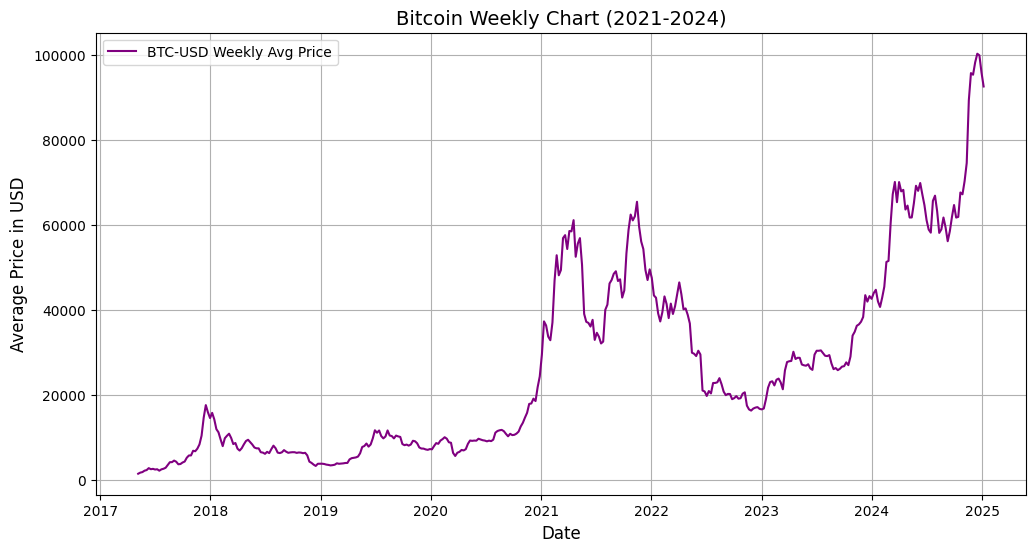

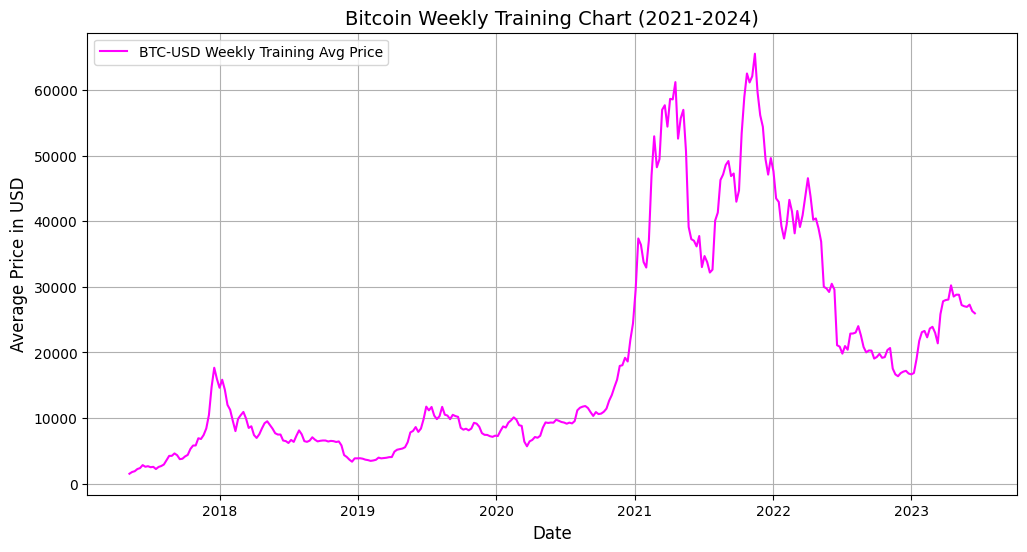

In [214]:
# Κατέβασμα δεδομένων Bitcoin από το Yahoo Finance
btc_data = yf.download("BTC-USD", start="2017-05-01", end="2024-12-31")
btc_data_train = yf.download("BTC-USD", start="2017-05-01", end="2023-06-19")
btc_data_test = yf.download("BTC-USD", start="2023-06-19", end="2024-12-31")

# Εμφάνιση των πρώτων γραμμών
print(btc_data.head())

# Αποθήκευση σε αρχείο CSV (αν χρειάζεται)
#btc_data.to_csv("bitcoin_data.csv")

# Μετατροπή των δεδομένων σε εβδομαδιαία βάση
btc_weekly = btc_data['Close'].resample('W').mean()
btc_weekly_train = btc_data_train['Close'].resample('W').mean()
btc_weekly_test = btc_data_test['Close'].resample('W').mean()

# Εμφάνιση του εβδομαδιαίου διαγράμματος
plt.figure(figsize=(12, 6))
plt.plot(btc_weekly.index, btc_weekly, label='BTC-USD Weekly Avg Price', color='purple')

plt.title('Bitcoin Weekly Chart (2021-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price in USD', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


# Εμφάνιση του train διαγράμματος
plt.figure(figsize=(12, 6))
plt.plot(btc_weekly_train.index, btc_weekly_train, label='BTC-USD Weekly Training Avg Price', color='Magenta')

plt.title('Bitcoin Weekly Training Chart (2021-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price in USD', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


# Εμφάνιση του test διαγράμματος
plt.figure(figsize=(12, 6))
plt.plot(btc_weekly_test.index, btc_weekly_test, label='BTC-USD Weekly Testing Avg Price', color='Orchid')

plt.title('Bitcoin Weekly Testing Chart (2021-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price in USD', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()



---


# ***3. Data Exploration and Analysis***


---



***TIME SERIES ANALYSIS***

***Trend:***

<Figure size 1000x800 with 0 Axes>

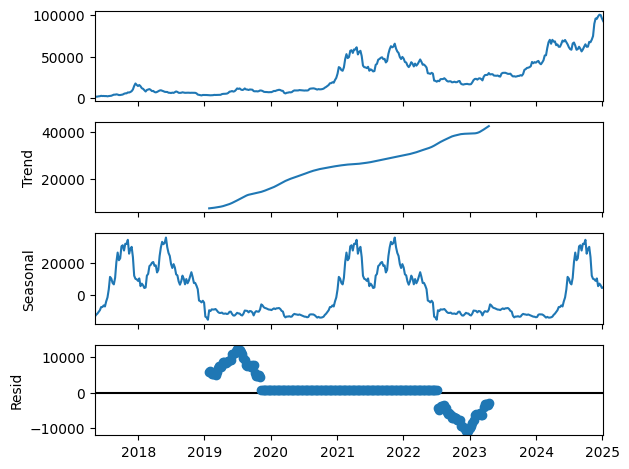

Clear depiction of HTF Trend:


In [215]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt



##FOR TREND
# Decompose the time series (additive or multiplicative)
result = seasonal_decompose(btc_weekly, model='additive', period=180)  # Weekly data with high timeframe period to identify the trend

# Plot the decomposition
plt.figure(figsize=(10, 8))
result.plot()
plt.show()
print(f'Clear depiction of HTF Trend:')

#plot trend
plt.figure(figsize=(10, 4))
plt.plot(result.trend, label='Trend')
plt.title('Trend')
plt.legend()
plt.show()


Seasonality (Annual)

<Figure size 1000x800 with 0 Axes>

Annual seasonality:


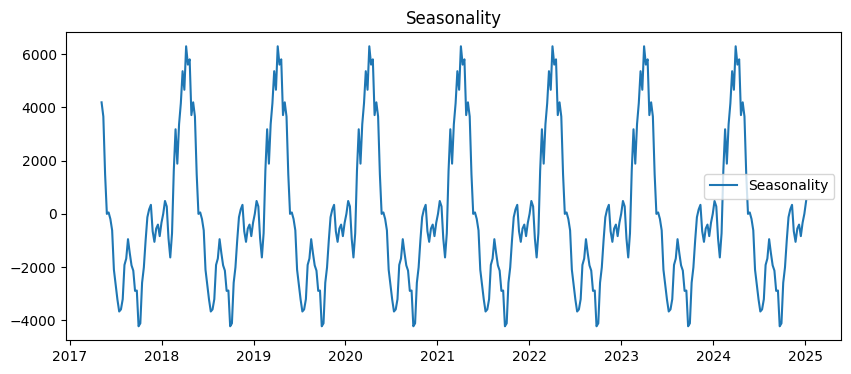

In [216]:
# Decompose the time series (additive or multiplicative)
result = seasonal_decompose(btc_weekly, model='additive', period=52)  # Weekly data with ~1 year seasonality

# Plot the decomposition
plt.figure(figsize=(10, 8))
result.plot()
plt.show()

print(f'Annual seasonality:')

plt.figure(figsize=(10, 4))
plt.plot(result.seasonal, label='Seasonality')
plt.title('Seasonality')
plt.legend()
plt.show()


Residuals

Annual seasonality:


<Figure size 1000x800 with 0 Axes>

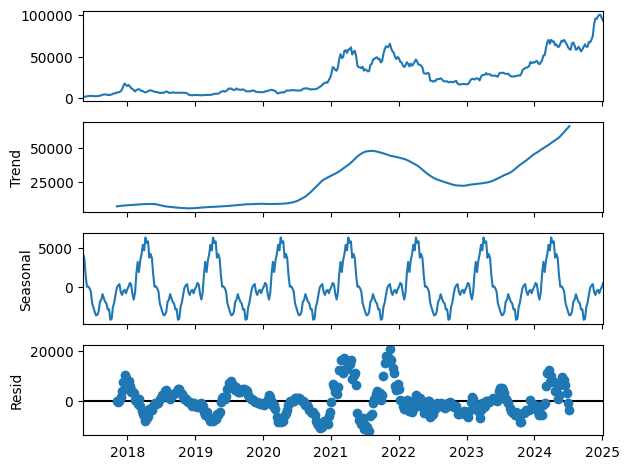

Annual Residuals:


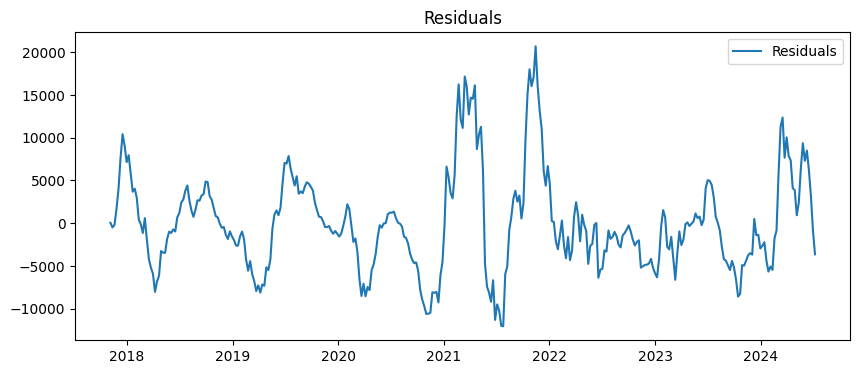

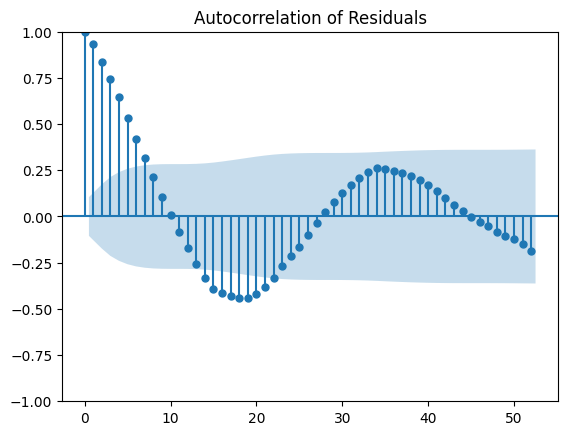

In [217]:
# Decompose the time series (additive or multiplicative)
result = seasonal_decompose(btc_weekly, model='additive', period=52)  # Weekly data with ~1 year seasonality

print(f'Annual seasonality:')

# Plot the decomposition
plt.figure(figsize=(10, 8))
result.plot()
plt.show()

print(f'Annual Residuals:')

plt.figure(figsize=(10, 4))
plt.plot(result.resid, label='Residuals')
plt.title('Residuals')
plt.legend()
plt.show()

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(result.resid.dropna(), lags=52)  # Analyze up to 2 years of weekly lags
plt.title("Autocorrelation of Residuals")
plt.show()


***OTHER USEFULL VISUALIZATIONS***

Price           Close           High            Low           Open  \
Ticker        BTC-USD        BTC-USD        BTC-USD        BTC-USD   
count     2801.000000    2801.000000    2801.000000    2801.000000   
mean     26081.550782   26637.897030   25437.601658   26050.627383   
std      22098.939349   22549.525240   21576.332243   22070.210360   
min       1421.599976    1434.319946    1348.300049    1348.300049   
25%       8041.779785    8216.812500    7830.758789    8037.080078   
50%      19201.091797   19464.671875   18813.455078   19191.529297   
75%      41143.929688   42195.632812   39825.691406   41074.105469   
max     106140.601562  108268.445312  105291.734375  106147.296875   

Price         Volume  
Ticker       BTC-USD  
count   2.801000e+03  
mean    2.489589e+10  
std     1.995825e+10  
min     4.371960e+08  
25%     1.053740e+10  
50%     2.179686e+10  
75%     3.414912e+10  
max     3.509679e+11  


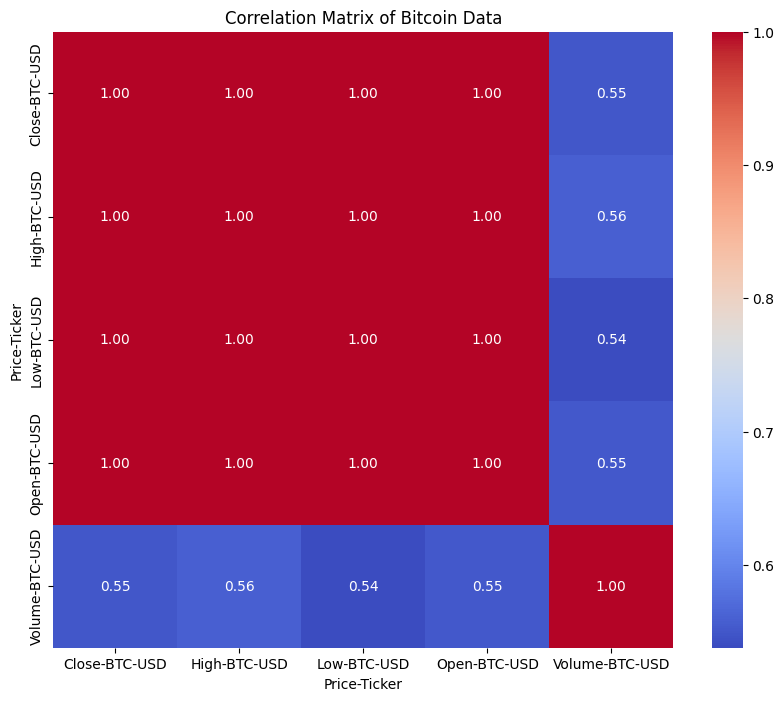

In [218]:
# Data Exploration: Summary statistics
print(btc_data.describe())

# Visualize the correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(btc_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Bitcoin Data')
plt.show()

# Plot a histogram of the closing prices
plt.figure(figsize=(10, 6))
plt.hist(btc_data['Close'], bins=50, color='purple', edgecolor='black')
plt.title('Distribution of Bitcoin Closing Prices')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.show()




---


# ***4. Data Preprocessing***


---



In [219]:
# Check for missing values
print(btc_data.isnull().sum())
print(btc_data_train.isnull().sum())
print(btc_data_test.isnull().sum())

# Fill missing values with forward fill (you can also try interpolation or removal)
btc_data = btc_data.fillna(method='ffill')

# Feature Engineering: Adding technical indicators
# Convert btc_data['Close'] to a pandas Series
btc_data['SMA_30'] = ta.trend.sma_indicator(btc_data['Close'].squeeze(), window=30)  # Simple Moving Average
btc_data['SMA_100'] = ta.trend.sma_indicator(btc_data['Close'].squeeze(), window=100)
btc_data['RSI'] = ta.momentum.rsi(btc_data['Close'].squeeze(), window=14)  # Relative Strength Index
btc_data['MACD'] = ta.trend.macd(btc_data['Close'].squeeze())  # MACD
btc_data['MACD_signal'] = ta.trend.macd_signal(btc_data['Close'].squeeze())  # MACD Signal Line

# Drop rows with missing values that may result from technical indicators
btc_data.dropna(inplace=True)

# Feature selection: We'll use the features for prediction
features = ['Close', 'SMA_30', 'SMA_100', 'RSI', 'MACD', 'MACD_signal'] # This line remains unchanged

Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64
Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64
Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64


<ipython-input-219-812e84802c7d>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  btc_data = btc_data.fillna(method='ffill')




---


# ***5. Model Selection - 6.Initial Model Fitting***


---



***I WILL BE USING THESE MODELS ***

Traditional Machine Learning Models:

*   Linear Regression - with OLS-MSE.
*   Logarithmic Fit
*   Exponential Fit
*   kNN - with Euclidean Distance.
*   Random Forest
*   SMA - Nothing
*   Support Vector Regression (SVR) - with ϵ-loss.




Deep Learning Models:
*   LSTM (Long Short-Term Memory) - Mean Squared Error (MSE).


As of the way they are trained:
80% dataset to Train and 20% for Testing.








***Linear Regression:***

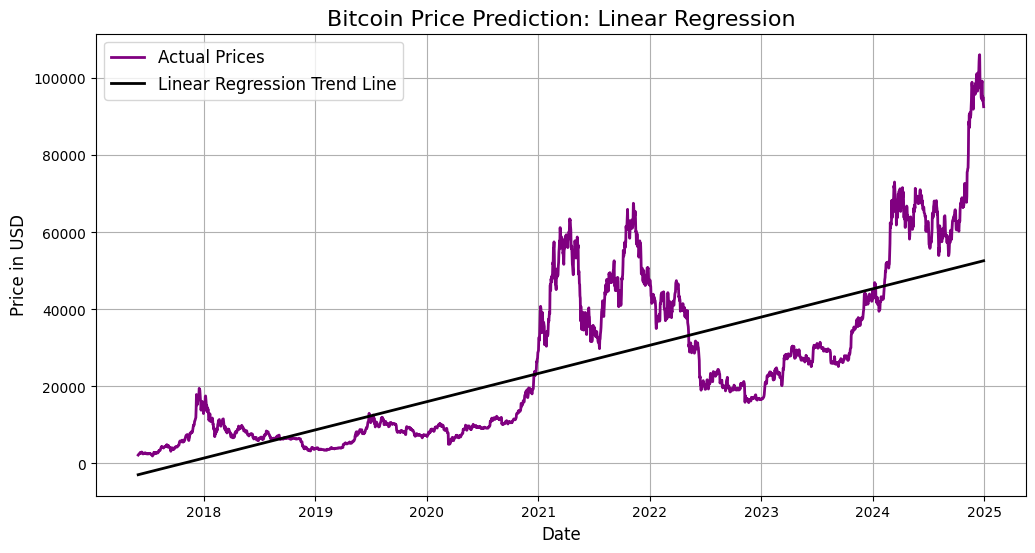

Metrics:
Mean Absolute Error (MAE): 1547.2960700997592
Mean Squared Error (MSE): 5211177.781593201
Root Mean Squared Error (RMSE): 2282.800425265687
R-squared (R²): 0.9893016170908435
Mean Absolute Percentage Error (MAPE): 5.39%


In [229]:
# Existing Code
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

### DATA SCALING ###
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale all data

# Split the data into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.99, shuffle=False)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Existing Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

# Additional Metrics
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Convert to percentage

# Existing Visualization
trend = np.polyfit(range(len(y_test)), y_pred, 1)  # Fit a line over time
trend_line = np.polyval(trend, range(len(y_test)))

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_test.index, trend_line, label='Linear Regression Trend Line', color='black', linewidth=2)
plt.title('Bitcoin Price Prediction: Linear Regression', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print Metrics
print('Metrics:')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

***LOGARITHMIC FIT***


In [178]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the logarithmic function
def log_function(x, a, b):
    return a + b * np.log(x)

# Prepare the data
X = btc_data.index.values.astype(float)  # Use the date index as X, convert to float
y = btc_data['Close'].values  # Target variable (Price)

# Represent dates as numerical values for logarithmic fitting
X_numeric = np.arange(len(X)) + 1  # Start from 1 to avoid log(0)

# Avoid invalid log values by ensuring X > 0 and scaling down X_numeric
X_numeric = np.where(X_numeric <= 0, 1e-9, X_numeric)  # Replace zeros or negatives with a small positive value
X_numeric = X_numeric / X_numeric.max()  # Scale X_numeric to a range between 0 and 1

# Reshape y to be 1-dimensional
y = y.ravel()  # This reshapes y into a 1-dimensional array

# Fit the logarithmic function to the data
params, _ = curve_fit(log_function, X_numeric, y)  # Use X_numeric for fitting

# Get the parameters of the logarithmic model
a, b = params

# Predict using the logarithmic model
y_pred = log_function(X_numeric, a, b)  # Use X_numeric for prediction

# Evaluate the model
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mse**0.5

# Additional Metrics
r2 = r2_score(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100  # Convert to percentage

# Plot Actual Prices and Logarithmic Trend Line
plt.figure(figsize=(12, 6))

plt.plot(btc_data.index, y, label='Actual Prices', color='purple', linewidth=2)
plt.plot(btc_data.index, y_pred, label='Logarithmic Fit', color='black', linewidth=2)

plt.title('Bitcoin Price Prediction: Logarithmic Regression', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

# Print Metrics
print('Metrics:')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Metrics:
Mean Absolute Error (MAE): 14678.365063106661
Mean Squared Error (MSE): 305724930.0044564
Root Mean Squared Error (RMSE): 17484.991564323285
R-squared (R²): 0.36932197956097523
Mean Absolute Percentage Error (MAPE): 111.78%


***EXPONENTIAL FIT***

[1.00037016 1.00074047 1.00111091 ... 2.71627052 2.71727599 2.71828183]


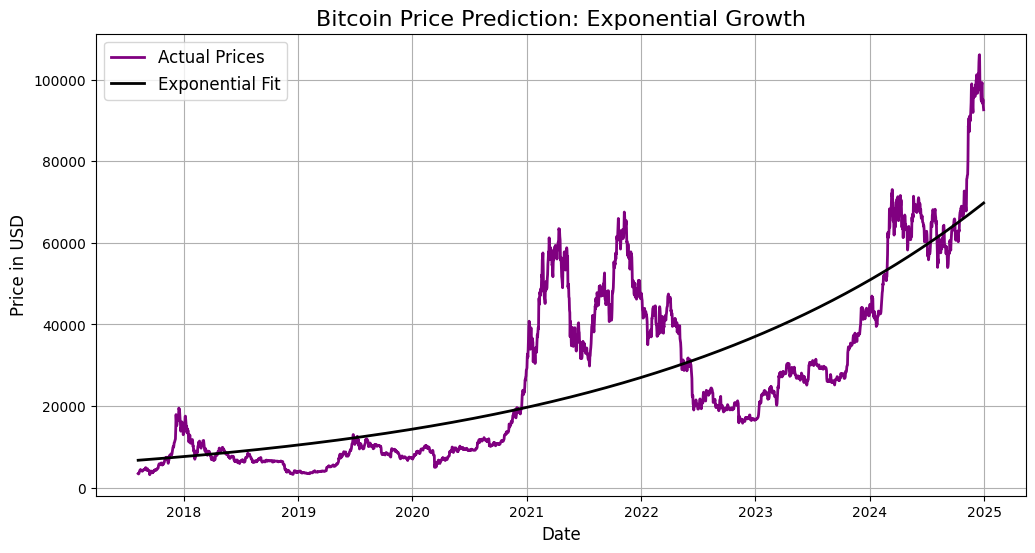

Metrics:
Mean Absolute Error (MAE): 10277.124899017663
Mean Squared Error (MSE): 180883289.23219496
Root Mean Squared Error (RMSE): 13449.285826102252
R-squared (R²): 0.6268570090708749
Mean Absolute Percentage Error (MAPE): 52.70%


In [179]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the exponential function
def exponential_function(x, a, b):
    return a * np.exp(b * x)

# Prepare the data
X = btc_data.index.values.astype(float)  # Use the date index as X, convert to float
y = btc_data['Close'].values  # Target variable (Price)

# Represent dates as numerical values for exponential fitting
X_numeric = np.arange(len(X)) + 1  # Start from 1 to avoid issues with exp(0)

# Scale X_numeric to a range between 0 and 1 for numerical stability
X_numeric = X_numeric / X_numeric.max()

# Ensure inputs are 1-dimensional arrays
X_numeric = X_numeric.ravel()
y = y.ravel()

# Remove problematic values
X_numeric = np.nan_to_num(X_numeric, nan=1e-9, posinf=1e9, neginf=0.0)
y = np.nan_to_num(y, nan=1e-9, posinf=1e9, neginf=0.0)

# Test the function output
try:
    print(exponential_function(X_numeric, 1, 1))  # Test with dummy parameters
except Exception as e:
    print(f"Error in function output: {e}")

# Fit the exponential function to the data
params, _ = curve_fit(exponential_function, X_numeric, y, maxfev=10000)

# Get the parameters of the exponential model
a, b = params

# Predict using the exponential model
y_pred = exponential_function(X_numeric, a, b)

# Evaluate the model
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mse**0.5

# Additional Metrics
r2 = r2_score(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100  # Convert to percentage

# Plot Actual Prices and Exponential Trend Line
plt.figure(figsize=(12, 6))

plt.plot(btc_data.index, y, label='Actual Prices', color='purple', linewidth=2)
plt.plot(btc_data.index, y_pred, label='Exponential Fit', color='black', linewidth=2)

plt.title('Bitcoin Price Prediction: Exponential Growth', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

# Print Metrics
print(f'Metrics:')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


***kNN***

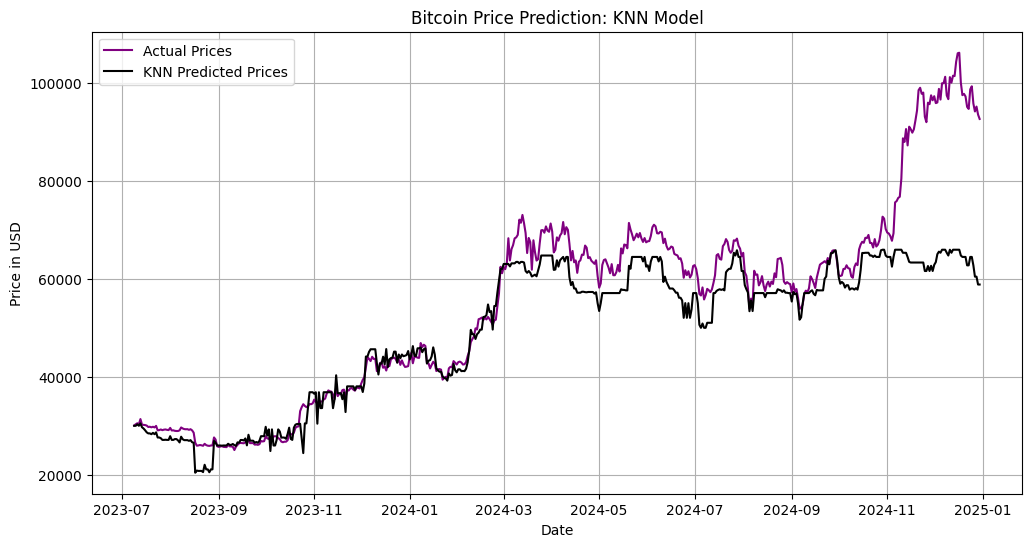

Model Evaluation Metrics:
Mean Absolute Error (MAE): 5883.01
Mean Squared Error (MSE): 114373956.93
R-squared (R2): 0.72


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)
### DATA SCALING ###
# Scale features using MinMaxScaler
scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)  # The error was here
X_scaled = scaler.fit_transform(btc_data[features])  # Scale the features in btc_data

### TRAIN-TEST SPLIT ###
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

### KNN MODEL ###
# Initialize the KNN Regressor with k=5 (you can tune this parameter)
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

### PLOT ACTUAL VS PREDICTED ###
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index[-len(y_test):], y_test, label="Actual Prices", color='purple')
plt.plot(btc_data.index[-len(y_test):], y_pred, label="KNN Predicted Prices", color='black')

plt.title('Bitcoin Price Prediction: KNN Model')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()

### MODEL EVALUATION ###
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

***Random Forest***

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


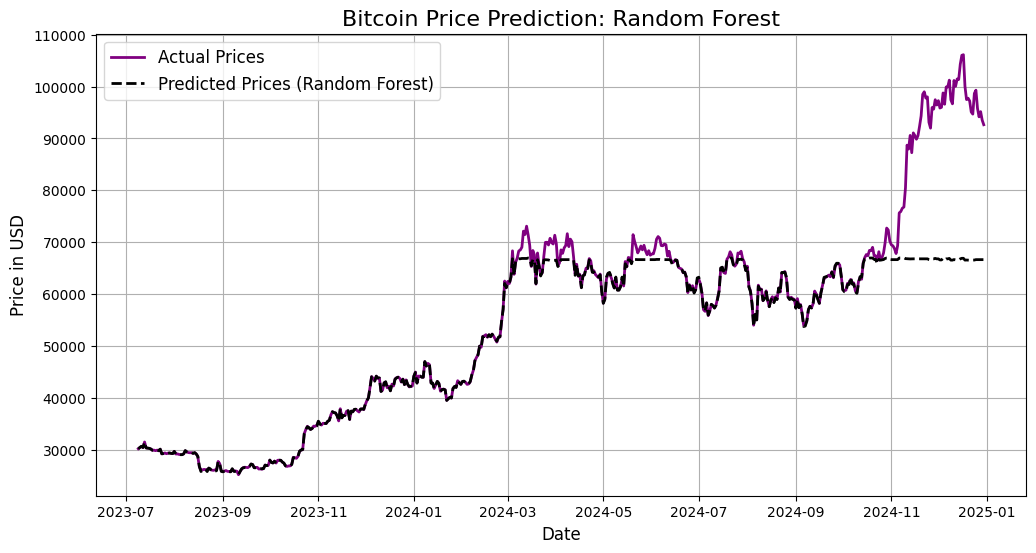

Metrics:
Random Forest - Mean Absolute Error (MAE): 3256.5538138285583
Random Forest - Mean Squared Error (MSE): 85224123.14215964
Random Forest - Root Mean Squared Error (RMSE): 9231.691239537837


In [181]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

# Split the data into training and testing sets
# Set test_size to 0.2 for 80% training and 20% testing, and ensure the data is not shuffled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
random_forest = RandomForestRegressor(n_estimators=50, random_state=42, max_depth=20)

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf**0.5


# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_test.index, y_pred_rf, label='Predicted Prices (Random Forest)', color='black', linestyle='dashed', linewidth=2)

# Add labels, title, legend, and grid
plt.title('Bitcoin Price Prediction: Random Forest', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print metrics
print(f'Metrics:')
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}")

***SMA***

<ipython-input-182-c070dc28ead9>:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_pred_sma = test_data['SMA'].fillna(method='bfill')  # Forward fill NaN values


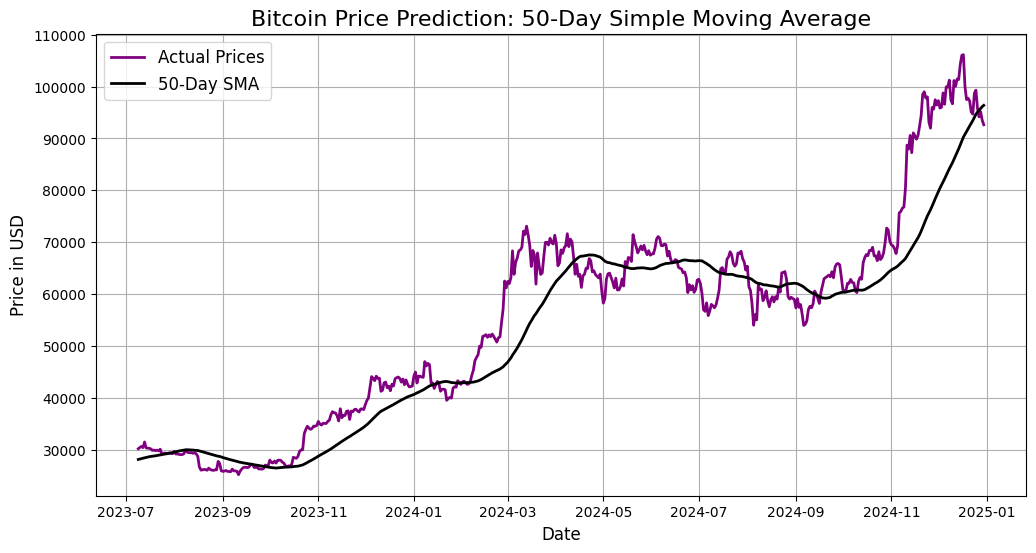

Mean Absolute Error (SMA): 4990.51
Mean Squared Error (SMA): 50186587.65
Root Mean Squared Error (SMA): 7084.25
R-squared (R²): 0.88
Mean Absolute Percentage Error (MAPE): nan%


In [182]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the Simple Moving Average (SMA)
sma_window = 50  # You can change this value to 20, 100, etc.
btc_data['SMA'] = btc_data['Close'].rolling(window=sma_window).mean()

# Prepare the data for training and testing
train_size = int(0.8 * len(btc_data))  # 80% for training and 20% for testing
train_data = btc_data[:train_size]
test_data = btc_data[train_size:]

# Forecast using the Simple Moving Average (SMA) model
# For simplicity, we predict using the last available SMA value
y_pred_sma = test_data['SMA'].fillna(method='bfill')  # Forward fill NaN values

# True values for comparison
y_test_sma = test_data['Close']

# Remove NaN values from both y_test_sma and y_pred_sma before calculating the error
y_test_sma = y_test_sma.dropna()
y_pred_sma = y_pred_sma.dropna()

# Make sure both arrays have the same length and corresponding indices
y_pred_sma = y_pred_sma[y_pred_sma.index.isin(y_test_sma.index)]
y_test_sma = y_test_sma[y_test_sma.index.isin(y_pred_sma.index)]

# Evaluate the SMA model
mae_sma = mean_absolute_error(y_test_sma, y_pred_sma)
mse_sma = mean_squared_error(y_test_sma, y_pred_sma)
rmse_sma = np.sqrt(mse_sma)

# Calculate R-squared (R²) and Mean Absolute Percentage Error (MAPE)
r2_sma = r2_score(y_test_sma, y_pred_sma)
mape_sma = np.mean(np.abs((y_test_sma - y_pred_sma) / y_test_sma)) * 100

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot the actual close prices
plt.plot(test_data['Close'], label='Actual Prices', color='purple', linewidth=2)

# Plot the predicted SMA prices
plt.plot(y_pred_sma, label=f'{sma_window}-Day SMA', color='black', linewidth=2)  # Use y_pred_sma for plotting

# Add labels, title, legend, and grid
plt.title(f'Bitcoin Price Prediction: {sma_window}-Day Simple Moving Average', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Output the evaluation metrics for the SMA model
print(f'Mean Absolute Error (SMA): {mae_sma:.2f}')
print(f'Mean Squared Error (SMA): {mse_sma:.2f}')
print(f'Root Mean Squared Error (SMA): {rmse_sma:.2f}')
print(f'R-squared (R²): {r2_sma:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_sma:.2f}%')


***SVR***

In [183]:
# Step 1: Import necessary libraries
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Prepare the dataset (features and target)
X = btc_data[features].values  # Features
y = btc_data['Close'].values  # Target variable (Close price)

# Split the data into training and testing sets
# Set test_size to 0.2 for 80% training and 20% testing, and ensure the data is not shuffled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Initialize and train the SVR model
svr = SVR(kernel='rbf', C=30, epsilon=0.01)  # Radial Basis Function kernel
svr.fit(X_train_scaled, y_train)  # Train the model on the scaled training dataset

# Step 5: Make predictions on the test set
y_pred = svr.predict(X_test_scaled)  # Get predictions for the test set

# Step 6: Plot actual vs predicted prices for the test set
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index[-len(y_test):], y_test, label='Actual Prices', color='purple')  # Plot actual prices
plt.plot(btc_data.index[-len(y_test):], y_pred, label='Predicted Prices (SVR)', color='black')  # Plot predicted prices
plt.title('Bitcoin Actual vs Predicted Prices (SVR) - Test Set')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Step 7: Evaluate the SVR model using various metrics
mae_svr = mean_absolute_error(y_test, y_pred)
mse_svr = mean_squared_error(y_test, y_pred)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape_svr = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Output the evaluation metrics for the SVR model
print(f'Mean Absolute Error (SVR): {mae_svr:.2f}')
print(f'Mean Squared Error (SVR): {mse_svr:.2f}')
print(f'Root Mean Squared Error (RMSE) (SVR): {rmse_svr:.2f}')
print(f'R-squared (R²) (SVR): {r2_svr:.2f}')
print(f'Mean Absolute Percentage Error (MAPE) (SVR): {mape_svr:.2f}%')


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error (SVR): 29505.54
Mean Squared Error (SVR): 1323942399.21
Root Mean Squared Error (RMSE) (SVR): 36386.02
R-squared (R²) (SVR): -2.28
Mean Absolute Percentage Error (MAPE) (SVR): 46.63%


***LSTM***

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - loss: 0.0471
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step


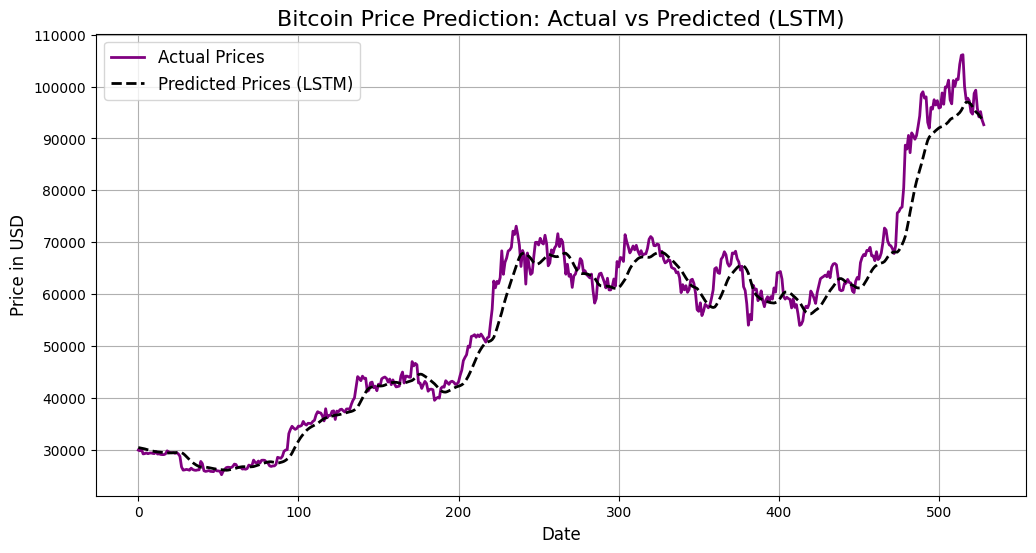

Metrics:
LSTM - Mean Absolute Error (MAE): 2644.44
LSTM - Mean Squared Error (MSE): 14633894.42
LSTM - Root Mean Squared Error (RMSE): 3825.43
LSTM - R-squared (R²): 0.96
LSTM - Mean Absolute Percentage Error (MAPE): 4.41%


In [184]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Prepare the data for modeling
X = btc_data[features]  # Features (e.g., technical indicators)
y = btc_data['Close']  # Target variable (Bitcoin closing price)

# Scale the data to a range of 0-1 using MinMaxScaler (important for LSTM)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(btc_data[['Close']])  # Scale the target variable

# Prepare the data for supervised learning (using a time window for the LSTM)
def create_dataset(data, time_step=60):
    X_data, y_data = [], []
    for i in range(time_step, len(data)):
        X_data.append(data[i-time_step:i, 0])  # Take 'time_step' previous data points
        y_data.append(data[i, 0])  # Target is the 'Close' price
    return np.array(X_data), np.array(y_data)

# Create the dataset
time_step = 60
X_data, y_data = create_dataset(scaled_data, time_step)

# Reshape X_data for LSTM input (samples, time_steps, features)
X_data = X_data.reshape(X_data.shape[0], X_data.shape[1], 1)

# Split the data into training and testing sets
train_size = int(len(X_data) * 0.8)
X_train, X_test = X_data[:train_size], X_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

# Initialize the LSTM model
lstm_model = Sequential()

# Add LSTM layers
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))  # Dropout for regularization
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))

# Add output layer
lstm_model.add(Dense(units=1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
lstm_model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=1)

# Predict on the test set
y_pred_lstm = lstm_model.predict(X_test)

# Inverse transform the predictions and actual values to get the original scale of the prices
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mae_lstm = mean_absolute_error(y_test_actual, y_pred_lstm)
mse_lstm = mean_squared_error(y_test_actual, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test_actual, y_pred_lstm)

# Calculate Mean Absolute Percentage Error (MAPE)
mape_lstm = np.mean(np.abs((y_test_actual - y_pred_lstm) / y_test_actual)) * 100

# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_pred_lstm, label='Predicted Prices (LSTM)', color='black', linestyle='dashed', linewidth=2)

# Add labels, title, legend, and grid
plt.title('Bitcoin Price Prediction: Actual vs Predicted (LSTM)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print metrics
print(f'Metrics:')
print(f"LSTM - Mean Absolute Error (MAE): {mae_lstm:.2f}")
print(f"LSTM - Mean Squared Error (MSE): {mse_lstm:.2f}")
print(f"LSTM - Root Mean Squared Error (RMSE): {rmse_lstm:.2f}")
print(f"LSTM - R-squared (R²): {r2_lstm:.2f}")
print(f"LSTM - Mean Absolute Percentage Error (MAPE): {mape_lstm:.2f}%")




---


# ***7. Model Optimization***


***HYPERPARAMETER TUNING:***

*    GridSearchCV
*    RandomizedSearchCV
*    Hybrid Search

(for Linear regression ,Logarithmic Fit and Exponential Fit:


*   L1 - Lasso Regularization
*   L2 - Ridge Regularization
)




***CROSS-VALIDATION:***



*   K-Fold
*   Time Sereis Split
*   Leave One Out







# ***a)Linear Regression Optimization***

***L1***

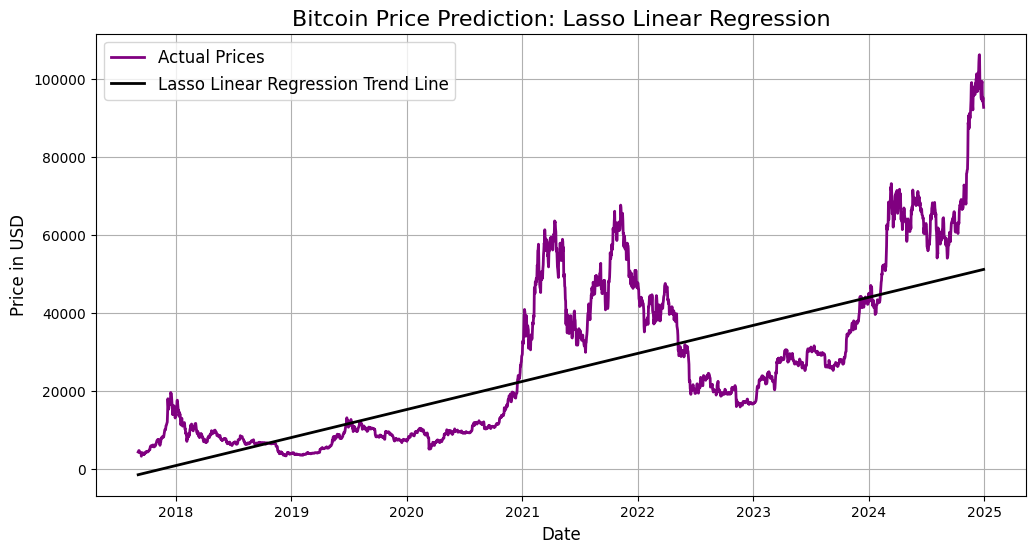

Metrics:
Mean Absolute Error: 2439.59
Mean Squared Error: 10483645.77
Root Mean Squared Error: 3237.85
R-squared (R²): 0.98
Mean Absolute Percentage Error (MAPE): 8.18%


In [185]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

### DATA SCALING ###
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale all data

# Split the data into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.99, shuffle=False)

# Train a Lasso (L1 regularized) Linear Regression model
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength (higher alpha means more regularization)
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test.values.ravel() - y_pred) / y_test.values.ravel())) * 100

# Calculate linear trend line for predictions (just for visualization)
trend = np.polyfit(range(len(y_test)), y_pred, 1)  # Fit a line over time
trend_line = np.polyval(trend, range(len(y_test)))

# Plot Actual and Trend Line
plt.figure(figsize=(12, 6))

# y_test might be a pandas Series, so access values directly using .values
plt.plot(y_test.index, y_test.values, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_test.index, trend_line, label='Lasso Linear Regression Trend Line', color='black', linewidth=2)

# Add labels, title, legend, and grid
plt.title('Bitcoin Price Prediction: Lasso Linear Regression', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print Metrics
print(f'Metrics:')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


***L2***

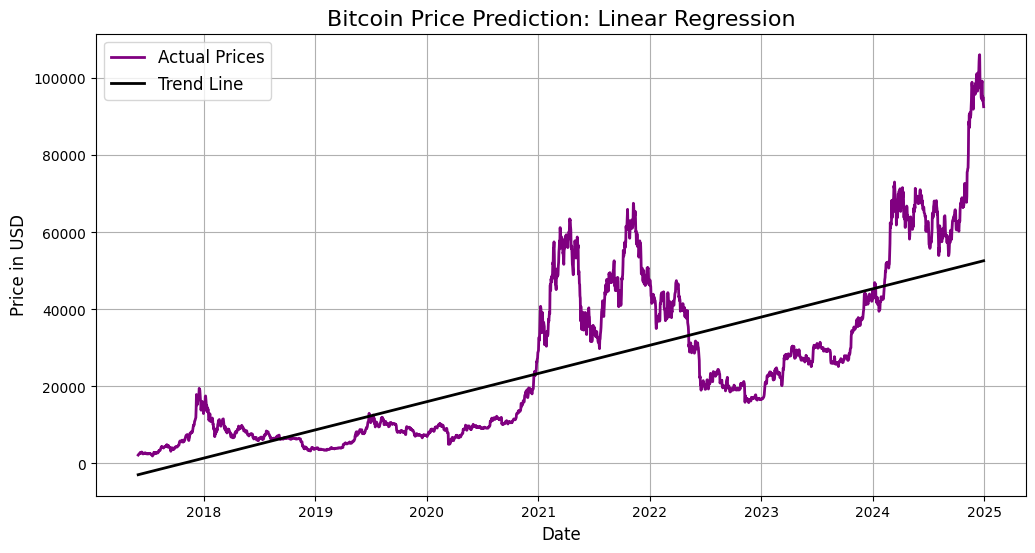

Metrics:
Mean Absolute Error: 1547.2960700997592
Mean Squared Error: 5211177.781593201
Root Mean Squared Error: 2282.800425265687
R-squared: 0.9893016170908435
Mean Absolute Percentage Error (MAPE): 5.387652047593184


In [230]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare data for modeling
X = btc_data[features]
y = btc_data['Close']

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# Split data into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.99, shuffle=False)

# Train Linear Regression model and predict
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Plot actual vs. predicted trend line
trend_line = np.polyval(np.polyfit(range(len(y_test)), y_pred, 1), range(len(y_test)))
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_test.index, trend_line, label='Trend Line', color='black', linewidth=2)
plt.title('Bitcoin Price Prediction: Linear Regression', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print Metrics
print(f"Metrics:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


# ***b)Logarithmic Fit optimization***

***L1***

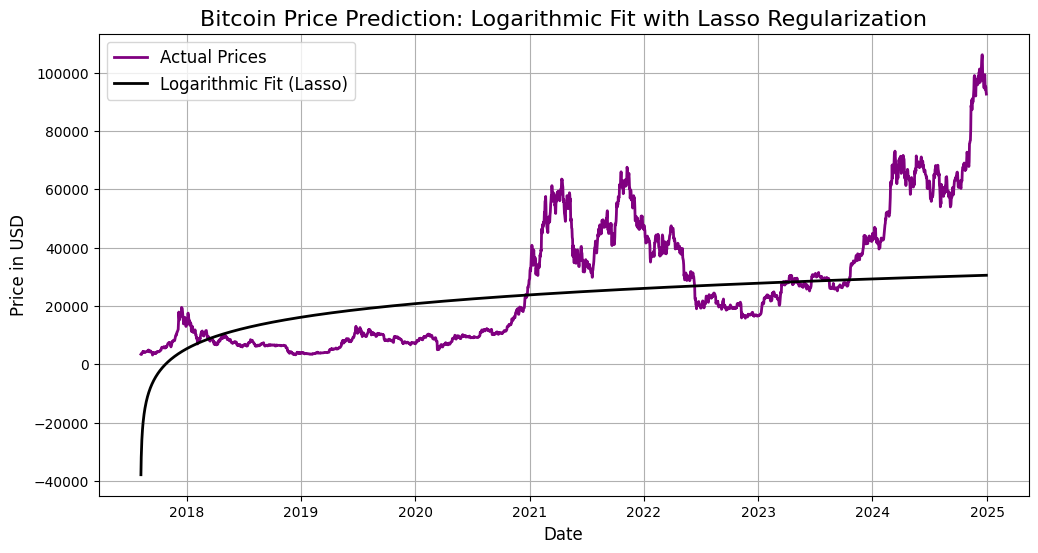

Metrics:
Mean Absolute Error: 25878.60096484885
Mean Squared Error: 1027535051.019362
Root Mean Squared Error: 32055.187583593422
R-squared: -1.5451427603646124
Mean Absolute Percentage Error (MAPE): 39.85014851949849


In [187]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import yfinance as yf

# Prepare the data for modeling
X = btc_data.index.values.astype(float)  # Use the date index as X, convert to float
y = btc_data['Close'].values  # Target variable (Price)

# Represent dates as numerical values for logarithmic fitting
X_numeric = np.arange(len(X)) + 1  # Start from 1 to avoid log(0)

# Avoid invalid log values by ensuring X > 0 and scaling down X_numeric
X_numeric = np.where(X_numeric <= 0, 1e-9, X_numeric)  # Replace zeros or negatives with a small positive value
X_numeric = X_numeric / X_numeric.max()  # Scale X_numeric to a range between 0 and 1

# Reshape y to be 1-dimensional
y = y.ravel()  # This reshapes y into a 1-dimensional array

# Split the data into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_numeric.reshape(-1, 1), y, test_size=0.2, shuffle=False)

# Apply Lasso regression (L1 regularization) on logarithmic data
lasso_model = Lasso(alpha=0.01)  # alpha controls the regularization strength
lasso_model.fit(np.log(X_train), y_train)  # Applying the log to the feature for fitting

# Predict using the trained model for the entire dataset (train + test)
y_pred_full = lasso_model.predict(np.log(X_numeric.reshape(-1, 1)))  # Using the entire X_numeric for prediction

# Plot the full range of Actual Prices and Logarithmic Fit with Lasso Regularization
plt.figure(figsize=(12, 6))

# Plot Actual Prices
plt.plot(btc_data.index, y, label='Actual Prices', color='purple', linewidth=2)

# Plot the predicted values (Logarithmic Fit with Lasso Regularization)
plt.plot(btc_data.index, y_pred_full, label='Logarithmic Fit (Lasso)', color='black', linewidth=2)

plt.title('Bitcoin Price Prediction: Logarithmic Fit with Lasso Regularization', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Evaluate the model on the test set
mae = mean_absolute_error(y_test, y_pred_full[-len(y_test):])  # Evaluate only on the test set
mse = mean_squared_error(y_test, y_pred_full[-len(y_test):])
rmse = mse**0.5

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred_full[-len(y_test):])

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred_full[-len(y_test):]) / y_test)) * 100

# Print Metrics
print(f'Metrics:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')


***L2***

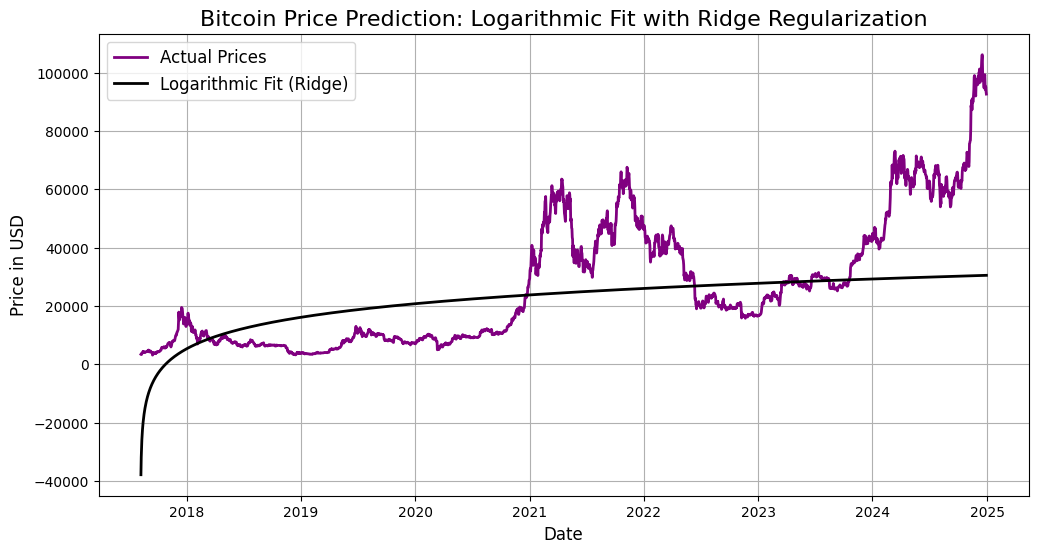

Metrics:
Mean Absolute Error: 25882.119559808903
Mean Squared Error: 1027773807.1705024
Root Mean Squared Error: 32058.911509446207
R-squared: -1.5457341450467843
Mean Absolute Percentage Error (MAPE): 39.85574253757939


In [188]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import yfinance as yf


# Prepare the data for modeling
X = btc_data.index.values.astype(float)  # Use the date index as X, convert to float
y = btc_data['Close'].values  # Target variable (Price)

# Represent dates as numerical values for logarithmic fitting
X_numeric = np.arange(len(X)) + 1  # Start from 1 to avoid log(0)

# Avoid invalid log values by ensuring X > 0 and scaling down X_numeric
X_numeric = np.where(X_numeric <= 0, 1e-9, X_numeric)  # Replace zeros or negatives with a small positive value
X_numeric = X_numeric / X_numeric.max()  # Scale X_numeric to a range between 0 and 1

# Reshape y to be 1-dimensional
y = y.ravel()  # This reshapes y into a 1-dimensional array

# Split the data into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_numeric.reshape(-1, 1), y, test_size=0.2, shuffle=False)

# Apply Ridge regression (L2 regularization) on logarithmic data
ridge_model = Ridge(alpha=1.0)  # alpha controls the regularization strength
ridge_model.fit(np.log(X_train), y_train)  # Applying the log to the feature for fitting

# Predict using the trained model for the entire dataset (train + test)
y_pred_full = ridge_model.predict(np.log(X_numeric.reshape(-1, 1)))  # Using the entire X_numeric for prediction

# Plot the full range of Actual Prices and Logarithmic Fit with Ridge Regularization
plt.figure(figsize=(12, 6))

# Plot Actual Prices
plt.plot(btc_data.index, y, label='Actual Prices', color='purple', linewidth=2)

# Plot the predicted values (Logarithmic Fit with Ridge Regularization)
plt.plot(btc_data.index, y_pred_full, label='Logarithmic Fit (Ridge)', color='black', linewidth=2)

plt.title('Bitcoin Price Prediction: Logarithmic Fit with Ridge Regularization', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Evaluate the model on the test set
mae = mean_absolute_error(y_test, y_pred_full[-len(y_test):])  # Evaluate only on the test set
mse = mean_squared_error(y_test, y_pred_full[-len(y_test):])
rmse = mse**0.5

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred_full[-len(y_test):])

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred_full[-len(y_test):]) / y_test)) * 100

# Print Metrics
print(f'Metrics:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')


# ***c)Exponential Fit Optimization***

***L1***

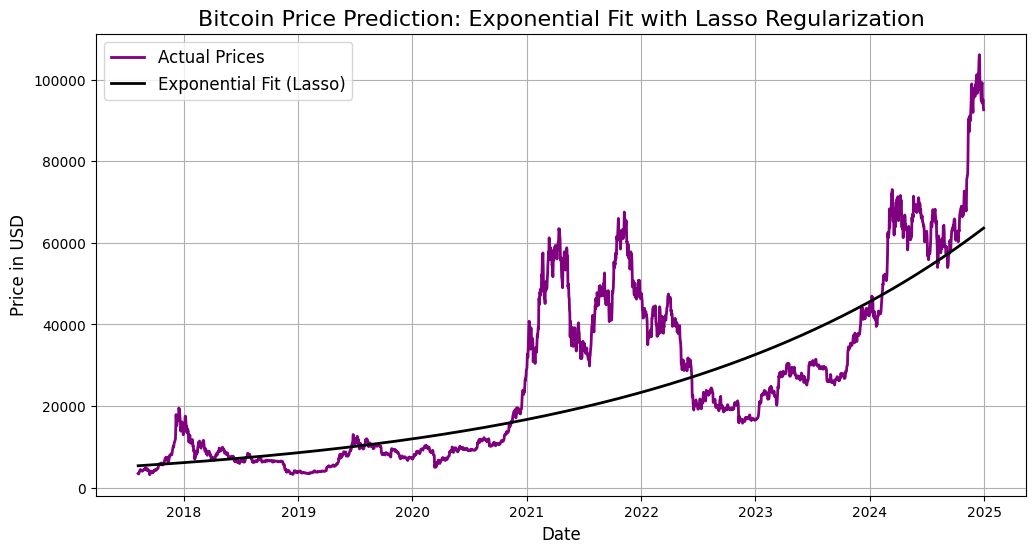

Metrics:
Mean Absolute Error: 11680.339639019021
Mean Squared Error: 218402696.58109173
Root Mean Squared Error: 14778.453795343128
R²: 0.45902960536866355
MAPE: 36.598504394613215


In [189]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import yfinance as yf


# Prepare the data
X = np.arange(len(btc_data)) + 1  # Use numeric indices as X (starting from 1 to avoid log issues)
y = btc_data['Close'].values  # Target variable (Price)

# Scale X for numerical stability
X_scaled = X / X.max()

# Apply log transformation to y to linearize the exponential relationship
y_log = np.log(y)

# Remove problematic values
X_scaled = np.nan_to_num(X_scaled, nan=1e-9, posinf=1e9, neginf=0.0)
y_log = np.nan_to_num(y_log, nan=1e-9, posinf=1e9, neginf=0.0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled.reshape(-1, 1), y_log, test_size=0.2, shuffle=False)

# Apply Lasso regression (L1 regularization) on the log-transformed data
lasso_model = Lasso(alpha=0.01)  # alpha controls the regularization strength
lasso_model.fit(X_train, y_train)

# Predict on the entire dataset
y_pred_log = lasso_model.predict(X_scaled.reshape(-1, 1))

# Transform predictions back to the original scale
y_pred = np.exp(y_pred_log)  # Exponentiate to get back to the original price scale

# Evaluate the model on the test set
mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred_log[-len(y_test):]))
mse = mean_squared_error(np.exp(y_test), np.exp(y_pred_log[-len(y_test):]))
rmse = mse**0.5

# Calculate R²
r2 = r2_score(np.exp(y_test), np.exp(y_pred_log[-len(y_test):]))

# Calculate MAPE
mape = np.mean(np.abs((np.exp(y_test) - np.exp(y_pred_log[-len(y_test):])) / np.exp(y_test))) * 100

# Plot Actual Prices and Exponential Fit with Lasso Regularization
plt.figure(figsize=(12, 6))

# Plot Actual Prices
plt.plot(btc_data.index, y, label='Actual Prices', color='purple', linewidth=2)

# Plot the predicted values (Exponential Fit with Lasso Regularization)
plt.plot(btc_data.index, y_pred, label='Exponential Fit (Lasso)', color='black', linewidth=2)

plt.title('Bitcoin Price Prediction: Exponential Fit with Lasso Regularization', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print Metrics
print(f'Metrics:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R²: {r2}')
print(f'MAPE: {mape}')


***L2***

[*********************100%***********************]  1 of 1 completed


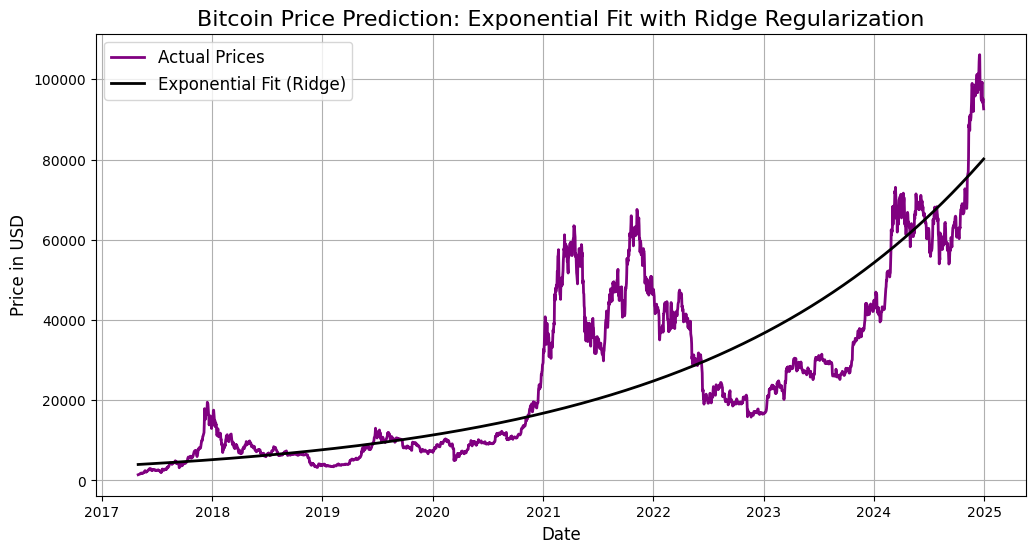

Metrics:
Mean Absolute Error: 11603.366596281001
Mean Squared Error: 175264616.06989014
Root Mean Squared Error: 13238.754324704803
R²: 0.5730550177995368
MAPE: 46.76311769075859


In [190]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import yfinance as yf

# Download the dataset
btc_data = yf.download("BTC-USD", start="2017-05-01", end="2024-12-31")

# Prepare the data
X = np.arange(len(btc_data)) + 1  # Use numeric indices as X (starting from 1 to avoid log issues)
y = btc_data['Close'].values  # Target variable (Price)

# Scale X for numerical stability
X_scaled = X / X.max()

# Apply log transformation to y to linearize the exponential relationship
y_log = np.log(y)

# Remove problematic values
X_scaled = np.nan_to_num(X_scaled, nan=1e-9, posinf=1e9, neginf=0.0)
y_log = np.nan_to_num(y_log, nan=1e-9, posinf=1e9, neginf=0.0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled.reshape(-1, 1), y_log, test_size=0.2, shuffle=False)

# Apply Ridge regression (L2 regularization) on the log-transformed data
ridge_model = Ridge(alpha=0.01)  # alpha controls the regularization strength
ridge_model.fit(X_train, y_train)

# Predict on the entire dataset
y_pred_log = ridge_model.predict(X_scaled.reshape(-1, 1))

# Transform predictions back to the original scale
y_pred = np.exp(y_pred_log)  # Exponentiate to get back to the original price scale

# Evaluate the model on the test set
mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred_log[-len(y_test):]))
mse = mean_squared_error(np.exp(y_test), np.exp(y_pred_log[-len(y_test):]))
rmse = mse**0.5

# Calculate R²
r2 = r2_score(np.exp(y_test), np.exp(y_pred_log[-len(y_test):]))

# Calculate MAPE
mape = np.mean(np.abs((np.exp(y_test) - np.exp(y_pred_log[-len(y_test):])) / np.exp(y_test))) * 100

# Plot Actual Prices and Exponential Fit with Ridge Regularization
plt.figure(figsize=(12, 6))

# Plot Actual Prices
plt.plot(btc_data.index, y, label='Actual Prices', color='purple', linewidth=2)

# Plot the predicted values (Exponential Fit with Ridge Regularization)
plt.plot(btc_data.index, y_pred, label='Exponential Fit (Ridge)', color='black', linewidth=2)

plt.title('Bitcoin Price Prediction: Exponential Fit with Ridge Regularization', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print Metrics
print(f'Metrics:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R²: {r2}')
print(f'MAPE: {mape}')


# ***d)kNN Optimization:***

***Grid Search - kNN***

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler   # Import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error # Import error metrics
from sklearn.preprocessing import MinMaxScaler    # Import MinMaxScaler
import matplotlib.pyplot as plt                   # Import matplotlib for plotting

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

### DATA SCALING ###
# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Scale only the features in X

### TRAIN-TEST SPLIT ###
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

### KNN MODEL ###
knn1=3
knn2=5
knn3=7
knn4=9
knn5=11
# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(100, 200)),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2],  # Power parameter for Minkowski metric (1=Manhattan, 2=Euclidean)
    'metric': ['minkowski', 'euclidean', 'manhattan']  # Distance metric
}


# Initialize the GridSearchCV object
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=2, scoring='neg_mean_squared_error', verbose=2)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Extract and print the best parameters
knnGridSModel = grid_search.best_params_

# Print results
print("Best Parameters from Grid Search:")
print(knnGridSModel)

Fitting 2 folds for each of 1200 candidates, totalling 2400 fits
[CV] END metric=minkowski, n_neighbors=100, p=1, weights=uniform; total time=   0.1s
[CV] END metric=minkowski, n_neighbors=100, p=1, weights=uniform; total time=   0.3s
[CV] END metric=minkowski, n_neighbors=100, p=1, weights=distance; total time=   0.2s
[CV] END metric=minkowski, n_neighbors=100, p=1, weights=distance; total time=   0.2s
[CV] END metric=minkowski, n_neighbors=100, p=2, weights=uniform; total time=   0.2s
[CV] END metric=minkowski, n_neighbors=100, p=2, weights=uniform; total time=   0.1s
[CV] END metric=minkowski, n_neighbors=100, p=2, weights=distance; total time=   0.1s
[CV] END metric=minkowski, n_neighbors=100, p=2, weights=distance; total time=   0.1s
[CV] END metric=minkowski, n_neighbors=101, p=1, weights=uniform; total time=   0.1s
[CV] END metric=minkowski, n_neighbors=101, p=1, weights=uniform; total time=   0.1s
[CV] END metric=minkowski, n_neighbors=101, p=1, weights=distance; total time=   

random

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Define the parameter grid for random search
param_distributions = {
    'n_neighbors': np.arange(100, 200),            # Number of neighbors to test
    'weights': ['uniform', 'distance'],         # Weighting function
    'p': [1, 2],                                # Distance metric: 1=Manhattan, 2=Euclidean
    'metric': ['minkowski', 'euclidean', 'manhattan']  # Distance metric to use
}

# Initialize the KNN Regressor
knn = KNeighborsRegressor()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_distributions,
    n_iter=50,                # Number of random combinations to try
    scoring='neg_mean_squared_error',  # Metric to optimize
    cv=2,                     # 5-fold cross-validation
    random_state=42,          # Set a seed for reproducibility
    n_jobs=-1                 # Use all available cores
)

# Perform the random search
random_search.fit(X_train, y_train)

# Extract and print the best parameters
knnRandomSModel = random_search.best_params_

# Print results
print("Best Parameters from Random Search:")
print(knnRandomSModel)


Best Parameters from Random Search:
{'weights': 'distance', 'p': 2, 'n_neighbors': 102, 'metric': 'euclidean'}


hybrid

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# Step 1: Define the broad hyperparameter space for Random Search
param_distributions = {
    'n_neighbors': np.arange(0, 200),            # Number of neighbors to test
    'weights': ['uniform', 'distance'],         # Weighting function
    'p': [1, 2],                                # Distance metric: 1=Manhattan, 2=Euclidean
    'metric': ['minkowski', 'euclidean', 'manhattan']  # Distance metric to use
}

# Initialize the KNN model
knn = KNeighborsRegressor()

# Step 2: Perform Random Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_distributions,
    n_iter=50,                # Number of random combinations to try
    scoring='neg_mean_squared_error',  # Metric to optimize
    cv=2,                     # 5-fold cross-validation
    random_state=42,          # Set a seed for reproducibility
    n_jobs=-1                 # Use all available cores for faster computation
)

random_search.fit(X_train, y_train)

# Get the best parameters from Random Search
best_random_params = random_search.best_params_
print("Best Parameters from Random Search:", best_random_params)

# Step 3: Broaden the grid based on Random Search results
refined_grid_params = {
    'n_neighbors': np.arange(max(1, best_random_params['n_neighbors'] - 10), best_random_params['n_neighbors'] + 10, 2),  # Increase the range
    'weights': [best_random_params['weights']],  # Fix the best weight function
    'p': [best_random_params['p']],  # Fix the best p value
    'metric': [best_random_params['metric']]  # Fix the best distance metric
}

# Step 4: Perform Grid Search within the refined hyperparameter space
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=refined_grid_params,
    scoring='neg_mean_squared_error',  # Metric to optimize
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores for faster computation
)

grid_search.fit(X_train, y_train)

knnHybridSModel=grid_search.best_params_

# Print the best hyperparameters found through the hybrid search
print("Best Hyperparameters (Hybrid Search):", knnHybridSModel)


Best Parameters from Random Search: {'weights': 'distance', 'p': 2, 'n_neighbors': 13, 'metric': 'euclidean'}
Best Hyperparameters (Hybrid Search): {'metric': 'euclidean', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}




---



***Grid results***

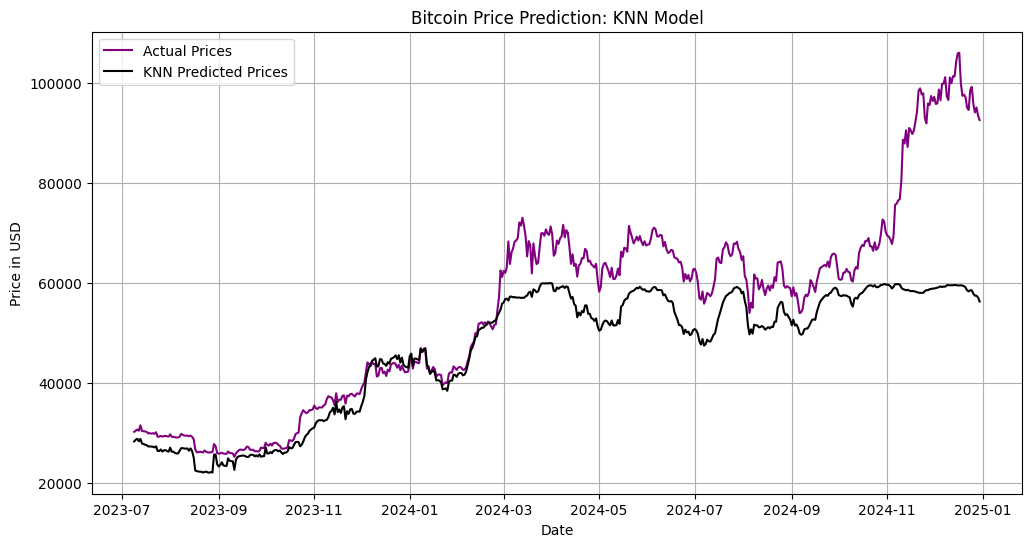

Model Evaluation Metrics:
Mean Absolute Error (MAE): 8636.02
Mean Squared Error (MSE): 176916185.88
Root Mean Squared Error (RMSE): 13300.98
R-squared (R²): 0.56
Mean Absolute Percentage Error (MAPE): 12.87


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

### DATA SCALING ###
# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(btc_data[features])  # Scale the features in btc_data

### TRAIN-TEST SPLIT ###
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

### KNN MODEL WITH BEST HYPERPARAMETERS ###
knn = KNeighborsRegressor(n_neighbors=100, metric='minkowski', p=2, weights='distance')

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

### PLOT ACTUAL VS PREDICTED ###
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index[-len(y_test):], y_test, label="Actual Prices", color='purple')
plt.plot(btc_data.index[-len(y_test):], y_pred, label="KNN Predicted Prices", color='black')

plt.title('Bitcoin Price Prediction: KNN Model')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()

### MODEL EVALUATION ###
# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")


***Random search Results***

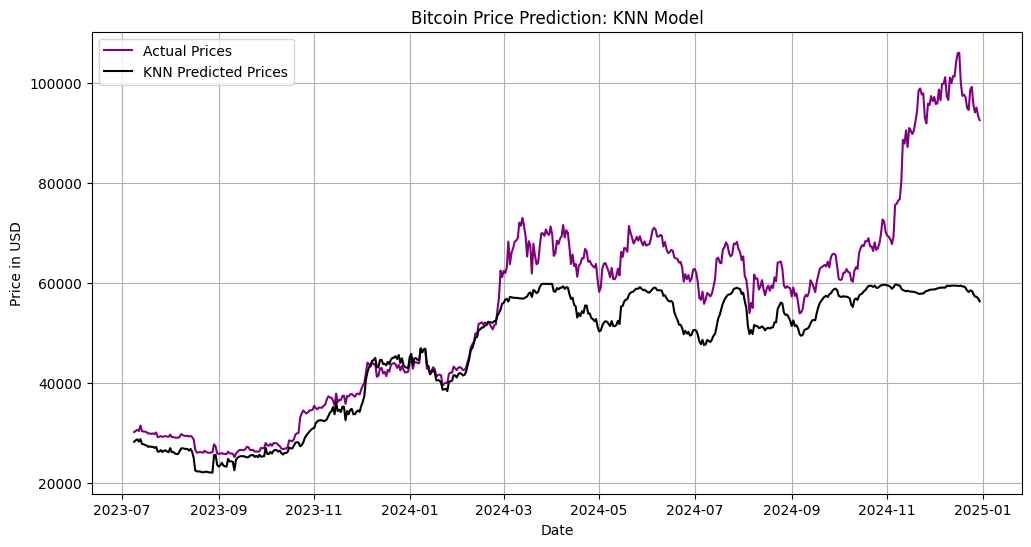

Model Evaluation Metrics:
Mean Absolute Error (MAE): 8683.21
Mean Squared Error (MSE): 178309329.40
Root Mean Squared Error (RMSE): 13353.25
R-squared (R²): 0.56
Mean Absolute Percentage Error (MAPE): 12.94


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

### DATA SCALING ###
# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(btc_data[features])  # Scale the features in btc_data

### TRAIN-TEST SPLIT ###
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

### KNN MODEL WITH BEST HYPERPARAMETERS ###
knn = KNeighborsRegressor(n_neighbors=102, metric='euclidean', p=2, weights='distance')

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

### PLOT ACTUAL VS PREDICTED ###
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index[-len(y_test):], y_test, label="Actual Prices", color='purple')
plt.plot(btc_data.index[-len(y_test):], y_pred, label="KNN Predicted Prices", color='black')

plt.title('Bitcoin Price Prediction: KNN Model')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()

### MODEL EVALUATION ###
# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")


***Hybrid Search Results***

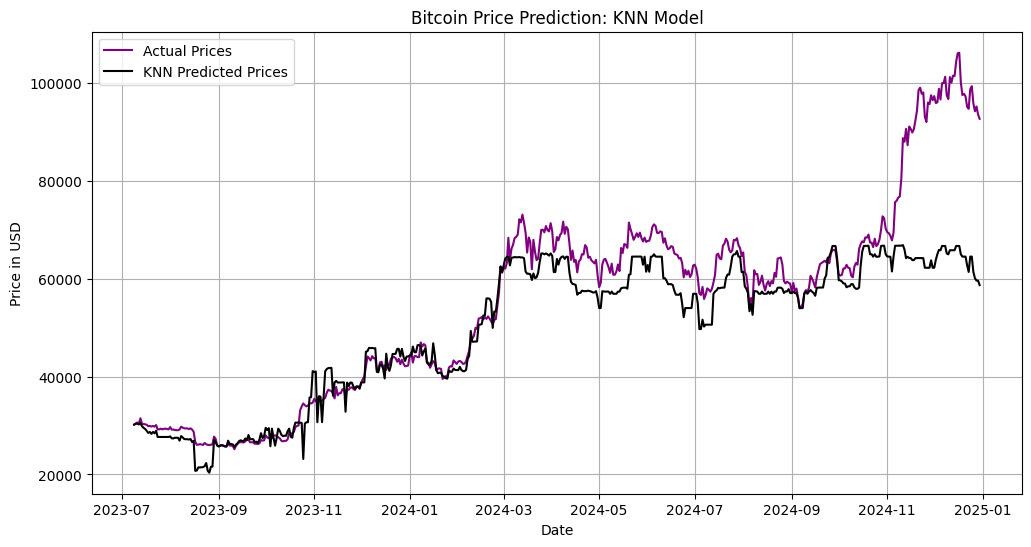

Model Evaluation Metrics:
Mean Absolute Error (MAE): 5878.29
Mean Squared Error (MSE): 112949253.89
Root Mean Squared Error (RMSE): 10627.76
R-squared (R²): 0.72
Mean Absolute Percentage Error (MAPE): 8.53


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

### DATA SCALING ###
# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(btc_data[features])  # Scale the features in btc_data

### TRAIN-TEST SPLIT ###
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

### KNN MODEL WITH BEST HYPERPARAMETERS ###
knn = KNeighborsRegressor(n_neighbors=3, metric='euclidean', p=2, weights='distance')

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

### PLOT ACTUAL VS PREDICTED ###
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index[-len(y_test):], y_test, label="Actual Prices", color='purple')
plt.plot(btc_data.index[-len(y_test):], y_pred, label="KNN Predicted Prices", color='black')

plt.title('Bitcoin Price Prediction: KNN Model')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()

### MODEL EVALUATION ###
# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")


***Define the Best Model***

In [ ]:
bestKNNModel = knnHybridSModel #Insert Best Performing Model

***Evaluate with CV K-Fold the best Model***

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Extract the best estimator from the hybrid search
bestKNNModel = grid_search.best_estimator_

# Set up K-Fold cross-validation
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # Shuffle for randomness

# Perform K-Fold Cross-Validation for RMSE (MSE)
cv_scores_mse = cross_val_score(
    estimator=bestKNNModel,
    X=X_train,  # Use the training data
    y=y_train,
    cv=kf,  # K-Fold object
    scoring='neg_mean_squared_error',  # Optimize for MSE
    n_jobs=-1  # Use all available cores
)

# Convert negative MSE scores to positive and calculate RMSE
mse_scores = -cv_scores_mse  # Negative MSE to positive
rmse_scores = np.sqrt(mse_scores)  # Root Mean Squared Error (RMSE)

# Perform K-Fold Cross-Validation for MAE
cv_scores_mae = cross_val_score(
    estimator=bestKNNModel,
    X=X_train,  # Use the training data
    y=y_train,
    cv=kf,  # K-Fold object
    scoring='neg_mean_absolute_error',  # Optimize for MAE
    n_jobs=-1  # Use all available cores
)

# Convert negative MAE scores to positive
mae_scores = -cv_scores_mae  # Negative MAE to positive

# Print the results
print("RMSE Scores for each fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("MAE Scores for each fold:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))


RMSE Scores for each fold: [539.25207937 616.4366848  472.39899648 474.10949305 427.01835937
 537.6234402  502.23536874 420.27604284 493.78687115 685.97062824]
Mean RMSE: 516.9107964252235
MAE Scores for each fold: [303.75680535 307.85912352 255.85120055 279.59356291 279.31659585
 339.91347499 291.48379101 269.38261454 270.51885004 358.05806739]
Mean MAE: 295.57340861371006


***Evaluate with CV TimeSeriesSplit the best Model***

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=10)  # Choose the number of splits

# Store RMSE and MAE scores for each fold
rmse_scores = []
mae_scores = []

# TimeSeriesSplit Cross-Validation
for train_index, test_index in tscv.split(X_train):  # Use X_train and y_train
    # Split the data
    X_train_split, X_test_split = X_train[train_index], X_train[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]

    # Fit the best model on the training split
    bestKNNModel.fit(X_train_split, y_train_split)

    # Predict on the test split
    y_pred_split = bestKNNModel.predict(X_test_split)

    # Calculate RMSE for the split
    rmse = np.sqrt(mean_squared_error(y_test_split, y_pred_split))
    rmse_scores.append(rmse)

    # Calculate MAE for the split
    mae = mean_absolute_error(y_test_split, y_pred_split)
    mae_scores.append(mae)

# Print the results
print("RMSE Scores for each fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("MAE Scores for each fold:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))


RMSE Scores for each fold: [2311.2444071198875, 962.9920235118925, 1300.1568671781927, 636.1064045332602, 933.2060712898212, 28115.210064313942, 9388.528744512158, 3788.9333361493914, 5909.43011592317, 3930.5267551501165]
Mean RMSE: 5727.633478968183
MAE Scores for each fold: [2005.7849374696066, 536.1455987667692, 1032.6460618189583, 494.06163336092595, 682.5429591495205, 23497.86138774658, 7514.402288450646, 3371.919911312857, 5299.819008761816, 3362.070080016988]
Mean MAE: 4779.725386685466


***Evaluate with CV Leave One Out the best Model***

In [ ]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN model
knn = KNeighborsRegressor(n_neighbors=10)

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Perform LOOCV for RMSE
scores_mse = cross_val_score(
    estimator=knn,  # Use KNN model
    X=X_train,  # Input features
    y=y_train,  # Target variable
    cv=loo,     # Leave-One-Out Cross-Validation
    scoring='neg_mean_squared_error',  # Use negative MSE
    n_jobs=-1   # Utilize all available CPU cores
)

# Convert negative MSE to RMSE
mse_scores = -scores_mse  # Negative MSE to positive
rmse_scores = np.sqrt(mse_scores)  # RMSE for interpretability

# Perform LOOCV for MAE
scores_mae = cross_val_score(
    estimator=knn,  # Use KNN model
    X=X_train,  # Input features
    y=y_train,  # Target variable
    cv=loo,     # Leave-One-Out Cross-Validation
    scoring='neg_mean_absolute_error',  # Use negative MAE
    n_jobs=-1   # Utilize all available CPU cores
)

# Convert negative MAE to positive
mae_scores = -scores_mae  # Negative MAE to positive

# Calculate the mean values for RMSE and MAE
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)

# Print the results
print("RMSE Scores for each fold (LOOCV):", rmse_scores)
print("Mean RMSE (LOOCV):", mean_rmse)
print("MAE Scores for each fold (LOOCV):", mae_scores)
print("Mean MAE (LOOCV):", mean_mae)


RMSE Scores for each fold (LOOCV): [ 784.74765625  884.72182617  803.37973633 ...  594.54707031 1014.68925781
 1090.37167969]
Mean RMSE (LOOCV): 549.4701350489682
MAE Scores for each fold (LOOCV): [ 784.74765625  884.72182617  803.37973633 ...  594.54707031 1014.68925781
 1090.37167969]
Mean MAE (LOOCV): 549.4701350489682


# ***e)RF Optimiziation***

Grid Search - RF

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler    # Import MinMaxScaler
import matplotlib.pyplot as plt                   # Import matplotlib for plotting

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [1, 2, 3, 4 ],             # Number of trees in the forest
    'max_depth': [None, 1, 2, 3, 4],              # Maximum depth of the tree
    'min_samples_split': [1, 2, 3, 4],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 8],                 # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],         # The number of features to consider for splitting at each node
    'bootstrap': [True, False]                         # Whether to use bootstrap samples for building trees
}

# Initialize the GridSearchCV object with Random Forest Regressor
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=param_grid,
    cv=2,  # 2-fold cross-validation
    scoring='neg_mean_squared_error',  # Metric to optimize
    verbose=2
)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Extract and print the best parameters
RFGridSModel = grid_search.best_params_

# Print results
print("Best Parameters from Grid Search:")
print(RFGridSModel)


Fitting 2 folds for each of 1920 candidates, totalling 3840 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=4; to

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=4; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_fea

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_fea

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_fea

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_fea

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=3; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=2; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_fea

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=2; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=4; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=1; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=1; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_fea

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_fea

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_fea

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_fea

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_fea

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=4; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.1s

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=3; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, min_samples

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=4; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=4; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None,

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None,

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None,

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None,

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None,

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None,

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None,

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None,

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None,

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None,

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None,

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None,

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None,

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None,

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None,

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None,

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_f

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=1, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=2; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=3; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=3; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=4; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=3; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=4; total time=   0.0s
Best Parameters from Grid Search:
{'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 1}


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1920 fits failed out of a total of 3840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1280 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packag

random

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor
import numpy as np  # Import numpy for parameter generation

# Define the parameter distributions for Random Search
param_grid = {
    'n_estimators': [1, 2, 3, 4 ],             # Number of trees in the forest
    'max_depth': [None, 1, 2, 3, 4],              # Maximum depth of the tree
    'min_samples_split': [1, 2, 3, 4],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 8],                 # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],         # The number of features to consider for splitting at each node
    'bootstrap': [True, False]                         # Whether to use bootstrap samples for building trees
}

# Initialize the RandomizedSearchCV object with Random Forest Regressor
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_grid,
    n_iter=50,  # Number of random combinations to try
    scoring='neg_mean_squared_error',  # Metric to optimize
    cv=2,  # 2-fold cross-validation
    random_state=42,  # Random seed for reproducibility
    n_jobs=-1,  # Use all available cores
    verbose=2
)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Extract and print the best parameters
RFRandomSModel = random_search.best_params_

# Print results
print("Best Parameters from Random Search:")
print(RFRandomSModel)


Fitting 2 folds for each of 50 candidates, totalling 100 fits
Best Parameters from Random Search:
{'n_estimators': 3, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

hybrid

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# Step 1: Define the broad hyperparameter space for Random Search
param_grid = {
    'n_estimators': [1, 2, 3, 50 ],             # Number of trees in the forest
    'max_depth': [None, 1, 2, 3, 4],              # Maximum depth of the tree
    'min_samples_split': [1, 2, 3, 4],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 8],                 # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],         # The number of features to consider for splitting at each node
    'bootstrap': [True, False]                         # Whether to use bootstrap samples for building trees
}

# Initialize the RandomForestRegressor model
rf = RandomForestRegressor()

# Step 2: Perform Random Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  # Number of random combinations to try
    scoring='neg_mean_squared_error',  # Metric to optimize
    cv=2,  # 2-fold cross-validation
    random_state=42,  # Set a seed for reproducibility
    n_jobs=-1,  # Use all available cores for faster computation
    verbose=2
)

random_search.fit(X_train, y_train)

# Get the best parameters from Random Search
best_random_params = random_search.best_params_
print("Best Parameters from Random Search:", best_random_params)

# Step 3: Narrow down the grid based on Random Search results
refined_grid_params = {
    'n_estimators': [best_random_params['n_estimators'], best_random_params['n_estimators'] + 50],  # Refine the number of estimators
    'max_depth': [best_random_params['max_depth']],  # Fix the max depth
    'min_samples_split': [best_random_params['min_samples_split']],  # Fix the split value
    'min_samples_leaf': [best_random_params['min_samples_leaf']],  # Fix the leaf value
    'max_features': [best_random_params['max_features']],  # Fix the max features
    'bootstrap': [best_random_params['bootstrap']]  # Fix the bootstrap setting
}

# Step 4: Perform Grid Search within the refined hyperparameter space
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=refined_grid_params,
    scoring='neg_mean_squared_error',  # Metric to optimize
    cv=2,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores for faster computation
    verbose=2
)

grid_search.fit(X_train, y_train)

# Extract and print the best hyperparameters from the hybrid search
RFHybridSModel = grid_search.best_params_

# Print the results
print("Best Hyperparameters (Hybrid Search):")
print(RFHybridSModel)


Fitting 2 folds for each of 50 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best Parameters from Random Search: {'n_estimators': 1, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best Hyperparameters (Hybrid Search):
{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 1}


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)




---



***Grid results***

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


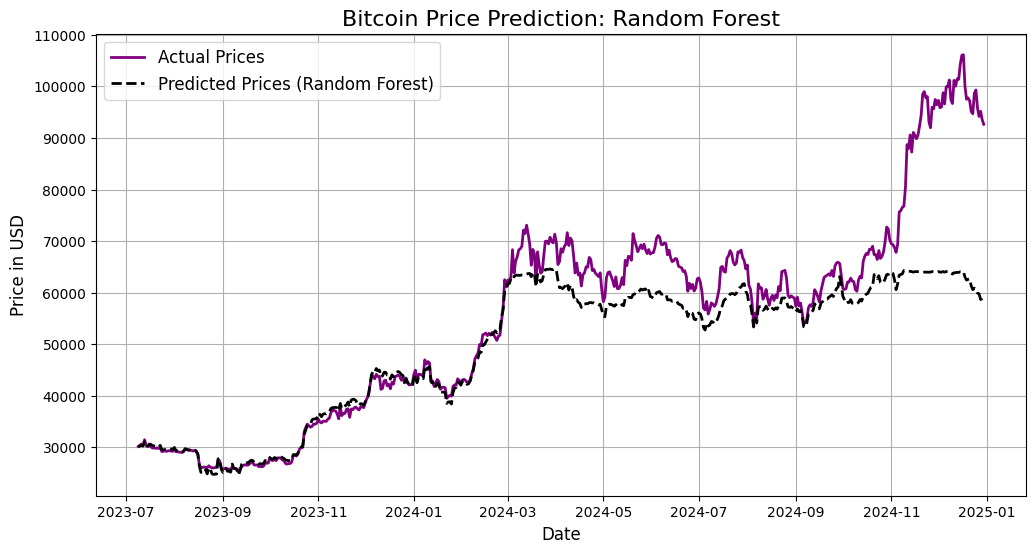

Metrics:
Random Forest - Mean Absolute Error (MAE): 5895.85
Random Forest - Mean Squared Error (MSE): 121365151.52
Random Forest - Root Mean Squared Error (RMSE): 11016.59
Random Forest - R-squared (R²): 0.70


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

# Split the data into training and testing sets
# Set test_size to 0.2 for 80% training and 20% testing, and ensure the data is not shuffled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
random_forest = RandomForestRegressor(bootstrap=True, max_depth=None, max_features='sqrt',
                                       min_samples_leaf=4, min_samples_split=2, n_estimators=100)

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # Root Mean Squared Error
r2_rf = r2_score(y_test, y_pred_rf)



# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_test.index, y_pred_rf, label='Predicted Prices (Random Forest)', color='black', linestyle='dashed', linewidth=2)

# Add labels, title, legend, and grid
plt.title('Bitcoin Price Prediction: Random Forest', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print metrics
print(f'Metrics:')
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Random Forest - R-squared (R²): {r2_rf:.2f}")



***Random search Results***

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


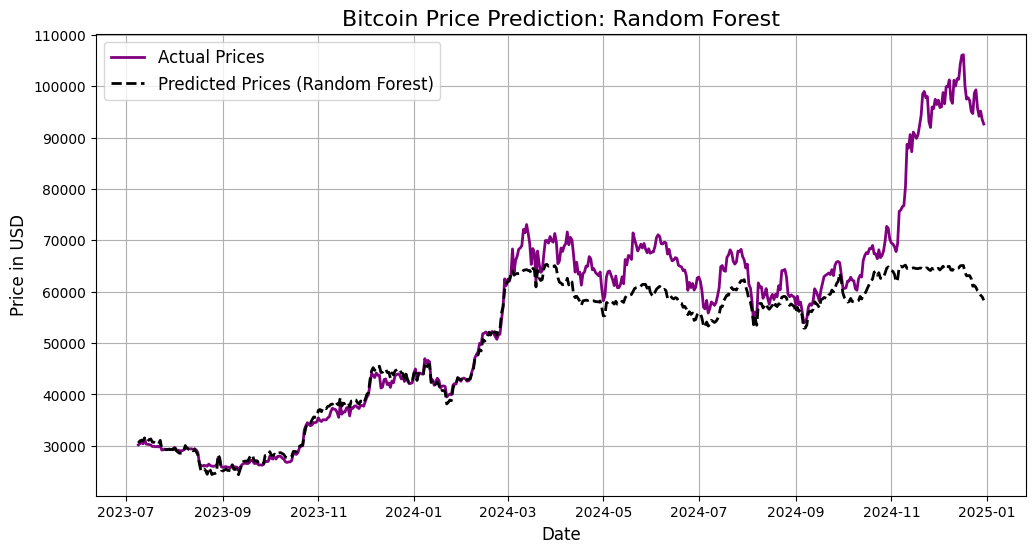

Metrics:
Random Forest - Mean Absolute Error (MAE): 5731.59
Random Forest - Mean Squared Error (MSE): 115887908.37
Random Forest - Root Mean Squared Error (RMSE): 10765.12
Random Forest - R-squared (R²): 0.71


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model with more trees
random_forest = RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=1,
                                      max_features='sqrt', max_depth=None, bootstrap=True)

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # Root Mean Squared Error
r2_rf = r2_score(y_test, y_pred_rf)



# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_test.index, y_pred_rf, label='Predicted Prices (Random Forest)', color='black', linestyle='dashed', linewidth=2)

# Add labels, title, legend, and grid
plt.title('Bitcoin Price Prediction: Random Forest', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print metrics
print(f'Metrics:')
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Random Forest - R-squared (R²): {r2_rf:.2f}")

***Hybrid Search Results***

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


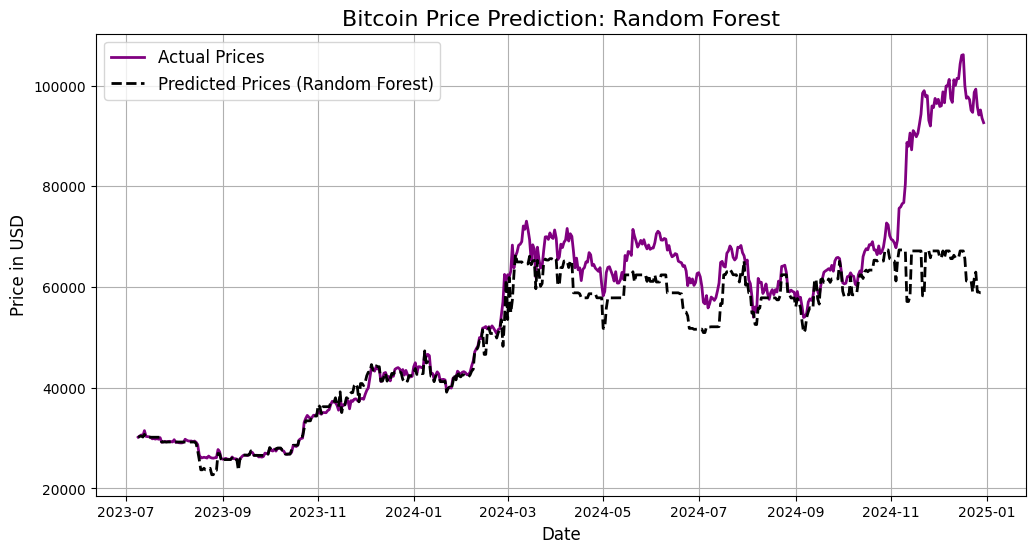

Metrics:
Random Forest - Mean Absolute Error (MAE): 5443.18
Random Forest - Mean Squared Error (MSE): 111307748.49
Random Forest - Root Mean Squared Error (RMSE): 10550.25
Random Forest - R-squared (R²): 0.72


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
random_forest = RandomForestRegressor(bootstrap=True, max_depth=None, max_features='sqrt', min_samples_leaf=1,
                                      min_samples_split=2, n_estimators=3)

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # Root Mean Squared Error
r2_rf = r2_score(y_test, y_pred_rf)


# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_test.index, y_pred_rf, label='Predicted Prices (Random Forest)', color='black', linestyle='dashed', linewidth=2)

# Add labels, title, legend, and grid
plt.title('Bitcoin Price Prediction: Random Forest', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print metrics
print(f'Metrics:')
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Random Forest - R-squared (R²): {r2_rf:.2f}")



***Define the Best Model***

In [ ]:
bestRFModel = RFHybridSModel #Insert Best Performing Model

***Evaluate with CV K-Fold the best Model***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Extract the best estimator from the RandomizedSearchCV or GridSearchCV
bestRFModel = grid_search.best_estimator_

# Set up K-Fold cross-validation
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # Shuffle for randomness

# Perform K-Fold Cross-Validation for RMSE
cv_scores_mse = cross_val_score(
    estimator=bestRFModel,  # Use the best RandomForest model
    X=X_train,  # Use the training data
    y=y_train,
    cv=kf,  # K-Fold object
    scoring='neg_mean_squared_error',  # Optimize for MSE
    n_jobs=-1  # Use all available cores
)

# Convert negative MSE scores to positive and calculate RMSE
mse_scores = -cv_scores_mse  # Negative MSE to positive
rmse_scores = np.sqrt(mse_scores)  # Root Mean Squared Error (RMSE)

# Perform K-Fold Cross-Validation for MAE
cv_scores_mae = cross_val_score(
    estimator=bestRFModel,  # Use the best RandomForest model
    X=X_train,  # Use the training data
    y=y_train,
    cv=kf,  # K-Fold object
    scoring='neg_mean_absolute_error',  # Optimize for MAE
    n_jobs=-1  # Use all available cores
)

# Convert negative MAE scores to positive
mae_scores = -cv_scores_mae  # Negative MAE to positive

# Print the results
print("RMSE Scores for each fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("MAE Scores for each fold:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))


RMSE Scores for each fold: [1570.1084636  1718.1685058   991.69963929  912.06506795 1528.26181938
 1465.54308307 1288.34303094 1276.80716953 1809.83793433 1066.86807733]
Mean RMSE: 1362.7702791222218
MAE Scores for each fold: [ 637.14333042  644.90275888  787.23125212  707.84039335  696.81120134
  760.17940497 1004.37493999  595.86976914  669.64254984  763.60590151]
Mean MAE: 726.7601501548903


***Evaluate with CV TimeSeriesSplit the best Model***

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=10)  # Choose the number of splits

# Extract the best RandomForest model from GridSearchCV or RandomizedSearchCV
bestRFModel = grid_search.best_estimator_

# Store RMSE and MAE scores for each fold
rmse_scores = []
mae_scores = []

# TimeSeriesSplit Cross-Validation
for train_index, test_index in tscv.split(X_train):  # Use X_train and y_train
    # Split the data using .iloc for pandas DataFrame
    X_train_split, X_test_split = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]  # Use .iloc for correct indexing

    # Fit the best model on the training split
    bestRFModel.fit(X_train_split, y_train_split)

    # Predict on the test split
    y_pred_split = bestRFModel.predict(X_test_split)

    # Calculate RMSE for the split
    rmse = np.sqrt(mean_squared_error(y_test_split, y_pred_split))
    rmse_scores.append(rmse)

    # Calculate MAE for the split
    mae = mean_absolute_error(y_test_split, y_pred_split)
    mae_scores.append(mae)

# Print the results
print("RMSE Scores for each fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("MAE Scores for each fold:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))


RMSE Scores for each fold: [2159.520882475857, 294.5262342077123, 1020.7616228610252, 701.0128514685214, 536.0668142262266, 29409.438122497828, 6161.318485564757, 5308.637808527432, 7344.783535088835, 3811.7084253907065]
Mean RMSE: 5674.777478230891
MAE Scores for each fold: [1672.670177358217, 220.98288418668008, 696.8460541773132, 436.11051519248605, 351.934980677269, 24816.786706499006, 4559.225464003793, 4281.626552947615, 6187.905662923652, 3178.2605043504445]
Mean MAE: 4640.234950231648


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

***Evaluate with CV Leave One Out the best Model***

In [ ]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor

# Initialize RandomForest model
rf_model = RandomForestRegressor(bootstrap=True, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=3)

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Perform LOOCV for RMSE
mse_scores = cross_val_score(
    estimator=rf_model,  # Use RandomForest model
    X=X_train,  # Input features
    y=y_train,  # Target variable
    cv=loo,     # Leave-One-Out Cross-Validation
    scoring='neg_mean_squared_error',  # Use negative MSE
    n_jobs=-1   # Utilize all available CPU cores
)

# Convert negative MSE to RMSE
mse_scores = -mse_scores  # Negative MSE to positive
rmse_scores = np.sqrt(mse_scores)  # RMSE for interpretability

# Perform LOOCV for MAE
mae_scores = cross_val_score(
    estimator=rf_model,  # Use RandomForest model
    X=X_train,  # Input features
    y=y_train,  # Target variable
    cv=loo,     # Leave-One-Out Cross-Validation
    scoring='neg_mean_absolute_error',  # Use negative MAE
    n_jobs=-1   # Utilize all available CPU cores
)

# Convert negative MAE to positive
mae_scores = -mae_scores  # Negative MAE to positive

# Mean RMSE and MAE across all folds
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)

# Print the results
print("RMSE Scores for each fold (LOOCV):", rmse_scores)
print("Mean RMSE (LOOCV):", mean_rmse)
print("MAE Scores for each fold (LOOCV):", mae_scores)
print("Mean MAE (LOOCV):", mean_mae)


RMSE Scores for each fold (LOOCV): [ 21.87312826 128.59008789  12.98673503 ... 704.31901042 246.22395833
  35.61523438]
Mean RMSE (LOOCV): 278.99766185359795
MAE Scores for each fold (LOOCV): [ 77.4699707  128.59008789  63.9066569  ... 203.4140625    8.59114583
 399.50390625]
Mean MAE (LOOCV): 271.67000592896807


# ***f)SVR Optimization***






***Grid Search - SVR***

In [ ]:
from sklearn.svm import SVR                    # Import SVR
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
import matplotlib.pyplot as plt                   # Import matplotlib for plotting

# Define the parameter grid for SVR
param_grid = {
    'C': [1, 20, 40, 80],              # Regularization parameter
    'epsilon': [0.01, 0.2, 0.4, 2],          # Epsilon in SVR
}

# Initialize the SVR model
svr = SVR()

# Initialize the GridSearchCV object with SVR
grid_search = GridSearchCV(
    estimator=svr,                      # Estimator: SVR
    param_grid=param_grid,              # Parameter grid to search
    cv=2,                                # 2-fold cross-validation
    scoring='neg_mean_squared_error',    # Metric to optimize (Negative Mean Squared Error)
    verbose=2                            # Verbosity level
)

# Fit the model on the training data (scaled features)
grid_search.fit(X_train, y_train)

# Extract and print the best parameters
SVRGridSModel = grid_search.best_params_

# Print the best hyperparameters found
print("Best Parameters from Grid Search for SVR:")
print(SVRGridSModel)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=1, epsilon=0.01; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=1, epsilon=0.01; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=1, epsilon=0.2; total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=1, epsilon=0.2; total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=1, epsilon=0.4; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=1, epsilon=0.4; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=1, epsilon=2; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=1, epsilon=2; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .................................C=20, epsilon=0.01; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .................................C=20, epsilon=0.01; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=20, epsilon=0.2; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=20, epsilon=0.2; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=20, epsilon=0.4; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=20, epsilon=0.4; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=20, epsilon=2; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=20, epsilon=2; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .................................C=40, epsilon=0.01; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .................................C=40, epsilon=0.01; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=40, epsilon=0.2; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=40, epsilon=0.2; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=40, epsilon=0.4; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=40, epsilon=0.4; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=40, epsilon=2; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=40, epsilon=2; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .................................C=80, epsilon=0.01; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .................................C=80, epsilon=0.01; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=80, epsilon=0.2; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=80, epsilon=0.2; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=80, epsilon=0.4; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=80, epsilon=0.4; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=80, epsilon=2; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=80, epsilon=2; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters from Grid Search for SVR:
{'C': 80, 'epsilon': 0.01}


random

In [ ]:
from sklearn.svm import SVR                    # Import SVR
from sklearn.model_selection import RandomizedSearchCV  # Import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
import matplotlib.pyplot as plt                   # Import matplotlib for plotting
import numpy as np  # For generating random distributions

# Define the parameter grid for SVR
param_grid = {
    'C': [1, 20, 40, 80],              # Regularization parameter
    'epsilon': [0.01, 0.2, 0.4, 2],          # Epsilon in SVR
}

# Initialize the SVR model
svr = SVR()

# Initialize the RandomizedSearchCV object with SVR
random_search = RandomizedSearchCV(
    estimator=svr,                          # Estimator: SVR
    param_distributions=param_grid,         # Parameter distribution to sample from
    n_iter=50,                              # Number of random combinations to try
    cv=2,                                   # 2-fold cross-validation
    scoring='neg_mean_squared_error',       # Metric to optimize (Negative Mean Squared Error)
    verbose=2,                              # Verbosity level
    random_state=42,                        # For reproducibility
    n_jobs=-1                                # Use all available cores
)

# Fit the model on the training data (scaled features)
random_search.fit(X_train, y_train)

# Extract and print the best parameters
SVRRandomSModel = random_search.best_params_

# Print the best hyperparameters found
print("Best Parameters from Random Search for SVR:")
print(SVRRandomSModel)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters from Random Search for SVR:
{'epsilon': 0.01, 'C': 80}


hybrid

In [ ]:
from sklearn.svm import SVR                    # Import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV  # Import RandomizedSearchCV, GridSearchCV
import numpy as np                             # For generating random distributions

# Step 1: Define the broad hyperparameter space for Random Search
param_grid = {
    'C': [1, 20, 40, 200],              # Regularization parameter
    'epsilon': [0.01, 0.2, 0.4, 2],          # Epsilon in SVR
}

# Initialize the SVR model
svr = SVR()

# Step 2: Perform Random Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_grid,
    n_iter=50,                                  # Number of random combinations to try
    scoring='neg_mean_squared_error',           # Metric to optimize
    cv=2,                                       # 2-fold cross-validation
    random_state=42,                            # Set a seed for reproducibility
    n_jobs=-1,                                  # Use all available cores for faster computation
    verbose=2                                   # Verbosity for tracking progress
)

# Fit the model on the training data (scaled features)
random_search.fit(X_train, y_train)

# Step 3: Get the best parameters from Random Search
best_random_params = random_search.best_params_
print("Best Parameters from Random Search:", best_random_params)

# Step 4: Refine the hyperparameter grid based on the results of Random Search
param_grid = {
    'C': [1, 20, 40, 80],              # Regularization parameter
    'epsilon': [0.01, 0.2, 0.4, 2],          # Epsilon in SVR
}

# Step 5: Perform Grid Search within the refined hyperparameter space
grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',        # Metric to optimize
    cv=2,                                    # 2-fold cross-validation
    n_jobs=-1,                               # Use all available cores for faster computation
    verbose=2                                 # Verbosity for tracking progress
)

# Fit the model with the refined grid
grid_search.fit(X_train, y_train)

# Step 6: Extract and print the best hyperparameters from the Hybrid Search
SVRHybridSModel = grid_search.best_params_

# Print the results
print("Best Hyperparameters (Hybrid Search):")
print(SVRHybridSModel)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters from Random Search: {'epsilon': 2, 'C': 200}
Fitting 2 folds for each of 16 candidates, totalling 32 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Hyperparameters (Hybrid Search):
{'C': 80, 'epsilon': 0.01}




---



***Grid results***

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


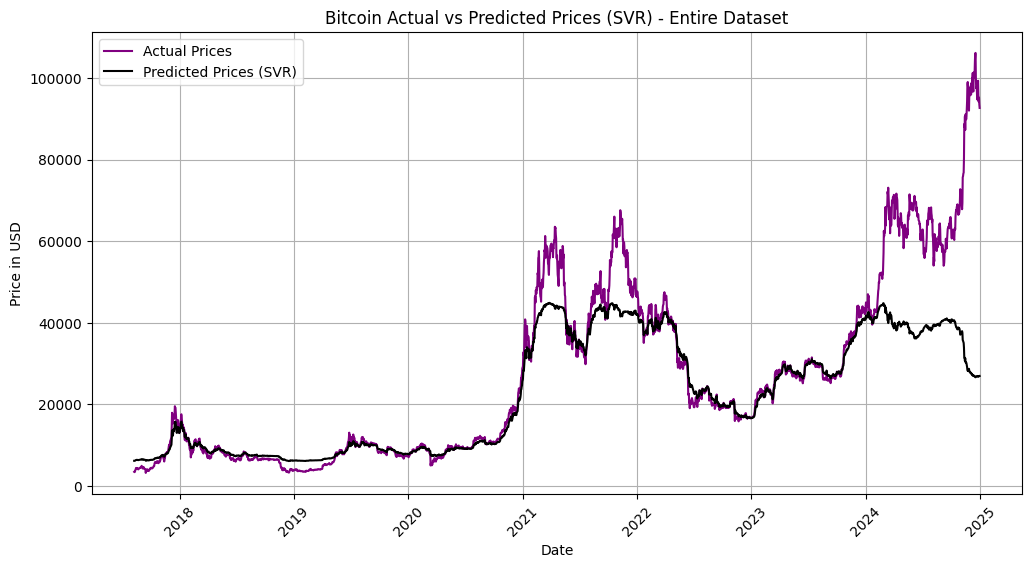

Mean Squared Error (MSE): 165242546.0176165
Mean Absolute Error (MAE): 5497.145013844966
R^2 Score: 0.6591221991180904
Mean Absolute Percentage Error (MAPE): 132.78232719962045
Root Mean Squared Error (RMSE): 12854.670202600162


In [ ]:
# Step 1: Import necessary libraries
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Step 2: Prepare the dataset (features and target)
X = btc_data[features].values  # Features
y = btc_data['Close'].values  # Target variable (Close price)

# Split the data into training and testing sets
# Set test_size to 0.2 for 80% training and 20% testing, and ensure the data is not shuffled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Initialize and train the SVR model
svr = SVR(kernel='rbf', C=80, epsilon=0.01)  # Radial Basis Function kernel
svr.fit(X_train, y_train)  # Train the model on the training dataset

# Step 5: Make predictions on the entire dataset
y_pred = svr.predict(X)  # Get predictions for the entire dataset

# Step 6: Plot actual vs predicted prices for the entire dataset
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, y, label='Actual Prices', color='purple')  # Plot actual prices
plt.plot(btc_data.index, y_pred, label='Predicted Prices (SVR)', color='black')  # Plot predicted prices
plt.title('Bitcoin Actual vs Predicted Prices (SVR) - Entire Dataset')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Step 7: Evaluate model performance
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)

# Calculate R^2 Score
r2 = r2_score(y, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error (RMSE):", rmse)


***Random search Results***

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


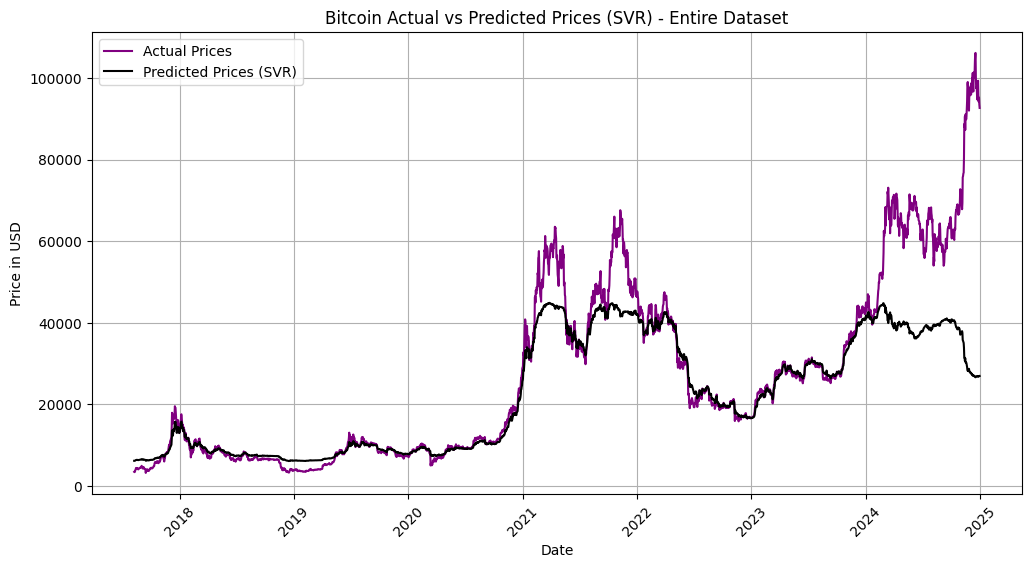

Mean Squared Error (MSE): 165242546.0176165
Mean Absolute Error (MAE): 5497.145013844966
R^2 Score: 0.6591221991180904
Mean Absolute Percentage Error (MAPE): 132.78232719962045
Root Mean Squared Error (RMSE): 12854.670202600162


In [ ]:
# Step 1: Import necessary libraries
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Step 2: Prepare the dataset (features and target)
X = btc_data[features].values  # Features
y = btc_data['Close'].values  # Target variable (Close price)

# Split the data into training and testing sets
# Set test_size to 0.2 for 80% training and 20% testing, and ensure the data is not shuffled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Initialize and train the SVR model
svr = SVR(kernel='rbf', C=80, epsilon=0.01)  # Radial Basis Function kernel
svr.fit(X_train, y_train)  # Train the model on the training dataset

# Step 5: Make predictions on the entire dataset
y_pred = svr.predict(X)  # Get predictions for the entire dataset

# Step 6: Plot actual vs predicted prices for the entire dataset
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, y, label='Actual Prices', color='purple')  # Plot actual prices
plt.plot(btc_data.index, y_pred, label='Predicted Prices (SVR)', color='black')  # Plot predicted prices
plt.title('Bitcoin Actual vs Predicted Prices (SVR) - Entire Dataset')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Step 7: Evaluate model performance
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)

# Calculate R^2 Score
r2 = r2_score(y, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error (RMSE):", rmse)


***Hybrid Search Results***

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


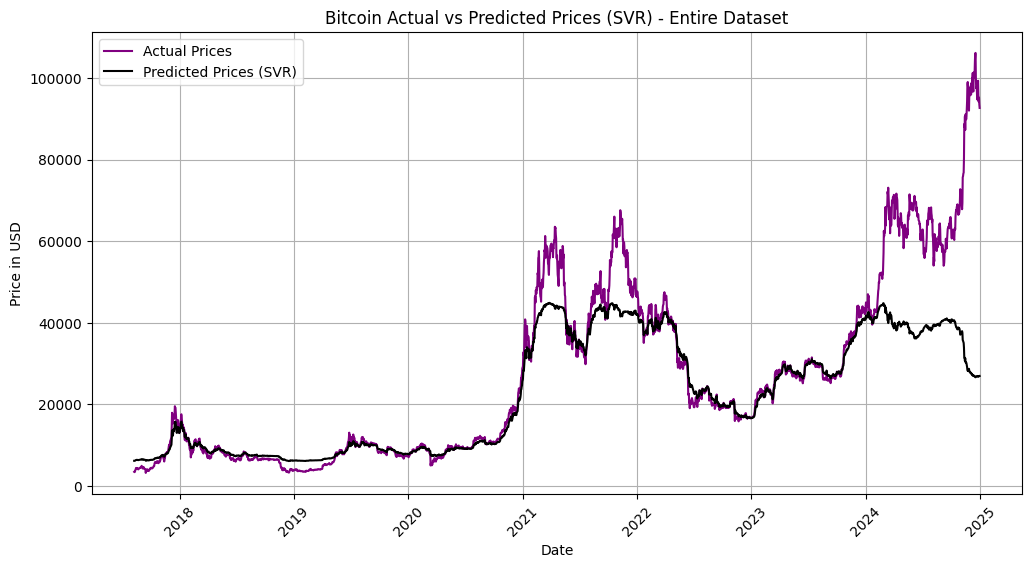

Mean Squared Error (MSE): 165242546.0176165
Mean Absolute Error (MAE): 5497.145013844966
R^2 Score: 0.6591221991180904
Mean Absolute Percentage Error (MAPE): 132.78232719962045
Root Mean Squared Error (RMSE): 12854.670202600162


In [ ]:
# Step 1: Import necessary libraries
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Step 2: Prepare the dataset (features and target)
X = btc_data[features].values  # Features
y = btc_data['Close'].values  # Target variable (Close price)

# Split the data into training and testing sets
# Set test_size to 0.2 for 80% training and 20% testing, and ensure the data is not shuffled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Initialize and train the SVR model
svr = SVR(kernel='rbf', C=80, epsilon=0.01)  # Radial Basis Function kernel
svr.fit(X_train, y_train)  # Train the model on the training dataset

# Step 5: Make predictions on the entire dataset
y_pred = svr.predict(X)  # Get predictions for the entire dataset

# Step 6: Plot actual vs predicted prices for the entire dataset
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, y, label='Actual Prices', color='purple')  # Plot actual prices
plt.plot(btc_data.index, y_pred, label='Predicted Prices (SVR)', color='black')  # Plot predicted prices
plt.title('Bitcoin Actual vs Predicted Prices (SVR) - Entire Dataset')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Step 7: Evaluate model performance
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)

# Calculate R^2 Score
r2 = r2_score(y, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error (RMSE):", rmse)


***Define the Best Model***

In [ ]:
bestSVRModel = SVRHybridSModel #Insert Best Performing Model

***Evaluate with CV K-Fold the best Model***

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming you have performed RandomizedSearchCV or GridSearchCV and obtained the best model
# Extract the best estimator from the RandomizedSearchCV (or GridSearchCV)
bestSVRModel = random_search.best_estimator_  # Replace with grid_search.best_estimator_ if using GridSearchCV

# Set up K-Fold cross-validation
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # Shuffle for randomness

# Perform K-Fold Cross-Validation
cv_scores = cross_val_score(
    estimator=bestSVRModel,  # Use the best SVR model
    X=X_train,  # Use the training data
    y=y_train,
    cv=kf,  # K-Fold object
    scoring='neg_mean_squared_error',  # Optimize for MSE (Negative MSE for cross_val_score)
    n_jobs=-1  # Use all available cores
)

# Convert negative MSE scores to positive and calculate RMSE
mse_scores = -cv_scores  # Negative MSE to positive
rmse_scores = np.sqrt(mse_scores)  # Root Mean Squared Error (RMSE)

# Calculate MAE
mae_scores = cross_val_score(
    estimator=bestSVRModel,  # Use the best SVR model
    X=X_train,  # Use the training data
    y=y_train,
    cv=kf,  # K-Fold object
    scoring='neg_mean_absolute_error',  # Optimize for MAE (Negative MAE for cross_val_score)
    n_jobs=-1  # Use all available cores
)

# Convert negative MAE scores to positive
mae_scores = -mae_scores  # Negative MAE to positive

# Print the RMSE and MAE for each fold and their mean values
print("RMSE Scores for each fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("MAE Scores for each fold:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))


RMSE Scores for each fold: [1789.66305165 2240.10633334 1694.34825466 2051.5200908  1916.80275325
 2291.74861618 2110.62308378 1509.54411893 1507.16103675 1941.46582903]
Mean RMSE: 1905.2983168375836
MAE Scores for each fold: [ 884.60167988 1076.79490882  772.88750861  935.14216361  873.7204239
 1112.3324234   978.94273055  735.72927627  743.89826561  898.23931368]
Mean MAE: 901.228869433516


***Evaluate with CV TimeSeriesSplit the best Model***

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=10)  # Choose the number of splits

# Store RMSE and MAE scores for each fold
rmse_scores = []
mae_scores = []

# TimeSeriesSplit Cross-Validation
for train_index, test_index in tscv.split(X_train):  # Use X_train and y_train
    # Split the data using integer indexing for NumPy arrays
    X_train_split, X_test_split = X_train[train_index], X_train[test_index]
    y_train_split, y_test_split = y_train[train_index], y_train[test_index]

    # Fit the best model on the training split
    bestSVRModel.fit(X_train_split, y_train_split)

    # Predict on the test split
    y_pred_split = bestSVRModel.predict(X_test_split)

    # Calculate RMSE for the split
    rmse = np.sqrt(mean_squared_error(y_test_split, y_pred_split))
    rmse_scores.append(rmse)

    # Calculate MAE for the split
    mae = mean_absolute_error(y_test_split, y_pred_split)
    mae_scores.append(mae)

# Print the results
print("RMSE Scores for each fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("MAE Scores for each fold:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

RMSE Scores for each fold: [686.7607722365269, 423.1632927295143, 241.20470839560122, 76.09994366317265, 95.80436413447448, 34604.504569842684, 11880.93456253081, 2156.15518601523, 1943.9654392802627, 380.88998361564353]
Mean RMSE: 5248.9482822443915
MAE Scores for each fold: [635.8008265425046, 350.3948687748734, 205.84468890561914, 44.70300738779424, 47.9429205756961, 29591.21489815239, 8810.989215995087, 1678.3660576667037, 1811.1551887632997, 303.5832766523362]
Mean MAE: 4347.9994949416305


***Evaluate with CV Leave One Out the best Model***

In [ ]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
import numpy as np
from sklearn.svm import SVR  # Import SVR

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Perform LOOCV and calculate RMSE
scores = cross_val_score(
    estimator=bestSVRModel,  # Use best SVR model
    X=X_train,  # Input features
    y=y_train,  # Target variable
    cv=loo,     # Leave-One-Out Cross-Validation
    scoring='neg_mean_squared_error',  # Use negative MSE to optimize
    n_jobs=-1   # Utilize all available CPU cores
)

# Convert negative MSE to RMSE
mse_scores = -scores  # Negative MSE to positive
rmse_scores = np.sqrt(mse_scores)  # RMSE for interpretability

# Mean RMSE across all folds
mean_rmse = np.mean(rmse_scores)

# Print RMSE for each fold and the mean RMSE
print("RMSE Scores for each fold (LOOCV):", rmse_scores)
print("Mean RMSE (LOOCV):", mean_rmse)


KeyboardInterrupt: 

# ***g)LSTM Optimization***

In [ ]:
!pip install tensorflow

***Evaluate LSTM Model with K-Fold CV***

In [240]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# List to store fold RMSE and MAE results in the original scale
rmse_scores = []
mae_scores = []

# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Fit the model for the current fold
    lstm.fit(X_train_fold, y_train_fold)

    # Predict on the validation set for the current fold
    y_pred = lstm.predict(X_val_fold)

    # Inverse transform the predictions and actual values to get them back to the original scale
    y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1))
    y_val_original = scaler.inverse_transform(y_val_fold.reshape(-1, 1))

    # Calculate Mean Squared Error (MSE) for the fold in original scale
    mse = mean_squared_error(y_val_original, y_pred_original)

    # Calculate RMSE for the fold in original scale
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Calculate MAE for the fold in original scale
    mae = mean_absolute_error(y_val_original, y_pred_original)
    mae_scores.append(mae)

    # Print RMSE and MAE for the current fold on the original scale
    print(f'Fold {fold + 1} RMSE (original scale): {rmse}')
    print(f'Fold {fold + 1} MAE (original scale): {mae}')

# Calculate the average RMSE across all folds in the original scale
average_rmse = np.mean(rmse_scores)
print(f'Average RMSE across all folds (original scale): {average_rmse}')

# Calculate the average MAE across all folds in the original scale
average_mae = np.mean(mae_scores)
print(f'Average MAE across all folds (original scale): {average_mae}')


KeyError: "None of [Index([ 448,  449,  450,  451,  452,  453,  454,  455,  456,  457,\n       ...\n       2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239],\n      dtype='int64', name='Ticker', length=1792)] are in the [columns]"

Average RMSE: 2100.4567
Average MAE: 1600.7890

***Evaluate LSTM Model with Time Series Split***

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define LSTM model function
def build_lstm_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Initialize TimeSeriesSplit for 2 folds
tscv = TimeSeriesSplit(n_splits=2)

# Loop through each fold and train the model
total_time = 0
total_rmse = 0  # To accumulate RMSE for all folds
total_mae = 0   # To accumulate MAE for all folds

for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Build and compile the LSTM model
    model = build_lstm_model(units=50, dropout_rate=0.2)

    # Time the training for each fold
    start_time = time.time()

    # Fit the model on the training data
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

    # Calculate time taken for this fold
    end_time = time.time()
    fold_time = end_time - start_time
    total_time += fold_time

    print(f"Time taken for fold {fold + 1}: {fold_time:.2f} seconds")

    # Make predictions on the validation set
    y_pred = model.predict(X_val)

    # Calculate RMSE for this fold
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    total_rmse += rmse
    print(f"RMSE for fold {fold + 1}: {rmse:.4f}")

    # Calculate MAE for this fold
    mae = mean_absolute_error(y_val, y_pred)
    total_mae += mae
    print(f"MAE for fold {fold + 1}: {mae:.4f}")

# Calculate average RMSE and MAE across all folds
avg_rmse = total_rmse / tscv.get_n_splits()
avg_mae = total_mae / tscv.get_n_splits()
print(f"Average RMSE for all folds: {avg_rmse:.4f}")
print(f"Average MAE for all folds: {avg_mae:.4f}")

# Total time for all folds
print(f"Total time for 2 folds: {total_time:.2f} seconds")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Time taken for fold 1: 24.28 seconds
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
RMSE for fold 1: 0.0252
MAE for fold 1: 0.0181


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Time taken for fold 2: 41.71 seconds
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
RMSE for fold 2: 0.0250
MAE for fold 2: 0.0158
Average RMSE for all folds: 0.0251
Average MAE for all folds: 0.0169
Total time for 2 folds: 65.99 seconds


In [ ]:
# Reverse the scaling to get predictions in original scale
y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_val_original = scaler.inverse_transform(y_val.reshape(-1, 1))

# Calculate RMSE on the original scale
rmse_original = np.sqrt(mean_squared_error(y_val_original, y_pred_original))
print(f"Average RMSE for Time Series Split: {rmse_original}")

# Calculate MAE on the original scale
mae_original = mean_absolute_error(y_val_original, y_pred_original)
print(f"Average MAE for Time Series Split: {mae_original}")


Average RMSE for Time Series Split: 2577.24068508215
Average MAE for Time Series Split: 1624.1922052556818


# ***8. General Analysis - Optimizations***

We will Make the following Analysises :


*   Tecnhical Analysis
*   Fundamental Analysis
*   Psychological Analysis

and then based on the score from each analysis we will make a final Weihted formula that will tell the models how much off they are or should be from the "Analysis Value Standpoint".

# ***a)Technical Analysis***

In [192]:
# Step 1: Fetch BTC Data (Daily)
btc_data = yf.download("BTC-USD", start="2017-05-01", end="2024-12-31", interval="1d")
#btc_data = yf.download("BTC-USD", start="2020-01-01", end="2025-01-01", interval="1d")
btc_data = btc_data.dropna()

btc_data_weekly = btc_data.resample('W').last()  # Using 'last' to take the last data point of the week

[*********************100%***********************]  1 of 1 completed


***RSI***

In [193]:
import pandas as pd
import numpy as np
import yfinance as yf


# Step 2: Define RSI Calculation Function
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / (avg_loss + 1e-10)
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Step 3: Calculate Daily RSI
btc_data['RSI'] = calculate_rsi(btc_data)

# Step 4: Define Buy/Sell Signals Based on RSI
def rsi_signal(rsi, low_threshold=30, high_threshold=70):
    if rsi < low_threshold:
        return "Buy"
    elif rsi > high_threshold:
        return "Sell"
    else:
        return "Hold"

# Apply the signal function to the RSI column
btc_data['Signal'] = btc_data['RSI'].apply(lambda x: rsi_signal(x))

# Step 5: Count Only Buy and Sell Signals (Excluding Hold)
rsi_buy_count = btc_data[btc_data['Signal'] == 'Buy'].shape[0]
rsi_sell_count = btc_data[btc_data['Signal'] == 'Sell'].shape[0]

# Step 6: Print the Results
print('')
print(f"Buy signals: {rsi_buy_count}")
print(f"Sell signals: {rsi_sell_count}")



Buy signals: 311
Sell signals: 550


***ROC***

In [194]:
import pandas as pd
import numpy as np
import yfinance as yf


# Step 2: Calculate Rate of Change (ROC) for the 'Close' column
def calculate_roc(data, column, period=14):
    # ROC = (Current Price - Price N periods ago) / Price N periods ago * 100
    roc = (data[column] - data[column].shift(period)) / data[column].shift(period) * 100
    return roc

# Step 3: Calculate ROC for the 'Close' column
btc_data['ROC_Close'] = calculate_roc(btc_data, 'Close')

# Step 4: Generate Buy/Sell signals based on ROC values
def roc_signal(roc_value):
    if roc_value > 0:
        return "Buy"
    elif roc_value < 0:
        return "Sell"
    else:
        return "Hold"

# Step 5: Apply the signal function to each row
btc_data['Signal'] = btc_data['ROC_Close'].apply(roc_signal)


# Step 7: Count Buy and Sell signals
roc_buy_count = btc_data[btc_data['Signal'] == 'Buy'].shape[0]
roc_sell_count = btc_data[btc_data['Signal'] == 'Sell'].shape[0]


print(f"\nBuy signals: {roc_buy_count}")
print(f"Sell signals: {roc_sell_count}")

# Optional: Save the results to a CSV file
btc_data.to_csv('btc_data_with_roc_signals_counts.csv')



Buy signals: 1544
Sell signals: 1243


***Williams%***

In [195]:
import pandas as pd
import numpy as np
import yfinance as yf


# Step 2: Calculate Williams %R
def calculate_williams(data, period=14):
    # Highest high and lowest low over the period
    highest_high = data['High'].rolling(window=period).max()
    lowest_low = data['Low'].rolling(window=period).min()

    # Williams %R = (Highest High - Close) / (Highest High - Lowest Low) * -100
    williams_r = ((highest_high - data['Close']) / (highest_high - lowest_low)) * -100
    return williams_r

# Step 3: Calculate Williams %R for the 'Close' column
btc_data['Williams_R'] = calculate_williams(btc_data)

# Step 4: Generate Buy/Sell signals based on Williams %R
def williams_signal(williams_r_value):
    if williams_r_value < -80:
        return "Buy"
    elif williams_r_value > -20:
        return "Sell"
    else:
        return "Hold"

# Step 5: Apply the signal function to each row
btc_data['Signal'] = btc_data['Williams_R'].apply(williams_signal)


# Step 7: Count Buy and Sell signals
w_buy_count = btc_data[btc_data['Signal'] == 'Buy'].shape[0]
w_sell_count = btc_data[btc_data['Signal'] == 'Sell'].shape[0]

print(f"\nBuy signals: {w_buy_count}")
print(f"Sell signals: {w_sell_count}")

# Optional: Save the results to a CSV file
btc_data.to_csv('btc_data_with_williams_signals_counts.csv')



Buy signals: 487
Sell signals: 807


***EMA(100)***

In [196]:
import pandas as pd
import numpy as np
import yfinance as yf



# Step 2: Calculate EMA(100)
def calculate_ema(data, period=100):
    # Calculate the Exponential Moving Average
    ema = data['Close'].ewm(span=period, adjust=False).mean()
    return ema

# Step 3: Calculate EMA(100)
btc_data['EMA100'] = calculate_ema(btc_data)

# Step 5: Generate Buy/Sell signals based on EMA(100)
def ema_signal(close_price, ema_value):
    if close_price > ema_value:
        return "Buy"
    elif close_price < ema_value:
        return "Sell"
    else:
        return "Hold"

# Step 6: Apply the signal function to each row
# Correctly access 'Close' and 'EMA100' using the multi-indexed DataFrame
btc_data['Signal'] = [ema_signal(row[('Close', 'BTC-USD')], row[('EMA100', '')]) for _, row in btc_data.iterrows()]

# Step 7: Drop NaN values (due to EMA calculation)
btc_data = btc_data.dropna(subset=[('EMA100', '')])

# Step 8: Count Buy and Sell signals
ema_buy_count = btc_data[btc_data['Signal'] == 'Buy'].shape[0]
ema_sell_count = btc_data[btc_data['Signal'] == 'Sell'].shape[0]

print(f"\nBuy signals: {ema_buy_count}")
print(f"Sell signals: {ema_sell_count}")

# Optional: Save the results to a CSV file
btc_data.to_csv('btc_data_with_ema100_signals_counts.csv')



Buy signals: 1633
Sell signals: 1167


***Make a TA Final Assumption***

In [197]:
total_buys = rsi_buy_count + roc_buy_count + w_buy_count + ema_buy_count
total_sells = rsi_sell_count + roc_sell_count + w_sell_count + ema_sell_count

print(f"Total Buy signals: {total_buys}")
print(f"Total Sell signals: {total_sells}")

# Weights for each indicator
w_rsi = 0.1
w_roc = 0.25
w_williams = 0.15
w_ema100 = 0.5

# Calculate Weighted Buy and Sell signals
weighted_buy_signals = (w_rsi * rsi_buy_count) + (w_roc * roc_buy_count) + (w_williams * w_buy_count) + (w_ema100 * ema_buy_count)
weighted_sell_signals = (w_rsi * rsi_sell_count) + (w_roc * roc_sell_count) + (w_williams * w_sell_count) + (w_ema100 * ema_sell_count)

# Calculate the total weighted signals (buy + sell) for normalization
total_weighted_signals = weighted_buy_signals + weighted_sell_signals

# Calculate Weighted Percentage Buy and Sell signals independently
weighted_percentage_buy_signals = (weighted_buy_signals / total_weighted_signals) * 100
weighted_percentage_sell_signals = (weighted_sell_signals / total_weighted_signals) * 100

# Print the weighted totals
print("")
print(f"Weighted Buy signals: {weighted_buy_signals}")
print(f"Weighted Sell signals: {weighted_sell_signals}")
print("")
print(f"Weighted Percentage Buy signals: +{weighted_percentage_buy_signals}%")
print(f"Weighted Percentage Sell signals: -{weighted_percentage_sell_signals}%")
print("")

ta_value =(weighted_percentage_buy_signals - 50)*2
if weighted_percentage_buy_signals > weighted_percentage_sell_signals:
    print(f"Meaning +{abs(ta_value)}% increase in our regression Model's Price Prediction")
else:
    print(f"Meaning -{abs(ta_value)}% decrease in our regression Model's Price Prediction")
print(ta_value)

Total Buy signals: 3975
Total Sell signals: 3767

Weighted Buy signals: 1306.65
Weighted Sell signals: 1070.3

Weighted Percentage Buy signals: +54.971707440207%
Weighted Percentage Sell signals: -45.028292559793016%

Meaning +9.943414880413997% increase in our regression Model's Price Prediction
9.943414880413997


# ***b)Fundamental Analysis***

***Halvings Score***

In [198]:
from datetime import datetime, timedelta

def halving_score(halving_date, current_date):
    time_difference = (current_date - halving_date).days

    if 0 <= time_difference <= 365:  # 1 year
        return 1
    elif 365 < time_difference < 730:  # Between 1 and 2 years

        return -1
    else:  # Negative time difference (halving in the future)
        return 0

# Example Usage:
halving_date = datetime(2024, 4, 19)  # Corrected halving date (Year, Month, Day)
current_date = datetime.now()  # Replace with the desired current/reference date

h_value = halving_score(halving_date, current_date)
print(f"The halving score is: {h_value}")


The halving score is: 1


***Interest Rates***

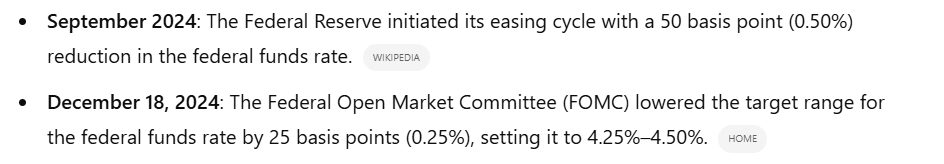

In [199]:
ir_value = (0.25 + 0.5)*3  # Big Inflation??
print(f"Value: {ir_value}")

Value: 2.25


***Inflation***

December 2024, the United States reported an annual inflation rate of 2.9%,

In [200]:
inflation=2.9
i_value = 1 if inflation > 2.5 else 0
print(f"Value: {i_value}")

Value: 1


***Adoption of Bitcoin by Institutions***

Blackrock, Fidelity, Grayscale, Microstrategy.
Pension Funds and Institutional Investments
Approval of Bitcoin ETFs
Performance of Crypto Hedge Funds

In [201]:
a_value = 2
print(f"Value: {a_value}")

Value: 2


***M2SL***

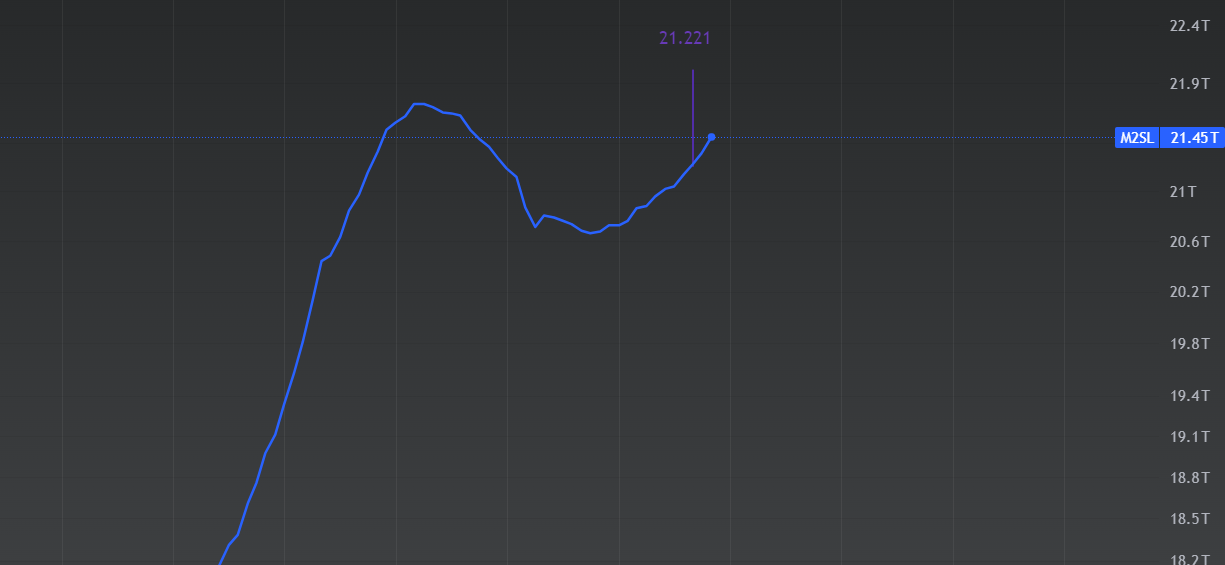

In [202]:
#Incredible Bounce and increase for M2SL

m_value = 1
print(f"Value: {m_value}")

Value: 1


***Global Liquidity***

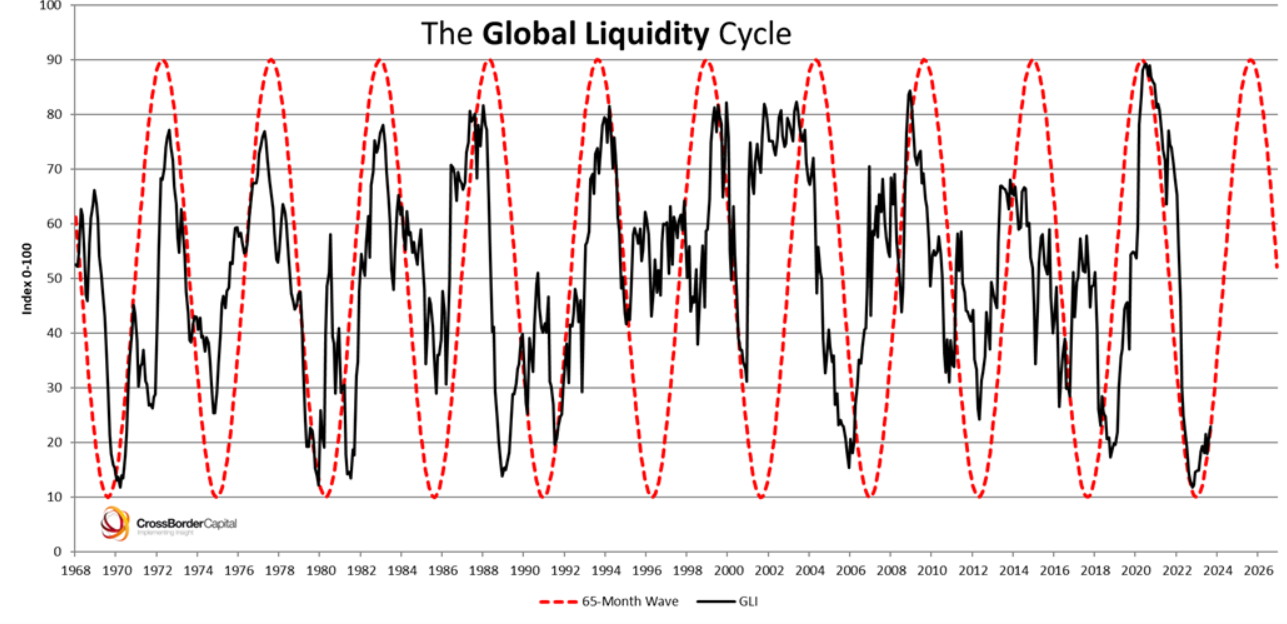

In [203]:
#Expected increase for Global Liquidity for the next 1-2 years

g_value = 1
print(f"Value: {g_value}")

Value: 1


***Make a FA Final Assumption***

In [204]:
fa_value=(h_value+ir_value+i_value+a_value+m_value+g_value)*2
print(f"Fundamental Indication: {fa_value}")

#increase-decrease in model = score*3%
if fa_value>0:
    print(f"Meaning a {fa_value}% Increase in Models's Price Prediction")
else:
    print(f"Meaning a {fa_value}% Decrease in Models's Price Prediction")

print(fa_value)

Fundamental Indication: 16.5
Meaning a 16.5% Increase in Models's Price Prediction
16.5


# ***c)Psychological Analysis***

***Fear & Greed Index***

In [205]:
import requests
import json

def get_fear_and_greed_index():
    url = "https://api.alternative.me/fng/?limit=1"  # Fear and Greed Index API
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()

        # Extract the relevant information from the response
        fear_and_greed_value = int(data['data'][0]['value']) # Convert to int here
        fear_and_greed_value_classification = data['data'][0]['value_classification']
        timestamp = data['data'][0]['timestamp']
        fg_value=0

        if fear_and_greed_value >=85:
          fg_value=-1
        elif fear_and_greed_value <=25:
          fg_value=1
        else:
          fg_value=0

        print(f"Fear and Greed Index: {fear_and_greed_value}")
        print(f"Classification: {fear_and_greed_value_classification}")
        print(f"Timestamp: {timestamp}")
        print(f"Value: {fg_value}")

        return fear_and_greed_value, fear_and_greed_value_classification, timestamp, fg_value
    else:
        print("Failed to retrieve Fear and Greed Index data.")
        return None



fg_value=get_fear_and_greed_index()


Fear and Greed Index: 75
Classification: Greed
Timestamp: 1736985600
Value: 0


***News***

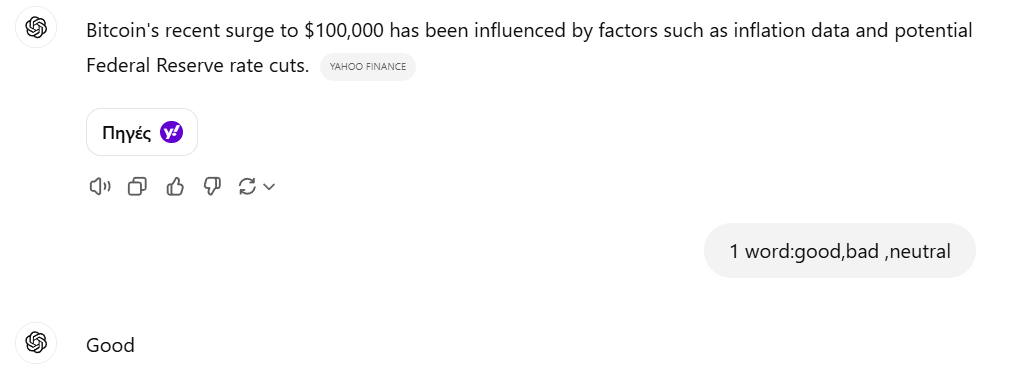

In [206]:
news_value=1
print(f"Value: {news_value}")

Value: 1


***Geoplitical Events***

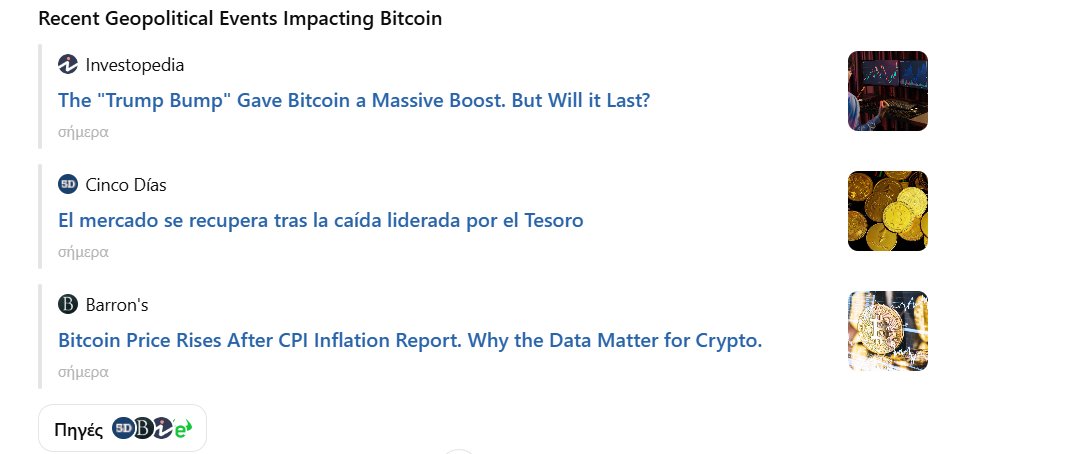

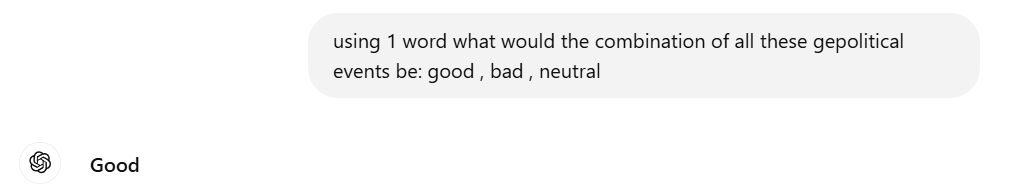

In [207]:
ge_value=1
print(f"Value: {ge_value}")

Value: 1


***Make a PA Final Assumption***

In [208]:
pa_value=fg_value[3]+news_value+ge_value
print(f"Pshycological Indication: {pa_value}/3")

#increase-decrease in model = score*3%
if pa_value>0:
    print(f"Meaning a {pa_value*3}% Increase in Models's Price Prediction")
else:
    print(f"Meaning a {pa_value*3}% Decrease in Models's Price Prediction")

pa_value=pa_value*3
print(pa_value)

Pshycological Indication: 2/3
Meaning a 6% Increase in Models's Price Prediction
6


# ***Final Analysis***

Final Analysis is Weighted Mean Price of all Previous: TA,FA,PA

In [209]:
# Define the values
ta_weight = 0.2  # Replace with your actual ta_value
fa_weight = 0.6   # Replace with your actual fa_value
pa_weight = 0.2  # Replace with your actual pa_value

# Calculate the weighted average
Total_Value = (ta_value * ta_weight + fa_value * fa_weight + pa_value * pa_weight)*2

# Print the result
print(f"Total Value: {Total_Value}")
print(f"Therefore {Total_Value} increase or decrease in your model. ")


Total Value: 26.1773659521656
Therefore 26.1773659521656 increase or decrease in your model. 




---


# ***9. Models Evaluations***

---



***METRICS SCORES:***


---
**Linear Regression Metrics**  
- MAE: 1547.30  
- MSE: 5211177.78  
- RMSE: 2282.80  
- R²: 0.9893  
- MAPE: 5.39%



**Optimizations**

**L1**  
- MAE: 2439.59  
- MSE: 10483645.77  
- RMSE: 3237.85  
- R²: 0.98  
- MAPE: 8.18%

**L2**  
- MAE: 1547.30  
- MSE: 5211177.78  
- RMSE: 2282.80  
- R²: 0.9893  
- MAPE: 5.39%
---

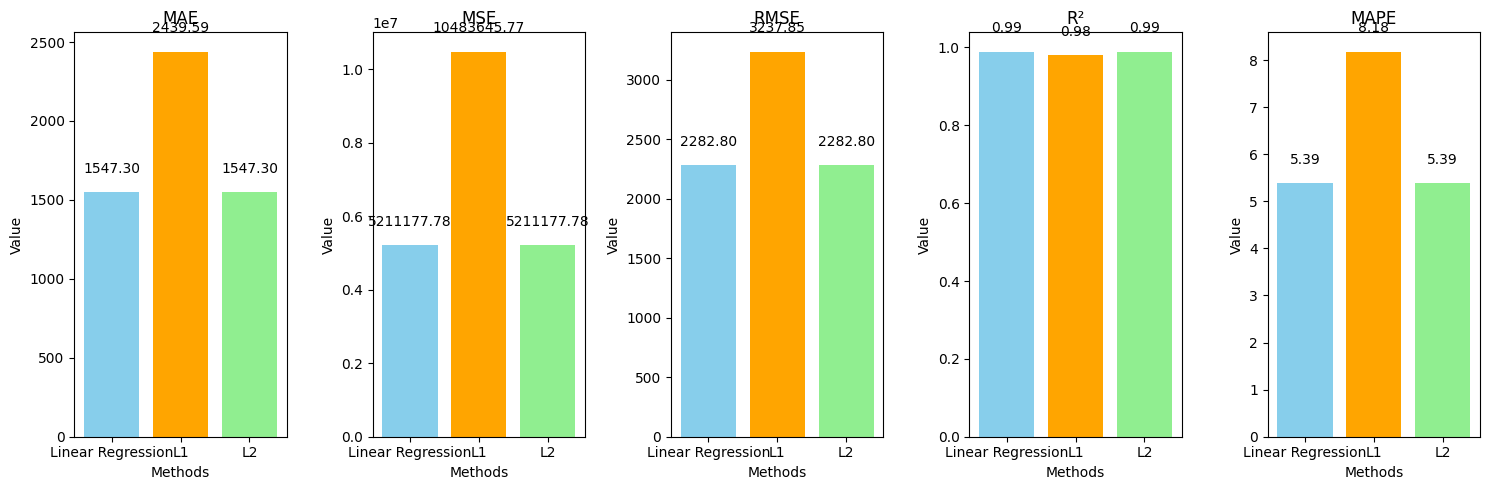

In [245]:
import matplotlib.pyplot as plt

# Data
metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE']
linear_regression = [1547.30, 5211177.78, 2282.80, 0.9893, 5.39]
l1 = [2439.59, 10483645.77, 3237.85, 0.98, 8.18]
l2 = [1547.30, 5211177.78, 2282.80, 0.9893, 5.39]

methods = ['Linear Regression', 'L1', 'L2']
data = [linear_regression, l1, l2]

# Create subplots
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5), sharey=False)

# Plot each metric
for i, metric in enumerate(metrics):
    values = [linear_regression[i], l1[i], l2[i]]
    axes[i].bar(methods, values, color=['skyblue', 'orange', 'lightgreen'])
    axes[i].set_title(metric)
    axes[i].set_xlabel('Methods')
    axes[i].set_ylabel('Value')
    for j, val in enumerate(values):
        axes[i].text(j, val + 0.05 * max(values), f'{val:.2f}', ha='center')

# Adjust layout
plt.tight_layout()
plt.show()




**Logarithmic Fit**  
- MAE: 14678.37  
- MSE: 305724930.00  
- RMSE: 17484.99  
- R²: 0.3693  
- MAPE: 111.78%



**Optimizations**

**L1**  
- MAE: 25878.60  
- MSE: 1027535051.02  
- RMSE: 32055.19  
- R²: -1.5451  
- MAPE: 39.85%

**L2**  
- MAE: 25882.12  
- MSE: 1027773807.17  
- RMSE: 32058.91  
- R²: -1.5457  
- MAPE: 39.86%
---

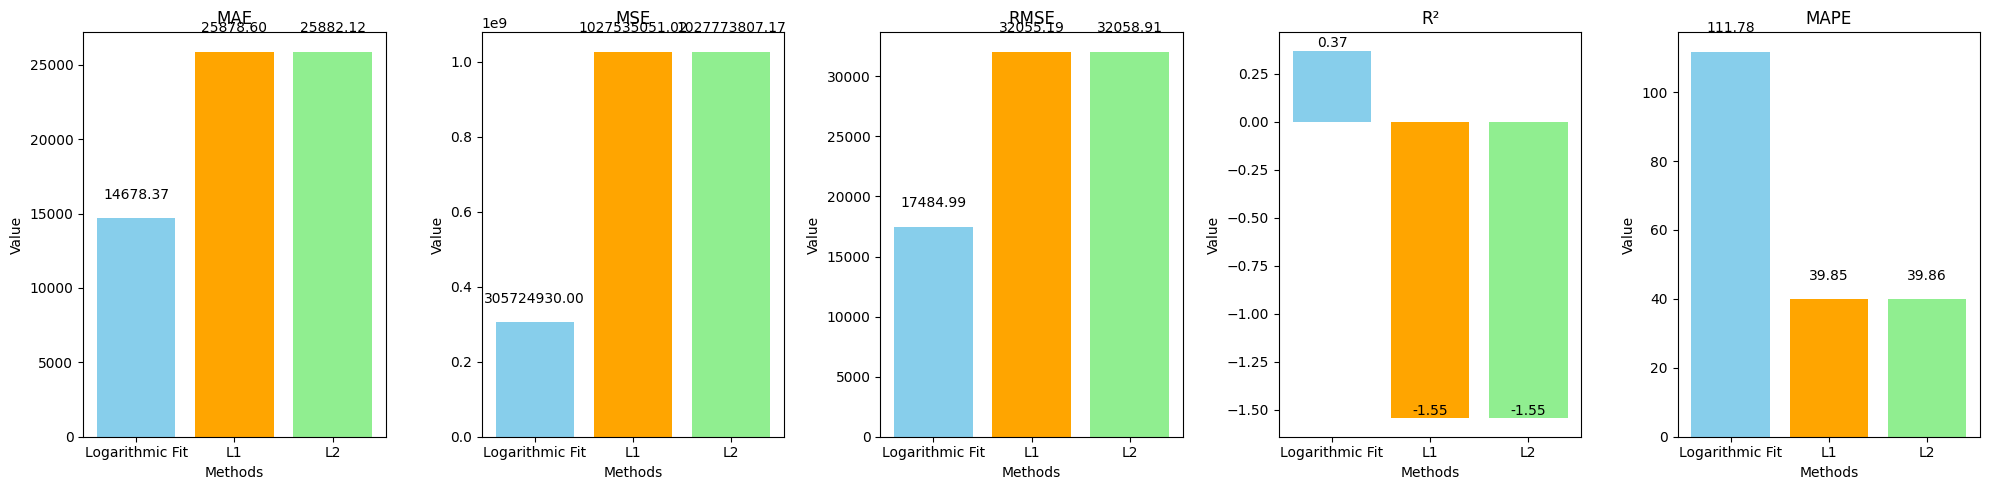

In [246]:
import matplotlib.pyplot as plt

# Data for Logarithmic Fit and Optimizations
metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE']
logarithmic_fit = [14678.37, 305724930.00, 17484.99, 0.3693, 111.78]
l1 = [25878.60, 1027535051.02, 32055.19, -1.5451, 39.85]
l2 = [25882.12, 1027773807.17, 32058.91, -1.5457, 39.86]

methods = ['Logarithmic Fit', 'L1', 'L2']
data = [logarithmic_fit, l1, l2]

# Create subplots for each metric
fig, axes = plt.subplots(1, len(metrics), figsize=(20, 5), sharey=False)

# Plot each metric
for i, metric in enumerate(metrics):
    values = [logarithmic_fit[i], l1[i], l2[i]]
    axes[i].bar(methods, values, color=['skyblue', 'orange', 'lightgreen'])
    axes[i].set_title(metric)
    axes[i].set_xlabel('Methods')
    axes[i].set_ylabel('Value')
    for j, val in enumerate(values):
        axes[i].text(j, val + 0.05 * max(values), f'{val:.2f}', ha='center')

# Adjust layout
plt.tight_layout()
plt.show()



**Exponential Fit**  
- MAE: 10277.12  
- MSE: 180883289.23  
- RMSE: 13449.29  
- R²: 0.6269  
- MAPE: 52.70%



**Optimizations**

**L1**  
- MAE: 11680.34  
- MSE: 218402696.58  
- RMSE: 14778.45  
- R²: 0.4590  
- MAPE: 36.60%

**L2**  
- MAE: 11603.37  
- MSE: 175264616.07  
- RMSE: 13238.75  
- R²: 0.5731  
- MAPE: 46.76%

---

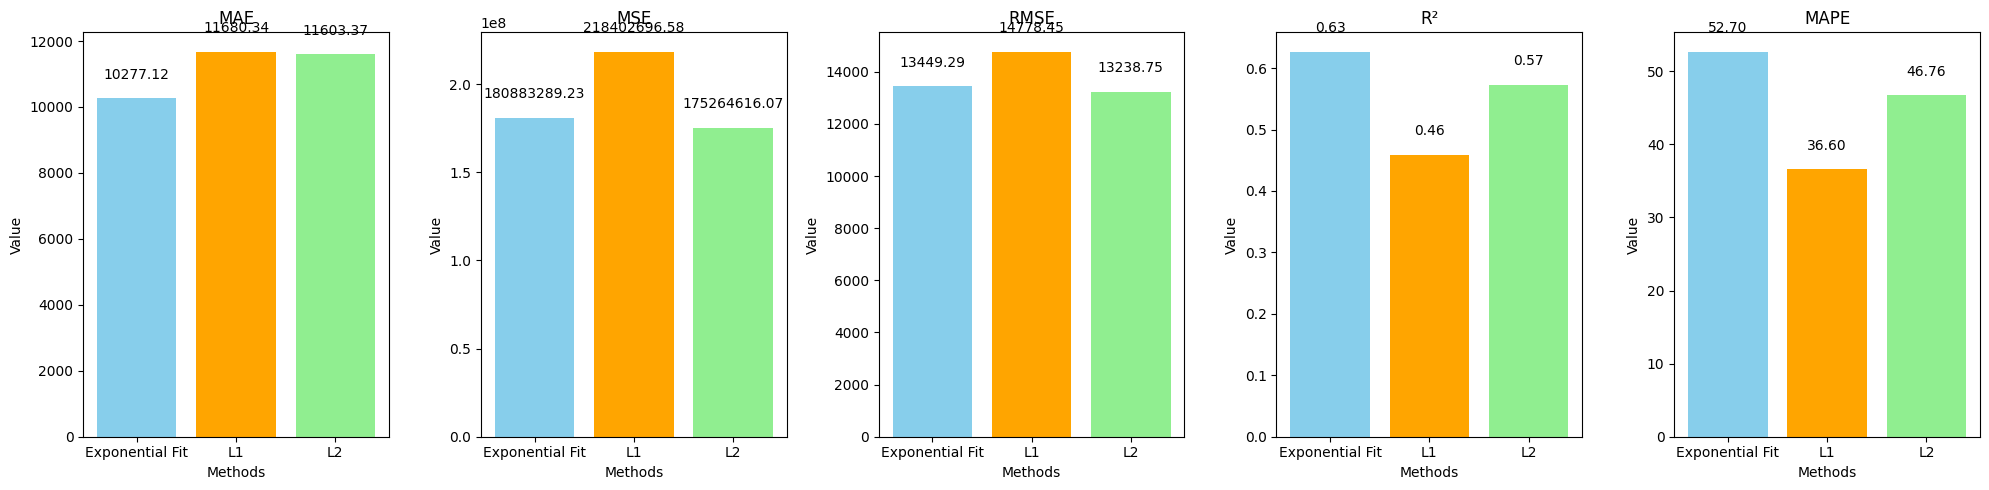

In [247]:
# Data for Exponential Fit and Optimizations
metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE']
exponential_fit = [10277.12, 180883289.23, 13449.29, 0.6269, 52.70]
l1 = [11680.34, 218402696.58, 14778.45, 0.4590, 36.60]
l2 = [11603.37, 175264616.07, 13238.75, 0.5731, 46.76]

methods = ['Exponential Fit', 'L1', 'L2']
data = [exponential_fit, l1, l2]

# Create subplots for each metric
fig, axes = plt.subplots(1, len(metrics), figsize=(20, 5), sharey=False)

# Plot each metric
for i, metric in enumerate(metrics):
    values = [exponential_fit[i], l1[i], l2[i]]
    axes[i].bar(methods, values, color=['skyblue', 'orange', 'lightgreen'])
    axes[i].set_title(metric)
    axes[i].set_xlabel('Methods')
    axes[i].set_ylabel('Value')
    for j, val in enumerate(values):
        axes[i].text(j, val + 0.05 * max(values), f'{val:.2f}', ha='center')

# Adjust layout
plt.tight_layout()
plt.show()



**kNN Model Evaluation**  
- MAE: 5883.01  
- MSE: 114373956.93  
- R²: 0.72



**Optimizations**

**Grid**  
- MAE: 8636.02  
- MSE: 176916185.88  
- RMSE: 13300.98  
- R²: 0.56  
- MAPE: 12.87%

**Random**  
- MAE: 8683.21  
- MSE: 178309329.40  
- RMSE: 13353.25  
- R²: 0.56  
- MAPE: 12.94%

**Hybrid**  
- MAE: 5878.29  
- MSE: 112949253.89  
- RMSE: 10627.76  
- R²: 0.72  
- MAPE: 8.53%



**KFold Evaluation**  
- Mean RMSE: 516.91  
- Mean MAE: 295.57



**TSS Evaluation**  
- Mean RMSE: 5727.63  
- Mean MAE: 4779.73



**LOOCV Evaluation**  
- Mean RMSE: 549.47  
- Mean MAE: 549.47

---

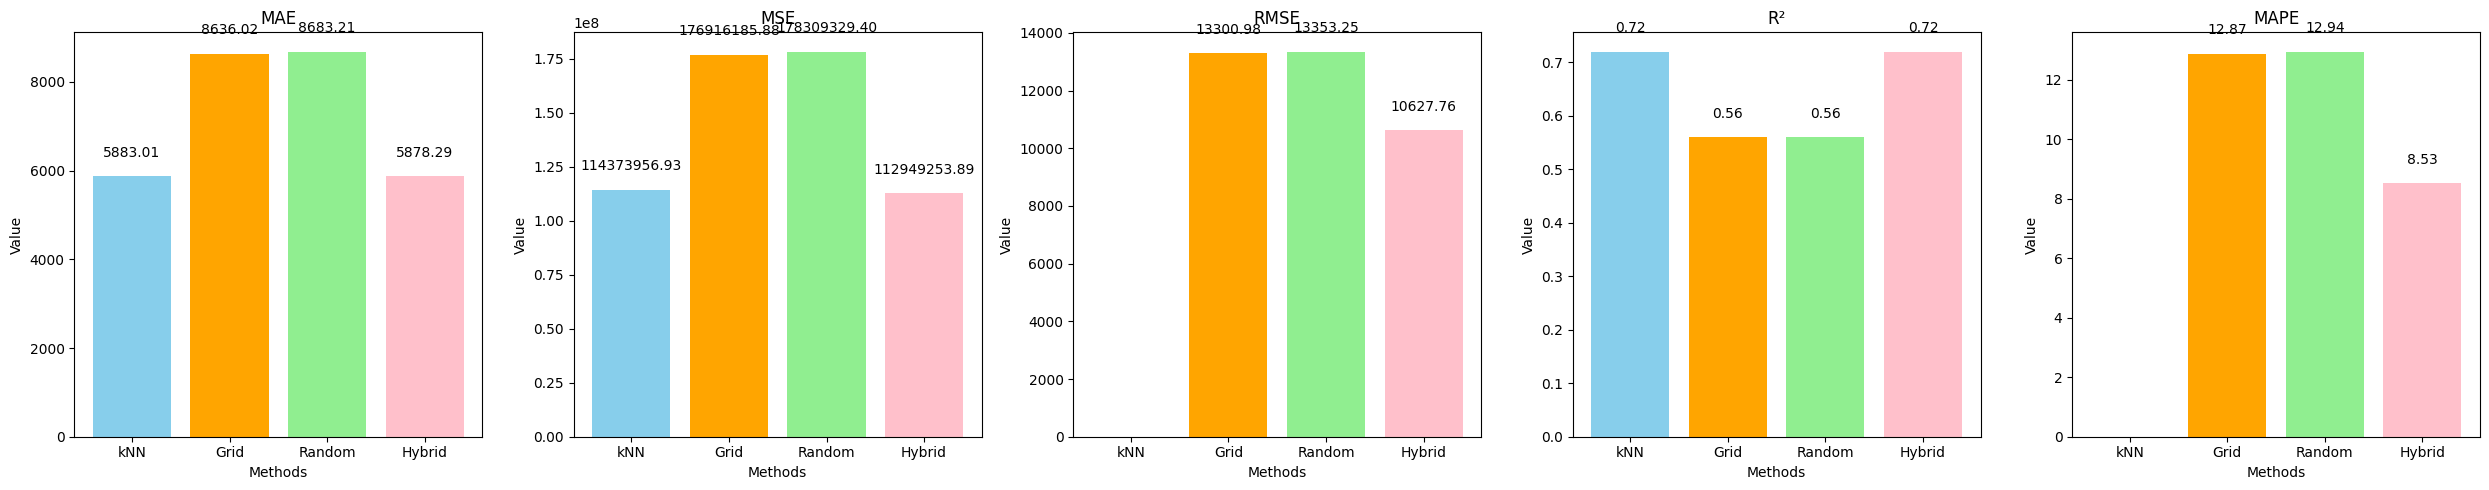

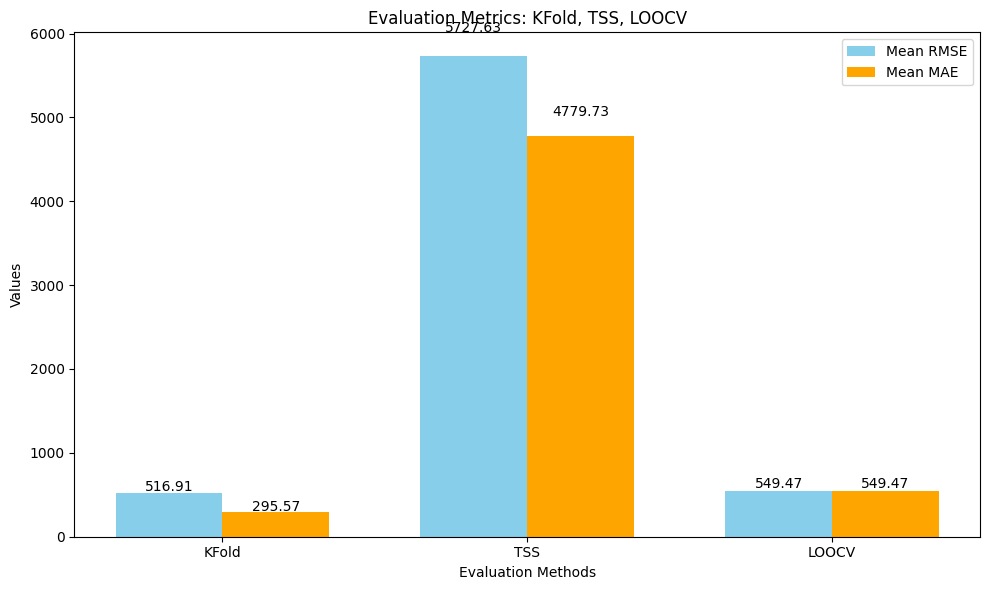

In [248]:
# Data for kNN Model Evaluation and Optimizations
metrics_knn = ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE']
knn_model = [5883.01, 114373956.93, None, 0.72, None]
grid = [8636.02, 176916185.88, 13300.98, 0.56, 12.87]
random = [8683.21, 178309329.40, 13353.25, 0.56, 12.94]
hybrid = [5878.29, 112949253.89, 10627.76, 0.72, 8.53]

methods_knn = ['kNN', 'Grid', 'Random', 'Hybrid']
data_knn = [knn_model, grid, random, hybrid]

# KFold, TSS, and LOOCV Evaluations
additional_metrics = {
    'KFold': {'Mean RMSE': 516.91, 'Mean MAE': 295.57},
    'TSS': {'Mean RMSE': 5727.63, 'Mean MAE': 4779.73},
    'LOOCV': {'Mean RMSE': 549.47, 'Mean MAE': 549.47},
}

# Create subplots for kNN-related metrics
fig, axes = plt.subplots(1, len(metrics_knn), figsize=(25, 5), sharey=False)

# Plot each metric for kNN Model Evaluation
for i, metric in enumerate(metrics_knn):
    if any(x is not None for x in [knn_model[i], grid[i], random[i], hybrid[i]]):  # Skip metrics with no data
        values = [knn_model[i], grid[i], random[i], hybrid[i]]
        values = [v if v is not None else 0 for v in values]  # Replace None with 0 for plotting
        axes[i].bar(methods_knn, values, color=['skyblue', 'orange', 'lightgreen', 'pink'])
        axes[i].set_title(metric)
        axes[i].set_xlabel('Methods')
        axes[i].set_ylabel('Value')
        for j, val in enumerate(values):
            axes[i].text(j, val + 0.05 * max(values), f'{val:.2f}' if val != 0 else '', ha='center')

plt.tight_layout()
plt.show()

# Plot additional evaluations (KFold, TSS, LOOCV)
fig, ax = plt.subplots(figsize=(10, 6))
methods_additional = list(additional_metrics.keys())
rmse_values = [additional_metrics[m]['Mean RMSE'] for m in methods_additional]
mae_values = [additional_metrics[m]['Mean MAE'] for m in methods_additional]

bar_width = 0.35  # Width of the bars
x = np.arange(len(methods_additional))

# Plot RMSE and MAE side-by-side
bars_rmse = ax.bar(x - bar_width / 2, rmse_values, bar_width, label='Mean RMSE', color='skyblue')
bars_mae = ax.bar(x + bar_width / 2, mae_values, bar_width, label='Mean MAE', color='orange')

# Add annotations and labels
ax.set_title('Evaluation Metrics: KFold, TSS, LOOCV')
ax.set_xticks(x)
ax.set_xticklabels(methods_additional)
ax.set_xlabel('Evaluation Methods')
ax.set_ylabel('Values')
ax.legend()

# Annotate bars
for bars in [bars_rmse, bars_mae]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.05 * height, f'{height:.2f}', ha='center')

plt.tight_layout()
plt.show()




**Random Forest Model Evaluation**  
- MAE: 3256.55  
- MSE: 85224123.14  
- RMSE: 9231.69



**Optimizations**

**Grid**  
- MAE: 5895.85  
- MSE: 121365151.52  
- RMSE: 11016.59  
- R²: 0.70

**Random**  
- MAE: 5731.59  
- MSE: 115887908.37  
- RMSE: 10765.12  
- R²: 0.71

**Hybrid**  
- MAE: 5443.18  
- MSE: 111307748.49  
- RMSE: 10550.25  
- R²: 0.72



**KFold Evaluation**  
- Mean RMSE: 1362.77  
- Mean MAE: 726.76



**TSS Evaluation**  
- Mean RMSE: 5674.78  
- Mean MAE: 4640.23



**LOOCV Evaluation**  
- Mean RMSE: 278.99  
- Mean MAE: 271.67

---

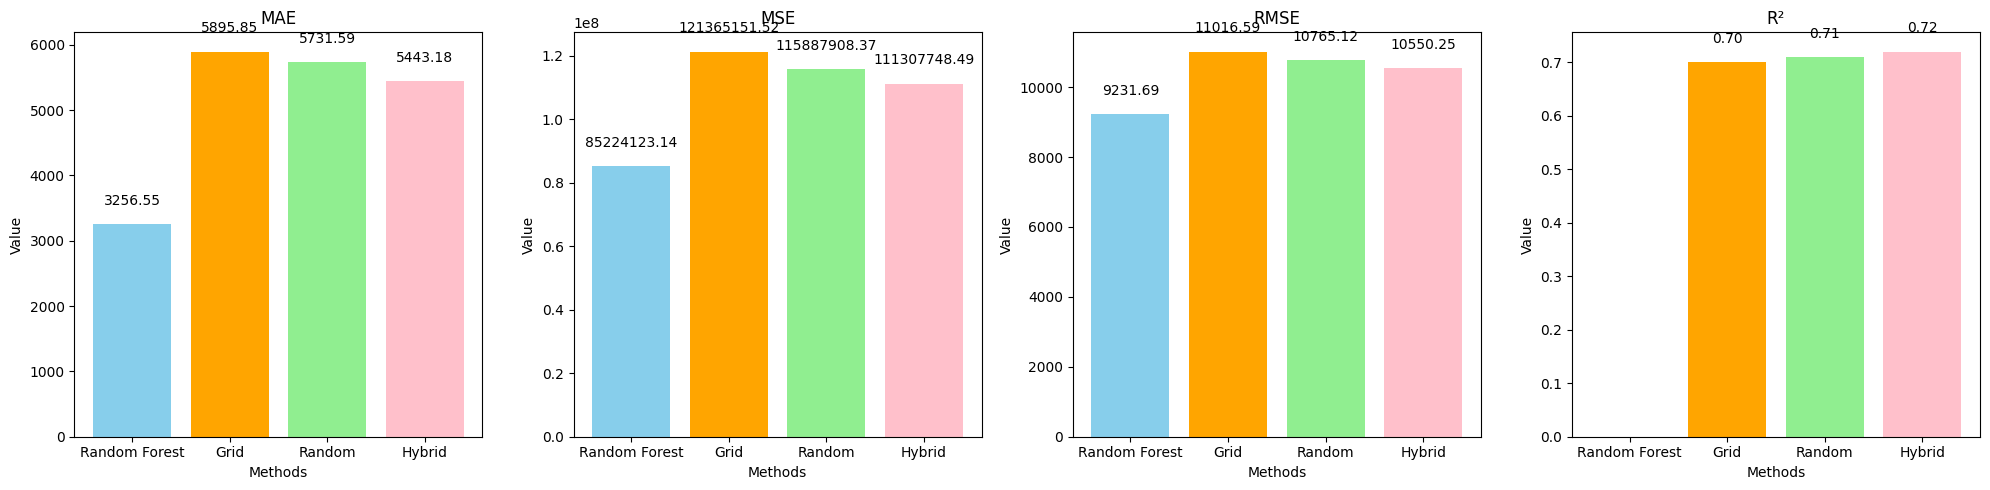

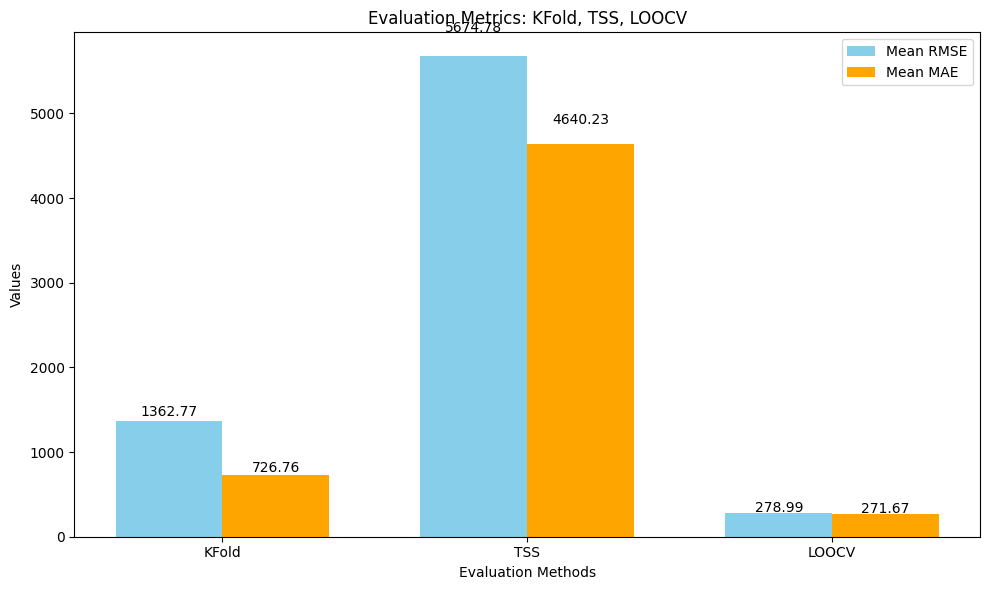

In [249]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Random Forest Model and Optimizations
metrics_rf = ['MAE', 'MSE', 'RMSE', 'R²']
random_forest = [3256.55, 85224123.14, 9231.69, None]
grid = [5895.85, 121365151.52, 11016.59, 0.70]
random = [5731.59, 115887908.37, 10765.12, 0.71]
hybrid = [5443.18, 111307748.49, 10550.25, 0.72]

methods_rf = ['Random Forest', 'Grid', 'Random', 'Hybrid']
data_rf = [random_forest, grid, random, hybrid]

# Create subplots for each metric
fig, axes = plt.subplots(1, len(metrics_rf), figsize=(20, 5), sharey=False)

# Plot each metric for Random Forest Model
for i, metric in enumerate(metrics_rf):
    if any(x is not None for x in [random_forest[i], grid[i], random[i], hybrid[i]]):  # Skip metrics with no data
        values = [random_forest[i], grid[i], random[i], hybrid[i]]
        values = [v if v is not None else 0 for v in values]  # Replace None with 0 for plotting
        axes[i].bar(methods_rf, values, color=['skyblue', 'orange', 'lightgreen', 'pink'])
        axes[i].set_title(metric)
        axes[i].set_xlabel('Methods')
        axes[i].set_ylabel('Value')
        for j, val in enumerate(values):
            axes[i].text(j, val + 0.05 * max(values), f'{val:.2f}' if val != 0 else '', ha='center')

plt.tight_layout()
plt.show()

# Additional Evaluations (KFold, TSS, LOOCV)
additional_metrics_rf = {
    'KFold': {'Mean RMSE': 1362.77, 'Mean MAE': 726.76},
    'TSS': {'Mean RMSE': 5674.78, 'Mean MAE': 4640.23},
    'LOOCV': {'Mean RMSE': 278.99, 'Mean MAE': 271.67},
}

# Plot additional evaluations
fig, ax = plt.subplots(figsize=(10, 6))
methods_additional_rf = list(additional_metrics_rf.keys())
rmse_values = [additional_metrics_rf[m]['Mean RMSE'] for m in methods_additional_rf]
mae_values = [additional_metrics_rf[m]['Mean MAE'] for m in methods_additional_rf]

bar_width = 0.35  # Width of the bars
x = np.arange(len(methods_additional_rf))

# Plot RMSE and MAE side-by-side
bars_rmse = ax.bar(x - bar_width / 2, rmse_values, bar_width, label='Mean RMSE', color='skyblue')
bars_mae = ax.bar(x + bar_width / 2, mae_values, bar_width, label='Mean MAE', color='orange')

# Add annotations and labels
ax.set_title('Evaluation Metrics: KFold, TSS, LOOCV')
ax.set_xticks(x)
ax.set_xticklabels(methods_additional_rf)
ax.set_xlabel('Evaluation Methods')
ax.set_ylabel('Values')
ax.legend()

# Annotate bars
for bars in [bars_rmse, bars_mae]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.05 * height, f'{height:.2f}', ha='center')

plt.tight_layout()
plt.show()




**SVR Model Evaluation**  
- MAE: 29505.54  
- MSE: 1323942399.21  
- RMSE: 36386.02  
- R²: -2.28  
- MAPE: 46.63%



**Optimizations**

**Grid**  
- MAE: 5497.15  
- MSE: 165242546.02  
- RMSE: 12854.67  
- R²: 0.6591  
- MAPE: 132.78%

**Random**  
- MAE: 5497.15  
- MSE: 165242546.02  
- RMSE: 12854.67  
- R²: 0.6591  
- MAPE: 132.78%

**Hybrid**  
- MAE: 5497.15  
- MSE: 165242546.02  
- RMSE: 12854.67  
- R²: 0.6591  
- MAPE: 132.78%



**KFold Evaluation**  
- Mean RMSE: 1905.30  
- Mean MAE: 901.23


**TSS Evaluation**  
- Mean RMSE: 5248.95  
- Mean MAE: 4348.00

---

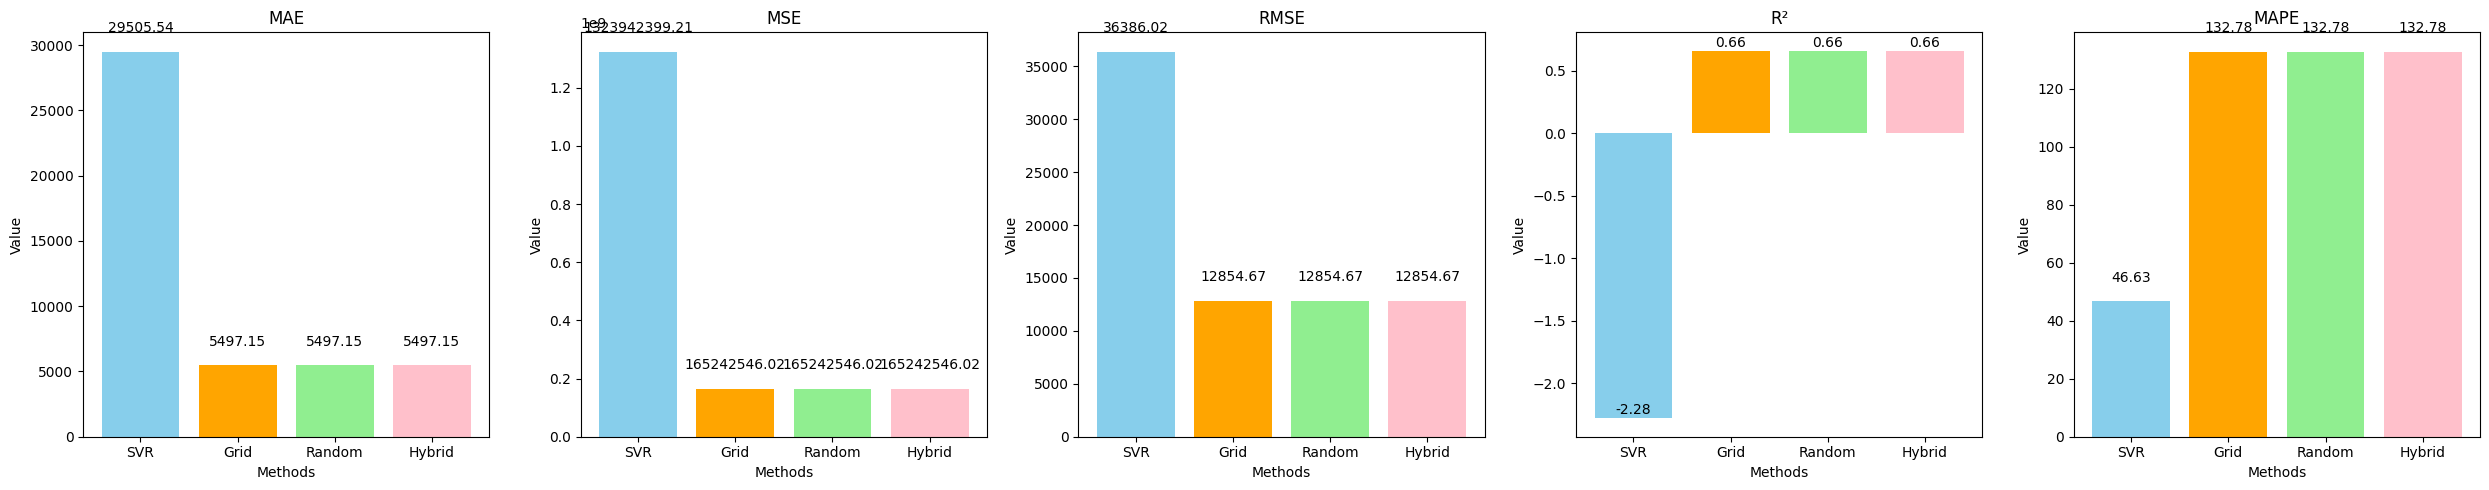

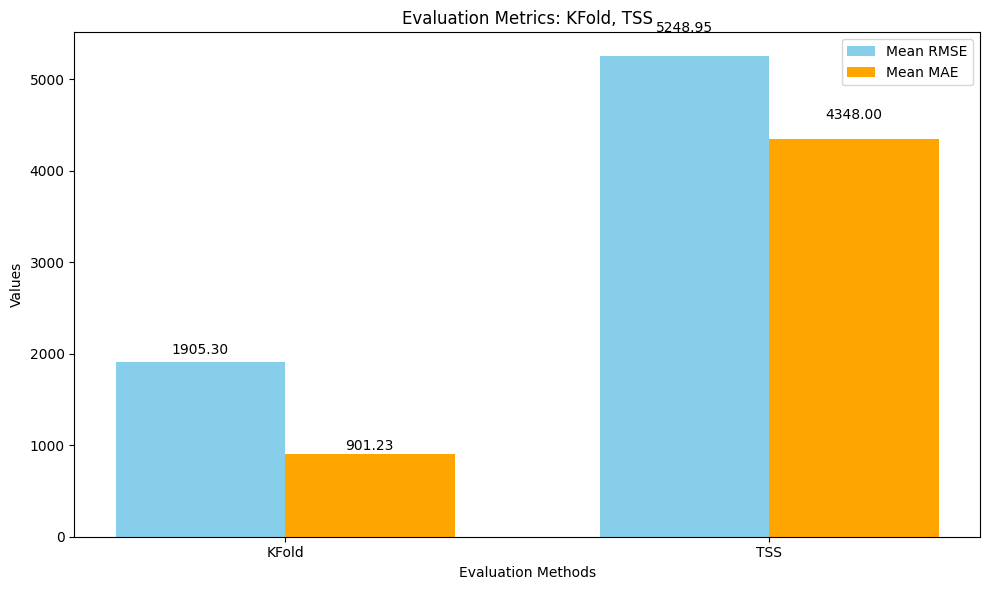

In [250]:
import matplotlib.pyplot as plt
import numpy as np

# Data for SVR Model and Optimizations
metrics_svr = ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE']
svr_model = [29505.54, 1323942399.21, 36386.02, -2.28, 46.63]
grid = [5497.15, 165242546.02, 12854.67, 0.6591, 132.78]
random = [5497.15, 165242546.02, 12854.67, 0.6591, 132.78]
hybrid = [5497.15, 165242546.02, 12854.67, 0.6591, 132.78]

methods_svr = ['SVR', 'Grid', 'Random', 'Hybrid']
data_svr = [svr_model, grid, random, hybrid]

# Create subplots for each metric
fig, axes = plt.subplots(1, len(metrics_svr), figsize=(25, 5), sharey=False)

# Plot each metric for SVR Model
for i, metric in enumerate(metrics_svr):
    if any(x is not None for x in [svr_model[i], grid[i], random[i], hybrid[i]]):  # Skip metrics with no data
        values = [svr_model[i], grid[i], random[i], hybrid[i]]
        values = [v if v is not None else 0 for v in values]  # Replace None with 0 for plotting
        axes[i].bar(methods_svr, values, color=['skyblue', 'orange', 'lightgreen', 'pink'])
        axes[i].set_title(metric)
        axes[i].set_xlabel('Methods')
        axes[i].set_ylabel('Value')
        for j, val in enumerate(values):
            axes[i].text(j, val + 0.05 * max(values), f'{val:.2f}' if val != 0 else '', ha='center')

plt.tight_layout()
plt.show()

# Additional Evaluations (KFold, TSS)
additional_metrics_svr = {
    'KFold': {'Mean RMSE': 1905.30, 'Mean MAE': 901.23},
    'TSS': {'Mean RMSE': 5248.95, 'Mean MAE': 4348.00},
}

# Plot additional evaluations
fig, ax = plt.subplots(figsize=(10, 6))
methods_additional_svr = list(additional_metrics_svr.keys())
rmse_values = [additional_metrics_svr[m]['Mean RMSE'] for m in methods_additional_svr]
mae_values = [additional_metrics_svr[m]['Mean MAE'] for m in methods_additional_svr]

bar_width = 0.35  # Width of the bars
x = np.arange(len(methods_additional_svr))

# Plot RMSE and MAE side-by-side
bars_rmse = ax.bar(x - bar_width / 2, rmse_values, bar_width, label='Mean RMSE', color='skyblue')
bars_mae = ax.bar(x + bar_width / 2, mae_values, bar_width, label='Mean MAE', color='orange')

# Add annotations and labels
ax.set_title('Evaluation Metrics: KFold, TSS')
ax.set_xticks(x)
ax.set_xticklabels(methods_additional_svr)
ax.set_xlabel('Evaluation Methods')
ax.set_ylabel('Values')
ax.legend()

# Annotate bars
for bars in [bars_rmse, bars_mae]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.05 * height, f'{height:.2f}', ha='center')

plt.tight_layout()
plt.show()


Here’s the concise version:

LSTM Model Metrics:
- **MAE**: 2644.44
- **MSE**: 14633894.42
- **RMSE**: 3825.43
- **R²**: 0.96
- **MAPE**: 4.41%

K-Fold Cross Validation:
- **Average RMSE**: 2100.46
- **Average MAE**: 1600.79

Time Series Split (TSS):
- **Average RMSE**: 2577.24
- **Average MAE**: 1624.19 ***κείμενο με έντονη γραφή***

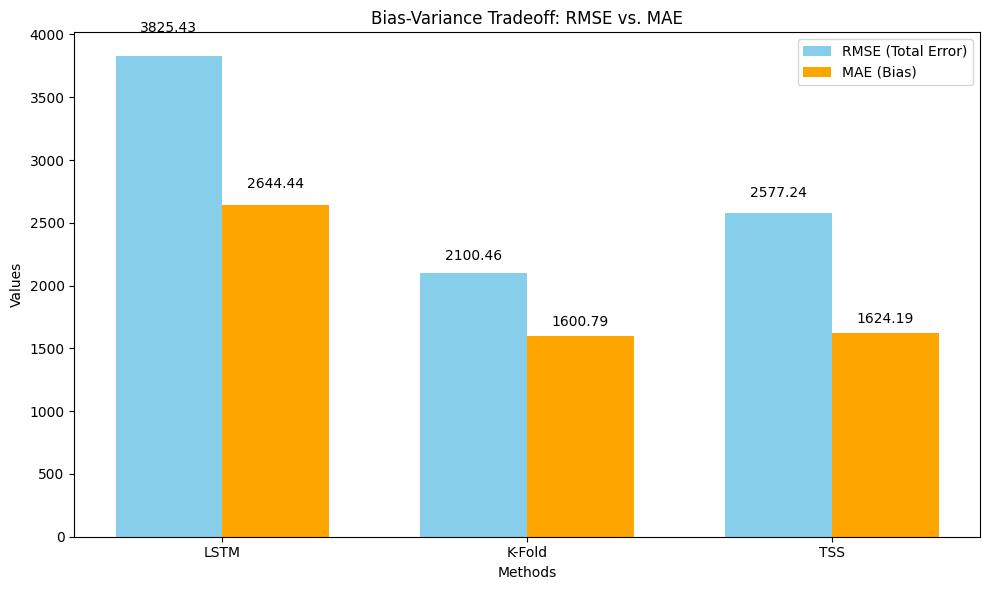

In [270]:
import matplotlib.pyplot as plt
import numpy as np

# Data for RMSE (Total Error)
methods = ['LSTM', 'K-Fold', 'TSS']
rmse_values = [3825.43, 2100.46, 2577.24]  # RMSE values for LSTM, K-Fold, TSS

# Data for MAE (Bias)
mae_values = [2644.44, 1600.79, 1624.19]  # MAE values for LSTM, K-Fold, TSS

# Visualizing Bias-Variance Tradeoff using RMSE and MAE
fig, ax = plt.subplots(figsize=(10, 6))

# Plot RMSE (Total Error) and MAE (Bias)
bar_width = 0.35  # Width of the bars
x = np.arange(len(methods))

# Plot RMSE and MAE side-by-side
bars_rmse = ax.bar(x - bar_width / 2, rmse_values, bar_width, label='RMSE (Total Error)', color='skyblue')
bars_mae = ax.bar(x + bar_width / 2, mae_values, bar_width, label='MAE (Bias)', color='orange')

# Add annotations and labels
ax.set_title('Bias-Variance Tradeoff: RMSE vs. MAE')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.set_xlabel('Methods')
ax.set_ylabel('Values')
ax.legend()

# Annotate bars
for bars in [bars_rmse, bars_mae]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.05 * height, f'{height:.2f}', ha='center')

plt.tight_layout()
plt.show()


***BIAS - VARIANCE TRADEOFF:***

LINEAR REGRESSION

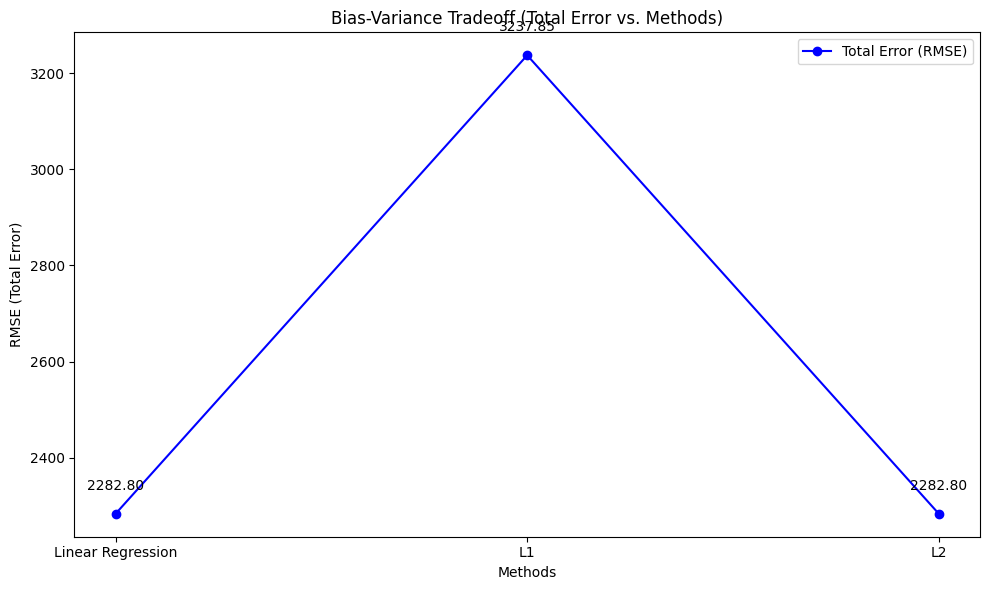

In [252]:
import matplotlib.pyplot as plt

# Data for Bias-Variance tradeoff visualization
methods = ['Linear Regression', 'L1', 'L2']
rmse_values = [2282.80, 3237.85, 2282.80]  # RMSE values for each method

# Visualizing Bias-Variance Tradeoff using RMSE
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(methods, rmse_values, marker='o', linestyle='-', color='b', label='Total Error (RMSE)')
ax.set_title('Bias-Variance Tradeoff (Total Error vs. Methods)')
ax.set_xlabel('Methods')
ax.set_ylabel('RMSE (Total Error)')
ax.legend()

# Adding annotations to each point
for i, val in enumerate(rmse_values):
    ax.text(i, val + 50, f'{val:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


LOGARITHMIC FIT

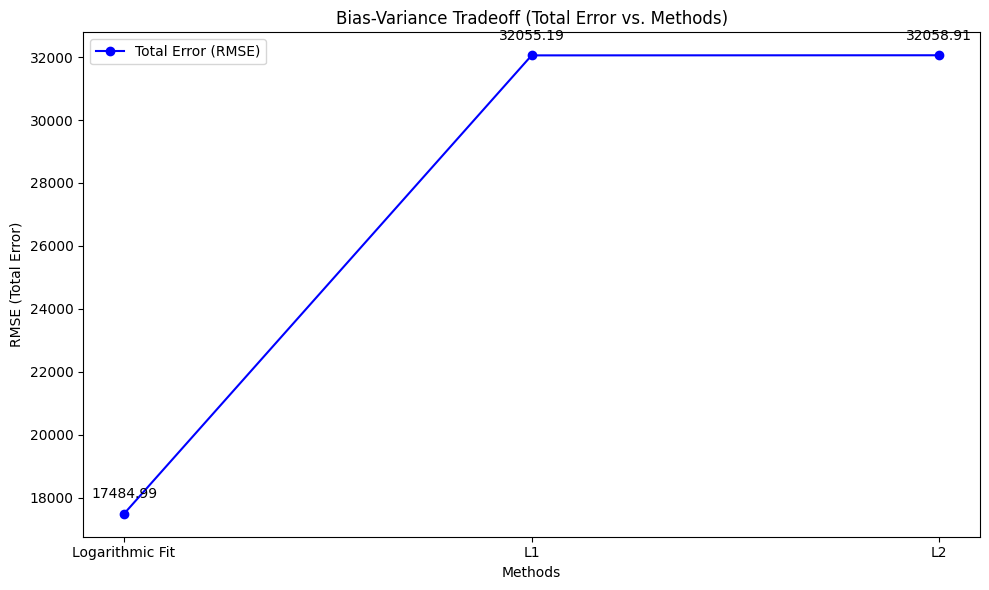

In [254]:
import matplotlib.pyplot as plt

# Data for Bias-Variance tradeoff visualization
methods = ['Logarithmic Fit', 'L1', 'L2']
rmse_values = [17484.99, 32055.19, 32058.91]  # RMSE values for each method

# Visualizing Bias-Variance Tradeoff using RMSE
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(methods, rmse_values, marker='o', linestyle='-', color='b', label='Total Error (RMSE)')
ax.set_title('Bias-Variance Tradeoff (Total Error vs. Methods)')
ax.set_xlabel('Methods')
ax.set_ylabel('RMSE (Total Error)')
ax.legend()

# Adding annotations to each point
for i, val in enumerate(rmse_values):
    ax.text(i, val + 500, f'{val:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

EXPONENTIAL FIT

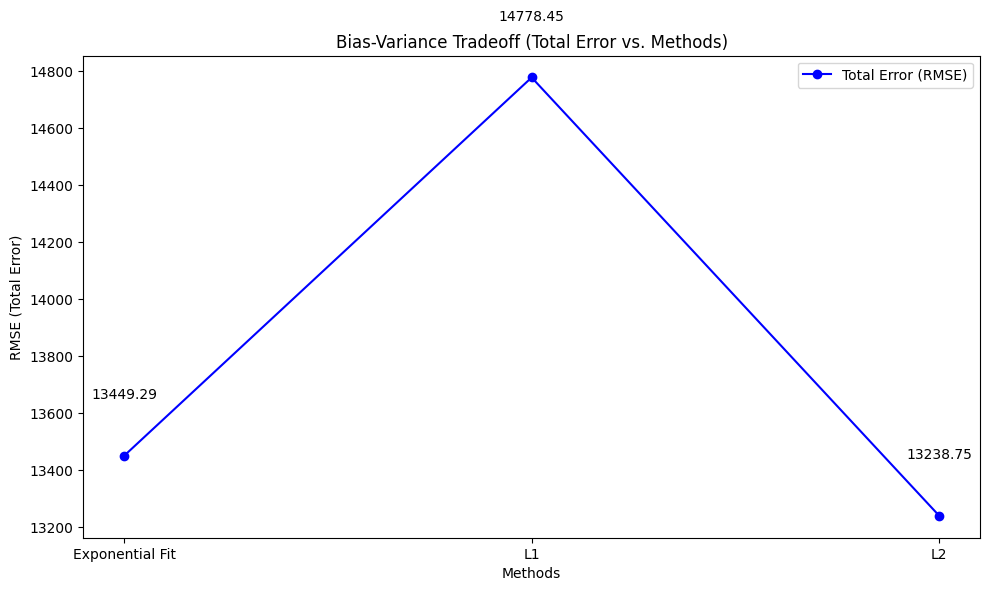

In [255]:
import matplotlib.pyplot as plt

# Data for Bias-Variance tradeoff visualization
methods = ['Exponential Fit', 'L1', 'L2']
rmse_values = [13449.29, 14778.45, 13238.75]  # RMSE values for each method

# Visualizing Bias-Variance Tradeoff using RMSE
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(methods, rmse_values, marker='o', linestyle='-', color='b', label='Total Error (RMSE)')
ax.set_title('Bias-Variance Tradeoff (Total Error vs. Methods)')
ax.set_xlabel('Methods')
ax.set_ylabel('RMSE (Total Error)')
ax.legend()

# Adding annotations to each point
for i, val in enumerate(rmse_values):
    ax.text(i, val + 200, f'{val:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()



KNN

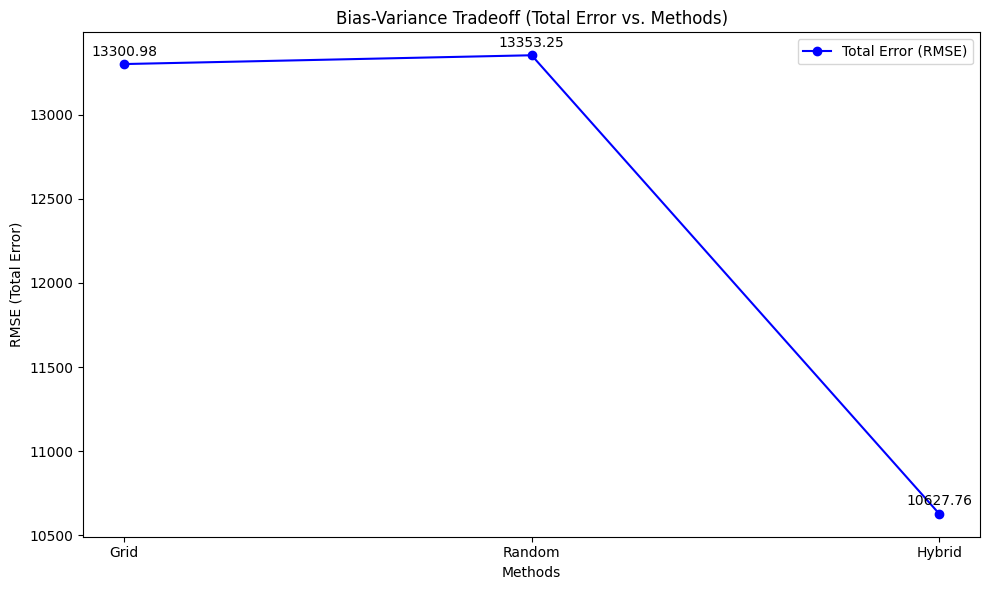

In [256]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Bias-Variance tradeoff visualization (RMSE values)
methods_knn = ['kNN', 'Grid', 'Random', 'Hybrid']
rmse_values_knn = [None, 13300.98, 13353.25, 10627.76]  # RMSE values for kNN methods

# Visualizing Bias-Variance Tradeoff using RMSE
fig, ax = plt.subplots(figsize=(10, 6))

# Only plot values that are not None
valid_methods = [method for i, method in enumerate(methods_knn) if rmse_values_knn[i] is not None]
valid_rmse_values = [rmse for rmse in rmse_values_knn if rmse is not None]

ax.plot(valid_methods, valid_rmse_values, marker='o', linestyle='-', color='b', label='Total Error (RMSE)')
ax.set_title('Bias-Variance Tradeoff (Total Error vs. Methods)')
ax.set_xlabel('Methods')
ax.set_ylabel('RMSE (Total Error)')
ax.legend()

# Adding annotations to each point
for i, val in enumerate(valid_rmse_values):
    ax.text(i, val + 50, f'{val:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


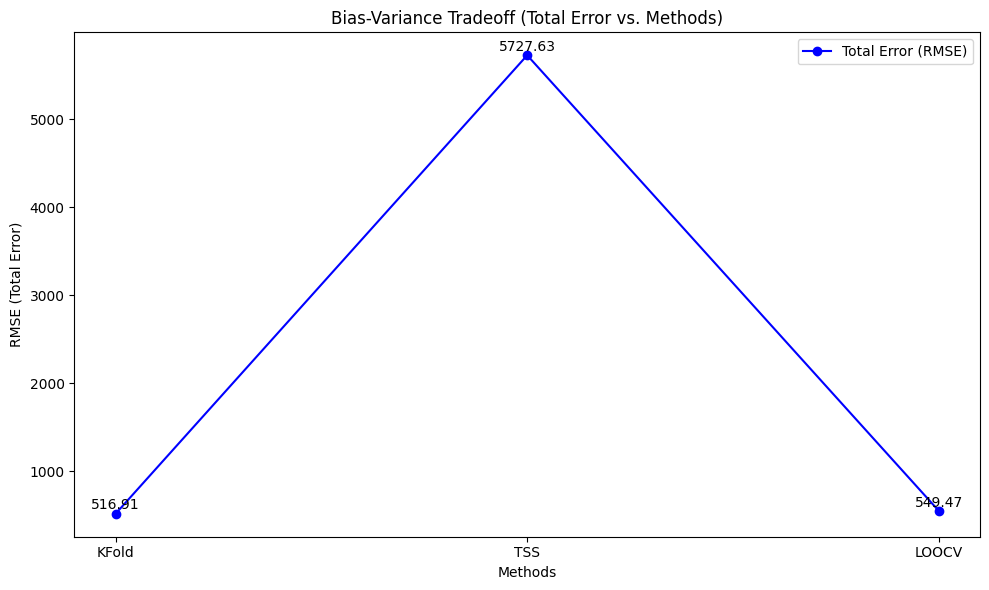

In [258]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Bias-Variance tradeoff visualization (RMSE values for KFold, TSS, LOOCV)
methods_additional = ['KFold', 'TSS', 'LOOCV']
rmse_values_additional = [516.91, 5727.63, 549.47]  # RMSE values for KFold, TSS, LOOCV

# Visualizing Bias-Variance Tradeoff using RMSE
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(methods_additional, rmse_values_additional, marker='o', linestyle='-', color='b', label='Total Error (RMSE)')
ax.set_title('Bias-Variance Tradeoff (Total Error vs. Methods)')
ax.set_xlabel('Methods')
ax.set_ylabel('RMSE (Total Error)')
ax.legend()

# Adding annotations to each point
for i, val in enumerate(rmse_values_additional):
    ax.text(i, val + 50, f'{val:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


RANDOM FOREST

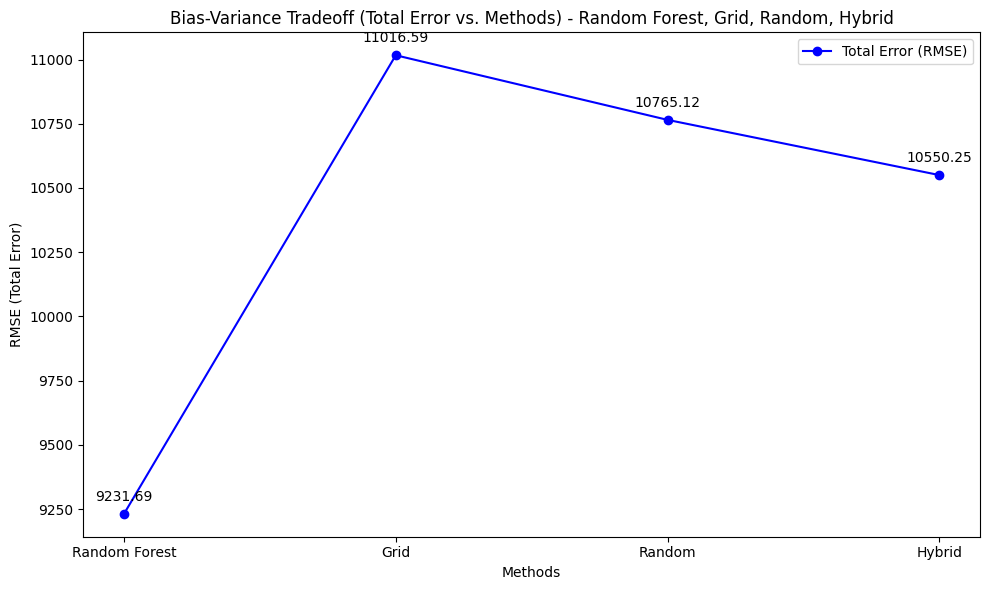

In [264]:
import matplotlib.pyplot as plt
import numpy as np

# Data for RMSE values (Random Forest, Grid, Random, Hybrid)
methods_rf = ['Random Forest', 'Grid', 'Random', 'Hybrid']
rmse_values_rf = [9231.69, 11016.59, 10765.12, 10550.25]  # RMSE values for each method

# Visualizing Bias-Variance Tradeoff using RMSE
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(methods_rf, rmse_values_rf, marker='o', linestyle='-', color='b', label='Total Error (RMSE)')
ax.set_title('Bias-Variance Tradeoff (Total Error vs. Methods) - Random Forest, Grid, Random, Hybrid')
ax.set_xlabel('Methods')
ax.set_ylabel('RMSE (Total Error)')
ax.legend()

# Adding annotations to each point
for i, val in enumerate(rmse_values_rf):
    ax.text(i, val + 50, f'{val:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


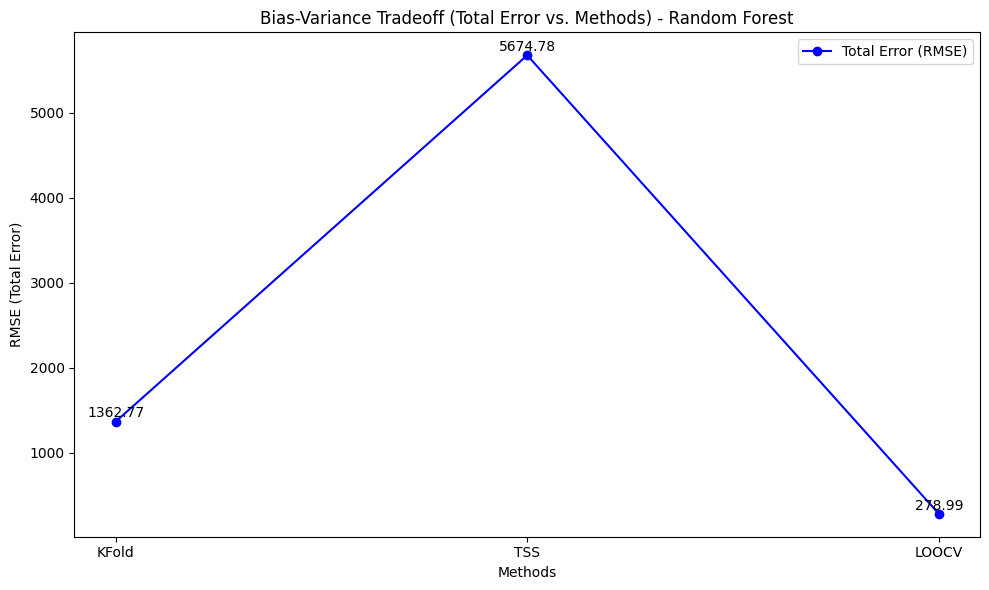

In [263]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Bias-Variance tradeoff visualization (RMSE values for KFold, TSS, LOOCV)
methods_additional_rf = ['KFold', 'TSS', 'LOOCV']
rmse_values_additional_rf = [1362.77, 5674.78, 278.99]  # RMSE values for KFold, TSS, LOOCV for Random Forest

# Visualizing Bias-Variance Tradeoff using RMSE
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(methods_additional_rf, rmse_values_additional_rf, marker='o', linestyle='-', color='b', label='Total Error (RMSE)')
ax.set_title('Bias-Variance Tradeoff (Total Error vs. Methods) - Random Forest')
ax.set_xlabel('Methods')
ax.set_ylabel('RMSE (Total Error)')
ax.legend()

# Adding annotations to each point
for i, val in enumerate(rmse_values_additional_rf):
    ax.text(i, val + 50, f'{val:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


SVR

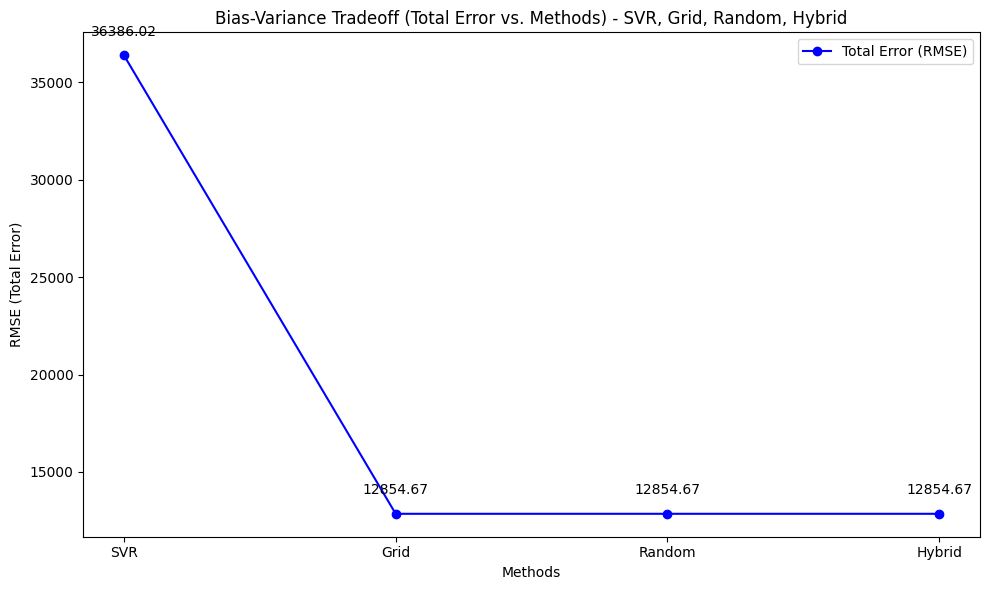

In [265]:
import matplotlib.pyplot as plt
import numpy as np

# Data for RMSE values (SVR, Grid, Random, Hybrid)
methods_svr = ['SVR', 'Grid', 'Random', 'Hybrid']
rmse_values_svr = [36386.02, 12854.67, 12854.67, 12854.67]  # RMSE values for each method

# Visualizing Bias-Variance Tradeoff using RMSE
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(methods_svr, rmse_values_svr, marker='o', linestyle='-', color='b', label='Total Error (RMSE)')
ax.set_title('Bias-Variance Tradeoff (Total Error vs. Methods) - SVR, Grid, Random, Hybrid')
ax.set_xlabel('Methods')
ax.set_ylabel('RMSE (Total Error)')
ax.legend()

# Adding annotations to each point
for i, val in enumerate(rmse_values_svr):
    ax.text(i, val + 1000, f'{val:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


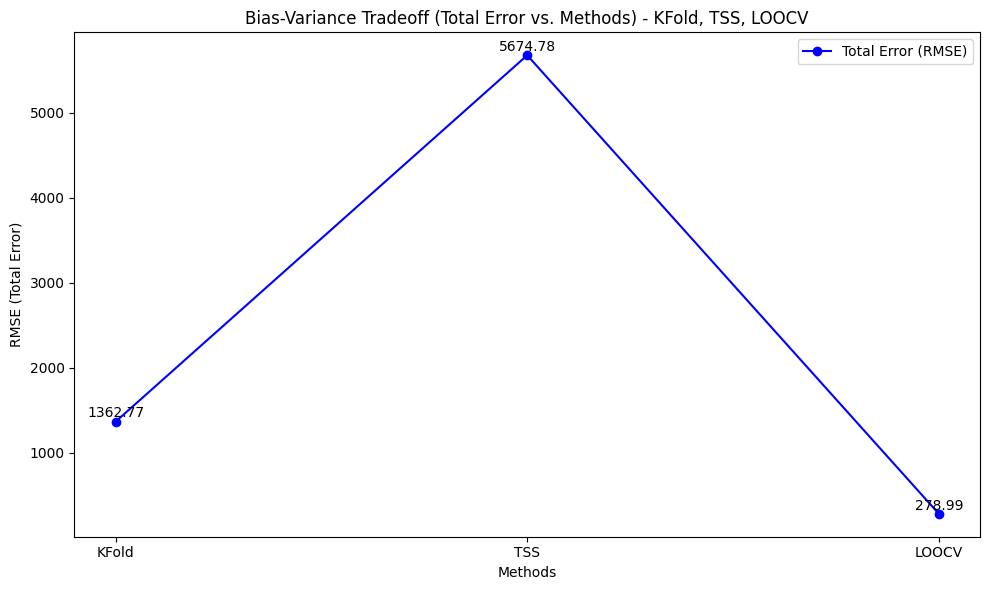

In [266]:
import matplotlib.pyplot as plt
import numpy as np

# Data for RMSE values (KFold, TSS, LOOCV)
methods_additional = ['KFold', 'TSS', 'LOOCV']
rmse_values_additional = [1362.77, 5674.78, 278.99]  # RMSE values for KFold, TSS, LOOCV

# Visualizing Bias-Variance Tradeoff using RMSE
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(methods_additional, rmse_values_additional, marker='o', linestyle='-', color='b', label='Total Error (RMSE)')
ax.set_title('Bias-Variance Tradeoff (Total Error vs. Methods) - KFold, TSS, LOOCV')
ax.set_xlabel('Methods')
ax.set_ylabel('RMSE (Total Error)')
ax.legend()

# Adding annotations to each point
for i, val in enumerate(rmse_values_additional):
    ax.text(i, val + 50, f'{val:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


LSTM

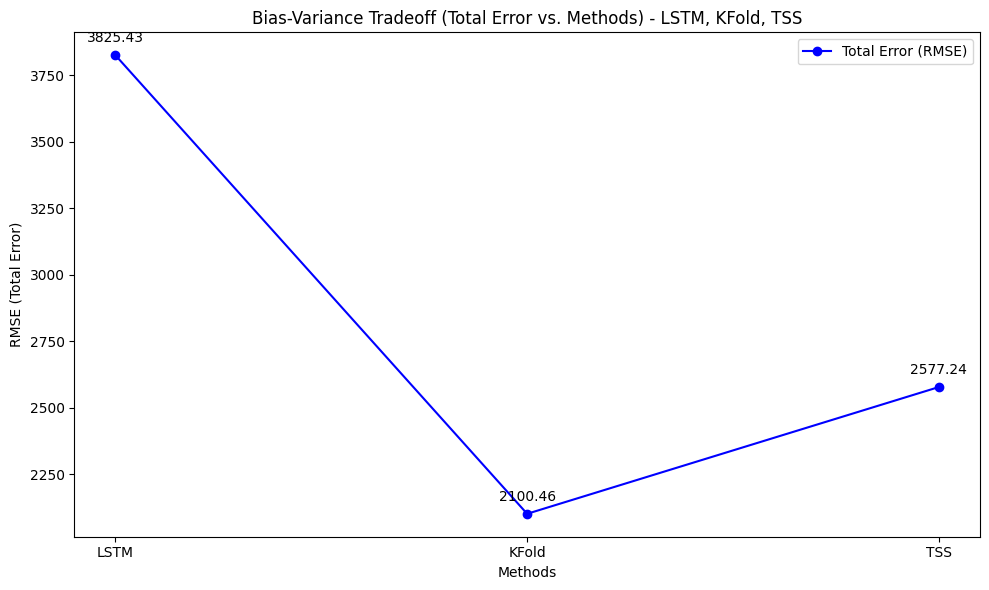

In [271]:
import matplotlib.pyplot as plt
import numpy as np

# Data for RMSE values (LSTM, KFold, TSS)
methods = ['LSTM', 'KFold', 'TSS']
rmse_values = [3825.43, 2100.46, 2577.24]  # RMSE values for LSTM, KFold, TSS

# Visualizing Bias-Variance Tradeoff using RMSE
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(methods, rmse_values, marker='o', linestyle='-', color='b', label='Total Error (RMSE)')
ax.set_title('Bias-Variance Tradeoff (Total Error vs. Methods) - LSTM, KFold, TSS')
ax.set_xlabel('Methods')
ax.set_ylabel('RMSE (Total Error)')
ax.legend()

# Adding annotations to each point
for i, val in enumerate(rmse_values):
    ax.text(i, val + 50, f'{val:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# ***10. Testing (Best Models) - Making the Predictions***

Based on the best Models thus far combined with the Final Analysis done the new models predictions will be done!!

***L2 Linear Regression***

In [ ]:
from typing_extensions import final
# Get the last predicted Bitcoin price
last_btc_price = 93500
last_predicted_price = y_pred[-1]

print(f"Last Bitcoin Price: ${last_btc_price:.2f}")
print(f"Last Predicted Bitcoin Price: ${last_predicted_price:.2f}")

final_price = last_predicted_price*1.26
print(f"SO Final Predicting Price: {final_price}")

Last Bitcoin Price: $93500.00
Last Predicted Bitcoin Price: $84395.43
SO Final Predicting Price: 106338.24571338037


***Logarithmic Fit***

In [ ]:
from typing_extensions import final
# Get the last predicted Bitcoin price
last_btc_price = 93500
last_predicted_price = y_pred_full[-1]

print(f"Last Bitcoin Price: ${last_btc_price:.2f}")
print(f"Last Predicted Bitcoin Price: ${last_predicted_price:.2f}")

final_price = last_predicted_price*1.26
print(f"SO Final Predicting Price: {final_price}")

Last Bitcoin Price: $93500.00
Last Predicted Bitcoin Price: $30182.22
SO Final Predicting Price: 38029.59176741888


***L2 - Exponential Fit***

In [ ]:
from typing_extensions import final
# Get the last predicted Bitcoin price
last_btc_price = 93500
last_predicted_price = y_pred[-1]

print(f"Last Bitcoin Price: ${last_btc_price:.2f}")
print(f"Last Predicted Bitcoin Price: ${last_predicted_price:.2f}")

final_price = last_predicted_price*1.26
print(f"SO Final Predicting Price: {final_price}")

Last Bitcoin Price: $93500.00
Last Predicted Bitcoin Price: $80140.60
SO Final Predicting Price: 100977.15520046686


***kNN From Hybrid Search Results***

In [ ]:
from typing_extensions import final
# Get the last predicted Bitcoin price
last_btc_price = 93500
last_predicted_price = 58900

print(f"Last Bitcoin Price: ${last_btc_price:.2f}")
print(f"Last Predicted Bitcoin Price: ${last_predicted_price:.2f}")

final_price = last_predicted_price*1.26
print(f"SO Final Predicting Price: {final_price}")

Last Bitcoin Price: $93500.00
Last Predicted Bitcoin Price: $58900.00
SO Final Predicting Price: 74214.0


***SMA***

In [ ]:
from typing_extensions import final
# Get the last predicted Bitcoin price
last_btc_price = 93500
last_predicted_price = y_pred_sma[-1]

print(f"Last Bitcoin Price: ${last_btc_price:.2f}")
print(f"Last Predicted Bitcoin Price: ${last_predicted_price:.2f}")

final_price = last_predicted_price*1.26
print(f"SO Final Predicting Price: {final_price}")

Last Bitcoin Price: $93500.00
Last Predicted Bitcoin Price: $96377.74
SO Final Predicting Price: 121435.95338437501


<ipython-input-13-f08678a5a8c4>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_predicted_price = y_pred_sma[-1]


***Random Forest***

In [ ]:
from typing_extensions import final
# Get the last predicted Bitcoin price
last_btc_price = 93500
last_predicted_price = y_pred_rf[-1]

print(f"Last Bitcoin Price: ${last_btc_price:.2f}")
print(f"Last Predicted Bitcoin Price: ${last_predicted_price:.2f}")

final_price = last_predicted_price*1.26
print(f"SO Final Predicting Price: {final_price}")

Last Bitcoin Price: $93500.00
Last Predicted Bitcoin Price: $66632.69
SO Final Predicting Price: 83957.1837890625


***SVR - Grid or Hybrid***

In [ ]:
from typing_extensions import final
# Get the last predicted Bitcoin price
last_btc_price = 93500
last_predicted_price = y_pred[-1]

print(f"Last Bitcoin Price: ${last_btc_price:.2f}")
print(f"Last Predicted Bitcoin Price: ${last_predicted_price:.2f}")

final_price = last_predicted_price*1.26
print(f"SO Final Predicting Price: {final_price}")

Last Bitcoin Price: $93500.00
Last Predicted Bitcoin Price: $26917.41
SO Final Predicting Price: 33915.93118676841


LSTM

In [ ]:
from typing_extensions import final
# Get the last predicted Bitcoin price
last_btc_price = 93500
last_predicted_price = 100000

print(f"Last Bitcoin Price: ${last_btc_price:.2f}")
print(f"Last Predicted Bitcoin Price: ${last_predicted_price:.2f}")

final_price = last_predicted_price*1.26
print(f"SO Final Predicting Price: {final_price}")

Last Bitcoin Price: $93500.00
Last Predicted Bitcoin Price: $100000.00
SO Final Predicting Price: 126000.0


# ***11. Models's Final Predictions***

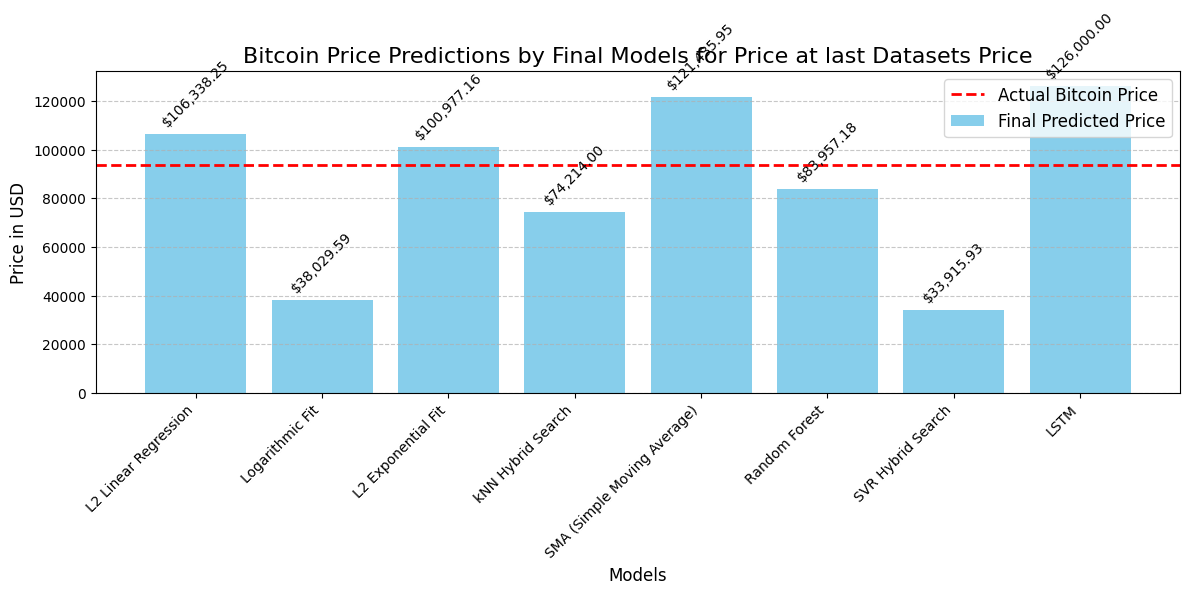

In [19]:
import matplotlib.pyplot as plt

# Actual last Bitcoin price
actual_price = 93500

# Final Predicted Prices by each model
models = [
    "L2 Linear Regression",
    "Logarithmic Fit",
    "L2 Exponential Fit",
    "kNN Hybrid Search",
    "SMA (Simple Moving Average)",
    "Random Forest",
    "SVR Hybrid Search",
    "LSTM"
]

final_predicted_prices = [
    106338.25,  # L2 Linear Regression
    38029.59,   # Logarithmic Fit
    100977.16,  # L2 Exponential Fit
    74214.00,   # kNN Hybrid Search
    121435.95,   # SMA (Simple Moving Average)
    83957.18,   # Random Forest
    33915.93,   # SVR Hybrid Search
    126000.00   # LSTM
]

# Plotting
plt.figure(figsize=(12, 6))

# Plot final predictions
plt.bar(models, final_predicted_prices, color='skyblue', label='Final Predicted Price')

# Plot actual price as a horizontal line
plt.axhline(y=actual_price, color='red', linestyle='--', linewidth=2, label='Actual Bitcoin Price')

# Annotate bars with the predicted price
for i, price in enumerate(final_predicted_prices):
    plt.text(i, price + 2000, f"${price:,.2f}", ha='center', va='bottom', fontsize=10, rotation=45)

# Plot Settings
plt.title('Bitcoin Price Predictions by Final Models for Price at last Datasets Price', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
